In [1]:
import math
import numpy as np

In [2]:
def getfocus(a,ecc):
    c=a*ecc
    return c

In [3]:
def getsemiminor(a,ecc):
    c=getfocus(a,ecc)
    b=np.sqrt(a**2-c**2)
    return b

In [4]:
import math
def InitialDataEqualMassConic(radius,ecc,angle,initmass):
    orbitalangle=angle
    print("angle",angle)
    phi=np.array([math.pi+orbitalangle,orbitalangle])
    orbitalradius=radius #semimajor axis
    eccentricity=ecc
    print(eccentricity)
    mass=np.ones(2)
    masses=initmass*mass #*masssun (natural units)
    return phi,orbitalangle,orbitalradius,eccentricity, masses
    

In [5]:
import random,numpy as np
rad0=50.
ecc0=0.5
theta0=math.pi/6. #math.pi/6.
mass0=1.0
initdateqellipse=InitialDataEqualMassConic(rad0,ecc0,theta0,mass0)
print(initdateqellipse)

angle 0.5235987755982988
0.5
(array([3.66519143, 0.52359878]), 0.5235987755982988, 50.0, 0.5, array([1., 1.]))


In [6]:
def getxyuveqtwoellipses(initdat):
    phi,orbitangle,orbitalradius,eccentricity, masses=initdat
    print("initdat", orbitalradius, phi, eccentricity, np.cos(phi), np.sin(phi))
    metersperAU=1
    Gconstant=1
    #fix x0 y0 at one star, disregard initial data, use orbital radius as separation between stars
    #this is consistant with choice in previous part
    cosphi=np.cos(phi)
    sinphi=np.sin(phi)
    coordsep=orbitalradius #/2.
    print("coordsep",coordsep)
    #x0=orbitalradius/2.*np.cos(phi)*metersperAU
    #y0=orbitalradius/2.*np.sin(phi)*metersperAU
    count=0
    for phi0 in phi:
        if phi0==0:
            print("zero")
            #x0[count]=orbitalradius[count]/2.
            #y0[count]=0
            cosphi[count]=1.0
            sinphi[count]=0.0
        if phi0==math.pi:
            cosphi[count]=-1.0
            sinphi[count]=0.0
            print("pi")
            #x0[count]=-orbitalradius[count]/2.
            #y0[count]=0
        if phi0==math.pi/2.:
            cosphi[count]=0.0
            sinphi[count]=1.0
            #x0[count]=0
            #y0[count]=orbitalradius[count]/2.
        if phi0==3*math.pi/2.:
            cosphi[count]=0.0
            sinphi[count]=-1.0
            #x0[count]=0
            #y0[count]=-orbitalradius[count]/2.
        count+=1
    x0=coordsep*cosphi
    y0=coordsep*sinphi
    #x0[1]=0.0
    #y0[1]=0.0
    z0=np.zeros(2)
    print(x0)
    print(y0)
    v=np.zeros(2)
    a=np.zeros(2)
    ux0=0.
    uy0=0.
    uz0=0.
    ax0=0.
    ay0=0.
    az0=0.
    vx0=0.
    vy0=0.
    vz0=0.
    print(eccentricity)
    #masses=np.zeros(2)
    #masses[0]=masses[1]+masses[0]
    #masses[1]=(masses[1]*masses[0])/(masses[1]+masses[0])
    if eccentricity<1 and eccentricity>0:
        #elliptical
        orbitalr=orbitalradius #NO REDUCED MASS 
        #focusdisp=getfocus(orbitalr,eccentricity) #displacement of the center due to the focus being at the center
        coordsep=orbitalr*(1+eccentricity) #start at aphelion
        x0=(coordsep)*cosphi
        y0=(coordsep)*sinphi
        starsep=np.sqrt((x0[0]-x0[1])**2+(y0[0]-y0[1])**2) #two stars, at opposite ends of the orbit
        Fapastron=masses[1]*masses[0]/starsep**2
        #print('xycomp',coordsep,focusdisp,x0,y0)
        #x0[0]=0.0
        #y0[0]=0.0
        v=np.zeros(2)
        #v= np.sqrt(masses[1]*masses[0]/masses*(2./starsep-1./(2*orbitalr)))
        vapsq=masses[1]*masses[0]/masses/orbitalr*(1-eccentricity)/(1+eccentricity)/4.
        #vapsq=masses[1]*masses[0]/masses*(1./(coordsep)-1./orbitalr)/2.
        v=np.sqrt(vapsq)
        #v= np.sqrt(masses[1]*masses[0]/masses*(1./orbitalr-2./starsep))
        ux0=-v*sinphi
        uy0=v*cosphi #initial data in y only 
        uz0=np.zeros(2)
    
        print("vstuff", coordsep,orbitalr, 2./coordsep, 1./orbitalr, (2./starsep-1./(2.*orbitalr)), 1./(coordsep))
        
        a=np.zeros(2)
        a=Fapastron/masses
    
        ax0=-a*cosphi
        ay0=-a*sinphi
        az0=np.zeros(2)
    elif eccentricity[0]==0.0: #circular
        #start at perihelion for both (eliptical, doesn't generalize to three body)
        #actually start with circular orbit
        ux0=np.zeros(2) #*149597870700
        #centrepital force balances gravitational force
        metersperAU=1 #natural units
        #G=1
        Gconstant=1
        #Fcentripital=mass1*v**2/rphys
        #centF=accel
        #Faccel=G*m1*m2/r^2
        r0=2.*orbitalradius #Mystery factor of 2
        print("r0", r0)
        v=np.zeros(2)
        for i in np.arange(2):
            v[i]=np.sqrt(Gconstant*masses[(i+1)%2]/np.abs(r0[i]))
        print(v)
        #r0=orbitalradius #np.sqrt(x0**2+y0**2)
        ux0=-v[0]*sinphi
        uy0=v[1]*cosphi #initial data in y only 
        uz0=np.zeros(2)
    
        a=np.zeros(2)
        a=Fapastron/masses
    
        ax0=-a[0]*cosphi
        ay0=-a[1]*sinphi
        az0=np.zeros(2)

    statevec=[]
    avec=[]
    for i in np.arange(len(x0)):
        stateveci=np.array([x0[i],y0[i],z0[i],ux0[i],uy0[i],uz0[i]])
        aveci=np.array([ax0[i],ay0[i],az0[i]])
        statevec.append(stateveci)
        avec.append(aveci)
    statevecnp=np.array(statevec)
    avecnp=np.array(avec)
    return masses, statevecnp,avecnp

In [7]:
xyuvaeqellipse=getxyuveqtwoellipses(initdateqellipse)
print(xyuvaeqellipse)
masses,xvec,avec=xyuvaeqellipse

initdat 50.0 [3.66519143 0.52359878] 0.5 [-0.8660254  0.8660254] [-0.5  0.5]
coordsep 50.0
[-43.30127019  43.30127019]
[-25.  25.]
0.5
vstuff 75.0 50.0 0.02666666666666667 0.02 0.003333333333333334 0.013333333333333334
(array([1., 1.]), array([[-6.49519053e+01, -3.75000000e+01,  0.00000000e+00,
         2.04124145e-02, -3.53553391e-02,  0.00000000e+00],
       [ 6.49519053e+01,  3.75000000e+01,  0.00000000e+00,
        -2.04124145e-02,  3.53553391e-02,  0.00000000e+00]]), array([[ 3.84900179e-05,  2.22222222e-05,  0.00000000e+00],
       [-3.84900179e-05, -2.22222222e-05,  0.00000000e+00]]))


In [8]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [9]:
class OrbitDiffEqOld:
    def __init__(self,masses,xvec,avec,t0):
        self.masses=masses
        self.xvec=xvec
        self.ti=t0
        self.avec=avec
    def dxidt(self,t,xvec):
        return xvec[:,3].transpose()
    def dyidt(self,t,xvec):
        return xvec[:,4].transpose()
    def dzidt(self,t,xvec):
        return xvec[:,5].transpose()
    def dvxidt(self,t,xvec):
        #return axi[m]
        axii=np.zeros(len(xvec[:,0]))
        rii=np.sqrt(xvec[:,0]**2+xvec[:,1]**2+xvec[:,2]**2)
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(rii)):
            for j in np.arange(len(rii)):
                if j!=k:
                    #print(j,k,xvec[j,0],xvec[k,0],xvec[j,0]-xvec[k,0])
                    rreljk=np.abs((xvec[j,0] - xvec[k,0])**2+(xvec[j,1]-xvec[k,1])**2+(xvec[j,2]-xvec[k,2])**2)**(1./2.)
                    axii[j]-=Gconstant*self.masses[k]*(xvec[j,0]  - xvec[k,0])/rreljk**3
        return axii
    def dvyidt(self,t,xvec):
        #return axi[m]
        ayii=np.zeros(len(xvec[:,0]))
        rii=np.sqrt(xvec[:,0]**2+xvec[:,1]**2+xvec[:,2]**2)
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(rii)):
            for j in np.arange(len(rii)):
                if j!=k:
                    rreljk=np.abs((xvec[j,0] - xvec[k,0])**2+(xvec[j,1]-xvec[k,1])**2+(xvec[j,2]-xvec[k,2])**2)**(1./2.)
                    ayii[j]-=Gconstant*self.masses[k]*(xvec[j,1]  - xvec[k,1])/rreljk**3
        return ayii
    def dvzidt(self,t,xvec):
        #return axi[m]
        azii=np.zeros(len(xvec[:,0]))
        rii=np.sqrt(xvec[:,0]**2+xvec[:,1]**2+xvec[:,2]**2)
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(rii)):
            for j in np.arange(len(rii)):
                if j!=k:
                    rreljk=np.abs((xvec[j,0] - xvec[k,0])**2+(xvec[j,1]-xvec[k,1])**2+(xvec[j,2]-xvec[k,2])**2)**(1./2.)
                    azii[j]-=Gconstant*self.masses[k]*(xvec[j,2]  - xvec[k,2])/rreljk**3
        return azii
    
    def dvecdt(self,t,xvec):
        avec=np.array([self.dvxidt(self,xvec),self.dvyidt(self,xvec),self.dvzidt(self,xvec)])
        print("avec", avec)
        avecT=avec.transpose()
        self.avec=avecT
        dvec2=np.array([self.dxidt(t,xvec),self.dyidt(t,xvec),self.dzidt(self,xvec),avec[0,:],avec[1,:],avec[2,:]])
                       
        dvec2T=dvec2.transpose()
        return dvec2T
    def updateINTERNAL(self,xvecii,tii):
        self.xvec=xvecii
        self.ti=tii
        return self
    def update(self,xvecii,avecii,tii):
        self.xvec=xvecii
        self.avec=avecii,
        self.ti=tii
    def print2D(self):
        print(self.masses,self.xvec,self.ti)
        return self
    def list2D(self):
        return self.masses,self.xvec,self.avec,self.ti
    def timestepRK4ODE(self,step,dt):

    
        h=dt
        #tnew,ynew, intval=RK4(h,t,y,f)
        #m represents choices of mass
        i=step
        
        tnew,intvalxvec=RK4implicit(h,self.ti,self.xvec,self.dvecdt)
        #xii = intvalx
        #tnew,intvalvx=RK4implicit(h,self.ti,self.vxi,self.dvxidt)
        #vxii=intvalvx
        #tnew,intvaly=RK4implicit(h,self.ti,self.yi,self.dyidt)
        #yii = intvaly
        #tnew,intvalvy=RK4implicit(h,self.ti,self.vyi,self.dvyidt)
        #vyii=intvalvy
        #tnew,intvalz=RK4implicit(h,self.ti,self.zi,self.dzidt)
        #zii = intvalz
        #tnew,intvalvz=RK4implicit(h,self.ti,self.vzi,self.dvzidt)
        #vzii=intvalvz
        #axii=self.dvxidt(self.ti,np.zeros(np.shape(self.xi)))
        #ayii=self.dvyidt(self.ti,np.zeros(np.shape(self.yi)))
        #azii=self.dvzidt(self.ti,np.zeros(np.shape(self.zi)))
 
        #print(xii)
        self.updateINTERNAL(intvalxvec,tnew)
        return self.masses, self.xvec,self.avec,self.ti

In [10]:
class OrbitDiffEq:
    def __init__(self,masses,xvec,avec,t0):
        self.masses=masses
        self.xvec=xvec
        self.ti=t0
        self.avec=avec
    def dxidt(self,t,xvec):
        return xvec[:,3].transpose()
    def dyidt(self,t,xvec):
        return xvec[:,4].transpose()
    def dzidt(self,t,xvec):
        return xvec[:,5].transpose()
    def dvxidt(self,t,xvec):
        #return axi[m]
        axii=np.zeros(len(xvec[:,0]))
        #rii=np.sqrt(np.sum(xvec[:,0:3])**2)
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(xvec[:,0])):
            for j in np.arange(len(xvec[:,0])):
                if j!=k:
                    vecshift=xvec[j,:]-xvec[k,:]
                    #print(j,k,xvec[j,0],xvec[k,0],xvec[j,0]-xvec[k,0])
                    rreljk=np.sqrt(np.sum(vecshift[0:3]**2))
                    axii[j]-=Gconstant*self.masses[k]*(vecshift[0])/rreljk**3
        return axii
    def dvyidt(self,t,xvec):
        #return axi[m]
        ayii=np.zeros(len(xvec[:,0]))
        #rii=np.sqrt(np.sum(xvec[:,0:3]**2))
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(xvec[:,1])):
            for j in np.arange(len(xvec[:,1])):
                if j!=k:
                    vecshift=xvec[j,:]-xvec[k,:]
                    rreljk=np.sqrt(np.sum(vecshift[0:3]**2))
                    ayii[j]-=Gconstant*self.masses[k]*(vecshift[1])/rreljk**3
        return ayii
    def dvzidt(self,t,xvec):
        #return axi[m]
        azii=np.zeros(len(xvec[:,0]))
        #rii=np.sqrt(np.squm(xvec[:,0:3]**2))
        Gconstant=1 #6.408*10**-11
        for k in np.arange(len(xvec[:,1])):
            for j in np.arange(len(xvec[:,1])):
                if j!=k:
                    vecshift=xvec[j,:]-xvec[k,:]
                    rreljk=np.sqrt(np.sum(vecshift[0:3]**2))
                    azii[j]-=Gconstant*self.masses[k]*(vecshift[2])/rreljk**3
        return azii
    
    def dvecdt(self,t,xvec):
        avec=np.array([self.dvxidt(self,xvec),self.dvyidt(self,xvec),self.dvzidt(self,xvec)])
        print("avec", avec)
        avecT=avec.transpose()
        self.avec=avecT
        dvec2=np.array([self.dxidt(t,xvec),self.dyidt(t,xvec),self.dzidt(self,xvec),avec[0,:],avec[1,:],avec[2,:]])
                       
        dvec2T=dvec2.transpose()
        return dvec2T
    def updateINTERNAL(self,xvecii,tii):
        self.xvec=xvecii
        self.ti=tii
        return self
    def update(self,xvecii,avecii,tii):
        self.xvec=xvecii
        self.avec=avecii,
        self.ti=tii
    def print2D(self):
        print(self.masses,self.xvec,self.ti)
        return self
    def list2D(self):
        return self.masses,self.xvec,self.avec,self.ti
    def timestepRK4ODE(self,step,dt):

    
        h=dt
        #tnew,ynew, intval=RK4(h,t,y,f)
        #m represents choices of mass
        i=step
        
        tnew,intvalxvec=RK4implicit(h,self.ti,self.xvec,self.dvecdt)
        #xii = intvalx
        #tnew,intvalvx=RK4implicit(h,self.ti,self.vxi,self.dvxidt)
        #vxii=intvalvx
        #tnew,intvaly=RK4implicit(h,self.ti,self.yi,self.dyidt)
        #yii = intvaly
        #tnew,intvalvy=RK4implicit(h,self.ti,self.vyi,self.dvyidt)
        #vyii=intvalvy
        #tnew,intvalz=RK4implicit(h,self.ti,self.zi,self.dzidt)
        #zii = intvalz
        #tnew,intvalvz=RK4implicit(h,self.ti,self.vzi,self.dvzidt)
        #vzii=intvalvz
        #axii=self.dvxidt(self.ti,np.zeros(np.shape(self.xi)))
        #ayii=self.dvyidt(self.ti,np.zeros(np.shape(self.yi)))
        #azii=self.dvzidt(self.ti,np.zeros(np.shape(self.zi)))
 
        #print(xii)
        self.updateINTERNAL(intvalxvec,tnew)
        return self.masses, self.xvec,self.avec,self.ti

In [11]:
masses, xvec,avec=xyuvaeqellipse
ODEeq= OrbitDiffEq(masses,xvec,avec,0.0)
ODEeq.print2D()
ODEeq.print2D()

[1. 1.] [[-6.49519053e+01 -3.75000000e+01  0.00000000e+00  2.04124145e-02
  -3.53553391e-02  0.00000000e+00]
 [ 6.49519053e+01  3.75000000e+01  0.00000000e+00 -2.04124145e-02
   3.53553391e-02  0.00000000e+00]] 0.0
[1. 1.] [[-6.49519053e+01 -3.75000000e+01  0.00000000e+00  2.04124145e-02
  -3.53553391e-02  0.00000000e+00]
 [ 6.49519053e+01  3.75000000e+01  0.00000000e+00 -2.04124145e-02
   3.53553391e-02  0.00000000e+00]] 0.0


In [12]:
dt=1 #natural units #*31556926 #seconds per year
numsteps=6000
masses,xvec0,avec0=xyuvaeqellipse
ODEeq= OrbitDiffEq(masses,xvec0,avec0,0.0)
ODEeq.print2D()
t=0.0
star1x=[]
star2x=[]
star1a=[]
star2a=[]
times=[]
for i in np.arange(1,numsteps):
    masses,xvec,avec,t=ODEeq.timestepRK4ODE(i,dt)
    ODEeq.print2D()
    star1x.append(xvec[0])
    star2x.append(xvec[1])
    star1a.append(avec[0])
    star2a.append(avec[1])
    times.append(t)



[1. 1.] [[-6.49519053e+01 -3.75000000e+01  0.00000000e+00  2.04124145e-02
  -3.53553391e-02  0.00000000e+00]
 [ 6.49519053e+01  3.75000000e+01  0.00000000e+00 -2.04124145e-02
   3.53553391e-02  0.00000000e+00]] 0.0
avec [[ 3.84900179e-05 -3.84900179e-05]
 [ 2.22222222e-05 -2.22222222e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.84839655e-05 -3.84839655e-05]
 [ 2.22326954e-05 -2.22326954e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.84839769e-05 -3.84839769e-05]
 [ 2.22327020e-05 -2.22327020e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.84779274e-05 -3.84779274e-05]
 [ 2.22431768e-05 -2.22431768e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.49314736e+01 -3.75353442e+01  0.00000000e+00  2.04508985e-02
  -3.53331064e-02  0.00000000e+00]
 [ 6.49314736e+01  3.75353442e+01  0.00000000e+00 -2.04508985e-02
   3.53331064e-02  0.00000000e+00]] 1.0
avec [[ 3.84779274e-05 -3.84779274e-05]
 [ 2.22431768e-05 -2.22431768e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.84718

avec [[ 3.82384728e-05 -3.82384728e-05]
 [ 2.26637187e-05 -2.26637187e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.45147761e+01 -3.82375297e+01  0.00000000e+00  2.12180551e-02
  -3.48840421e-02  0.00000000e+00]
 [ 6.45147761e+01  3.82375297e+01  0.00000000e+00 -2.12180551e-02
   3.48840421e-02  0.00000000e+00]] 21.0
avec [[ 3.82384728e-05 -3.82384728e-05]
 [ 2.26637187e-05 -2.26637187e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.82325373e-05 -3.82325373e-05]
 [ 2.26742659e-05 -2.26742659e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.82325487e-05 -3.82325487e-05]
 [ 2.26742726e-05 -2.26742726e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.82266159e-05 -3.82266159e-05]
 [ 2.26848216e-05 -2.26848216e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.44935389e+01 -3.82724024e+01  0.00000000e+00  2.12562876e-02
  -3.48613678e-02  0.00000000e+00]
 [ 6.44935389e+01  3.82724024e+01  0.00000000e+00 -2.12562876e-02
   3.48613678e-02  0.00000000e+00]] 22.0
avec [[ 3.822

avec [[ 3.80617483e-05 -3.80617483e-05]
 [ 2.29810743e-05 -2.29810743e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.41922101e+01 -3.87582288e+01  0.00000000e+00  2.17903037e-02
  -3.45417084e-02  0.00000000e+00]
 [ 6.41922101e+01  3.87582288e+01  0.00000000e+00 -2.17903037e-02
   3.45417084e-02  0.00000000e+00]] 36.0
avec [[ 3.80617483e-05 -3.80617483e-05]
 [ 2.29810743e-05 -2.29810743e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.80558930e-05 -3.80558930e-05]
 [ 2.29916802e-05 -2.29916802e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.80559043e-05 -3.80559043e-05]
 [ 2.29916870e-05 -2.29916870e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.80500516e-05 -3.80500516e-05]
 [ 2.30022949e-05 -2.30022949e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.41704008e+01 -3.87927590e+01  0.00000000e+00  2.18283596e-02
  -3.45187167e-02  0.00000000e+00]
 [ 6.41704008e+01  3.87927590e+01  0.00000000e+00 -2.18283596e-02
   3.45187167e-02  0.00000000e+00]] 37.0
avec [[ 3.805

avec [[ 3.77209985e-05 -3.77209985e-05]
 [ 2.36106929e-05 -2.36106929e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.77210097e-05 -3.77210097e-05]
 [ 2.36106999e-05 -2.36106999e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.77153038e-05 -3.77153038e-05]
 [ 2.36214356e-05 -2.36214356e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.35214255e+01 -3.97840428e+01  0.00000000e+00  2.29269367e-02
  -3.38426905e-02  0.00000000e+00]
 [ 6.35214255e+01  3.97840428e+01  0.00000000e+00 -2.29269367e-02
   3.38426905e-02  0.00000000e+00]] 66.0
avec [[ 3.77153038e-05 -3.77153038e-05]
 [ 2.36214356e-05 -2.36214356e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.77096003e-05 -3.77096003e-05]
 [ 2.36321737e-05 -2.36321737e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.77096115e-05 -3.77096115e-05]
 [ 2.36321807e-05 -2.36321807e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.77039105e-05 -3.77039105e-05]
 [ 2.36429211e-05 -2.36429211e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.]

[1. 1.] [[-6.29603432e+01 -4.05894148e+01  0.00000000e+00  2.38288435e-02
  -3.32695672e-02  0.00000000e+00]
 [ 6.29603432e+01  4.05894148e+01  0.00000000e+00 -2.38288435e-02
   3.32695672e-02  0.00000000e+00]] 90.0
avec [[ 3.74444984e-05 -3.74444984e-05]
 [ 2.41398029e-05 -2.41398029e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.74389083e-05 -3.74389083e-05]
 [ 2.41506610e-05 -2.41506610e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.74389194e-05 -3.74389194e-05]
 [ 2.41506682e-05 -2.41506682e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.74333315e-05 -3.74333315e-05]
 [ 2.41615289e-05 -2.41615289e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.29364956e+01 -4.06226723e+01  0.00000000e+00  2.38662824e-02
  -3.32454165e-02  0.00000000e+00]
 [ 6.29364956e+01  4.06226723e+01  0.00000000e+00 -2.38662824e-02
   3.32454165e-02  0.00000000e+00]] 91.0
avec [[ 3.74333315e-05 -3.74333315e-05]
 [ 2.41615289e-05 -2.41615289e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.742

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.20531388e+01 -4.18036809e+01  0.00000000e+00  2.52067183e-02
  -3.23614343e-02  0.00000000e+00]
 [ 6.20531388e+01  4.18036809e+01  0.00000000e+00 -2.52067183e-02
   3.23614343e-02  0.00000000e+00]] 127.0
avec [[ 3.70372009e-05 -3.70372009e-05]
 [ 2.49510557e-05 -2.49510557e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.70317711e-05 -3.70317711e-05]
 [ 2.49621241e-05 -2.49621241e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.70317822e-05 -3.70317822e-05]
 [ 2.49621315e-05 -2.49621315e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.70263545e-05 -3.70263545e-05]
 [ 2.49732029e-05 -2.49732029e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.20279136e+01 -4.18360298e+01  0.00000000e+00  2.52437501e-02
  -3.23364721e-02  0.00000000e+00]
 [ 6.20279136e+01  4.18360298e+01  0.00000000e+00 -2.52437501e-02
   3.23364721e-02  0.00000000e+00]] 128.0
avec [[ 3.70263545e-05 -3.70263545e-05]
 [ 2.49732029e-05 -2.49732029e-05]
 [ 0.000000

avec [[ 3.68217962e-05 -3.68217962e-05]
 [ 2.53963760e-05 -2.53963760e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.68164458e-05 -3.68164458e-05]
 [ 2.54075708e-05 -2.54075708e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.68164568e-05 -3.68164568e-05]
 [ 2.54075784e-05 -2.54075784e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.68111083e-05 -3.68111083e-05]
 [ 2.54187766e-05 -2.54187766e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.15156477e+01 -4.24777350e+01  0.00000000e+00  2.59821194e-02
  -3.18325608e-02  0.00000000e+00]
 [ 6.15156477e+01  4.24777350e+01  0.00000000e+00 -2.59821194e-02
   3.18325608e-02  0.00000000e+00]] 148.0
avec [[ 3.68111083e-05 -3.68111083e-05]
 [ 2.54187766e-05 -2.54187766e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.68057618e-05 -3.68057618e-05]
 [ 2.54299780e-05 -2.54299780e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.68057728e-05 -3.68057728e-05]
 [ 2.54299856e-05 -2.54299856e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.08546189e+01 -4.32655471e+01  0.00000000e+00  2.68990779e-02
  -3.11900541e-02  0.00000000e+00]
 [ 6.08546189e+01  4.32655471e+01  0.00000000e+00 -2.68990779e-02
   3.11900541e-02  0.00000000e+00]] 173.0
avec [[ 3.65463315e-05 -3.65463315e-05]
 [ 2.59831883e-05 -2.59831883e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.65410764e-05 -3.65410764e-05]
 [ 2.59945615e-05 -2.59945615e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.65410874e-05 -3.65410874e-05]
 [ 2.59945693e-05 -2.59945693e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.65358341e-05 -3.65358341e-05]
 [ 2.60059461e-05 -2.60059461e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.08277016e+01 -4.32967241e+01  0.00000000e+00  2.69356190e-02
  -3.11640596e-02  0.00000000e+00]
 [ 6.08277016e+01  4.32967241e+01  0.00000000e+00 -2.69356190e-02
   3.11640596e-02  0.00000000e+00]] 174.0
avec [[ 3.65358341e-05 -3.65358341e-05]
 [ 2.60059461e-05 -2.60059461e-05]
 [ 0.000000

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.63480470e-05 -3.63480470e-05]
 [ 2.64180892e-05 -2.64180892e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.03369518e+01 -4.38534421e+01  0.00000000e+00  2.75915706e-02
  -3.06922504e-02  0.00000000e+00]
 [ 6.03369518e+01  4.38534421e+01  0.00000000e+00 -2.75915706e-02
   3.06922504e-02  0.00000000e+00]] 192.0
avec [[ 3.63480470e-05 -3.63480470e-05]
 [ 2.64180892e-05 -2.64180892e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.63428559e-05 -3.63428559e-05]
 [ 2.64296027e-05 -2.64296027e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.63428669e-05 -3.63428669e-05]
 [ 2.64296107e-05 -2.64296107e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.63376774e-05 -3.63376774e-05]
 [ 2.64411281e-05 -2.64411281e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.03093421e+01 -4.38841211e+01  0.00000000e+00  2.76279135e-02
  -3.06658208e-02  0.00000000e+00]
 [ 6.03093421e+01  4.38841211e+01  0.00000000e+00 -2.76279135e-02
   3.06658208e-02

avec [[ 3.58571181e-05 -3.58571181e-05]
 [ 2.75420231e-05 -2.75420231e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.89708733e+01 -4.52958085e+01  0.00000000e+00  2.93244409e-02
  -2.93973588e-02  0.00000000e+00]
 [ 5.89708733e+01  4.52958085e+01  0.00000000e+00 -2.93244409e-02
   2.93973588e-02  0.00000000e+00]] 240.0
avec [[ 3.58571181e-05 -3.58571181e-05]
 [ 2.75420231e-05 -2.75420231e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.58520667e-05 -3.58520667e-05]
 [ 2.75539302e-05 -2.75539302e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.58520776e-05 -3.58520776e-05]
 [ 2.75539385e-05 -2.75539385e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.58470274e-05 -3.58470274e-05]
 [ 2.75658500e-05 -2.75658500e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.89415309e+01 -4.53251920e+01  0.00000000e+00  2.93602930e-02
  -2.93698049e-02  0.00000000e+00]
 [ 5.89415309e+01  4.53251920e+01  0.00000000e+00 -2.93602930e-02
   2.93698049e-02  0.00000000e+00]] 241.0
avec [[ 3.5

   2.85320222e-02  0.00000000e+00]] 271.0
avec [[ 3.55465587e-05 -3.55465587e-05]
 [ 2.82890857e-05 -2.82890857e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.55415801e-05 -3.55415801e-05]
 [ 2.83012776e-05 -2.83012776e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.55415909e-05 -3.55415909e-05]
 [ 2.83012863e-05 -2.83012863e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.55366133e-05 -3.55366133e-05]
 [ 2.83134830e-05 -2.83134830e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.80141872e+01 -4.62222916e+01  0.00000000e+00  3.04667278e-02
  -2.85037209e-02  0.00000000e+00]
 [ 5.80141872e+01  4.62222916e+01  0.00000000e+00 -3.04667278e-02
   2.85037209e-02  0.00000000e+00]] 272.0
avec [[ 3.55366133e-05 -3.55366133e-05]
 [ 2.83134830e-05 -2.83134830e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.55316368e-05 -3.55316368e-05]
 [ 2.83256845e-05 -2.83256845e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.55316477e-05 -3.55316477e-05]
 [ 2.83256931e-05 -2.83256931e-05]


 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.54027455e-05 -3.54027455e-05]
 [ 2.86447444e-05 -2.86447444e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.54027564e-05 -3.54027564e-05]
 [ 2.86447532e-05 -2.86447532e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.53978069e-05 -3.53978069e-05]
 [ 2.86570868e-05 -2.86570868e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.75841750e+01 -4.66185577e+01  0.00000000e+00  3.09632678e-02
  -2.81049314e-02  0.00000000e+00]
 [ 5.75841750e+01  4.66185577e+01  0.00000000e+00 -3.09632678e-02
   2.81049314e-02  0.00000000e+00]] 286.0
avec [[ 3.53978069e-05 -3.53978069e-05]
 [ 2.86570868e-05 -2.86570868e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.53928583e-05 -3.53928583e-05]
 [ 2.86694255e-05 -2.86694255e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.53928692e-05 -3.53928692e-05]
 [ 2.86694343e-05 -2.86694343e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.53879216e-05 -3.53879216e-05]
 [ 2.86817780e-05 -2.86817780e-05]
 [ 0.0

avec [[ 3.51811519e-05 -3.51811519e-05]
 [ 2.92049979e-05 -2.92049979e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.68944344e+01 -4.72298872e+01  0.00000000e+00  3.17396333e-02
  -2.74684667e-02  0.00000000e+00]
 [ 5.68944344e+01  4.72298872e+01  0.00000000e+00 -3.17396333e-02
   2.74684667e-02  0.00000000e+00]] 308.0
avec [[ 3.51811519e-05 -3.51811519e-05]
 [ 2.92049979e-05 -2.92049979e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.51762412e-05 -3.51762412e-05]
 [ 2.92175627e-05 -2.92175627e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.51762521e-05 -3.51762521e-05]
 [ 2.92175717e-05 -2.92175717e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.51713422e-05 -3.51713422e-05]
 [ 2.92301418e-05 -2.92301418e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.68626771e+01 -4.72573411e+01  0.00000000e+00  3.17748096e-02
  -2.74392492e-02  0.00000000e+00]
 [ 5.68626771e+01  4.72573411e+01  0.00000000e+00 -3.17748096e-02
   2.74392492e-02  0.00000000e+00]] 309.0
avec [[ 3.5

avec [[ 3.49465053e-05 -3.49465053e-05]
 [ 2.98144165e-05 -2.98144165e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.61225735e+01 -4.78806612e+01  0.00000000e+00  3.25811621e-02
  -2.67602589e-02  0.00000000e+00]
 [ 5.61225735e+01  4.78806612e+01  0.00000000e+00 -3.25811621e-02
   2.67602589e-02  0.00000000e+00]] 332.0
avec [[ 3.49465053e-05 -3.49465053e-05]
 [ 2.98144165e-05 -2.98144165e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.49416273e-05 -3.49416273e-05]
 [ 2.98272431e-05 -2.98272431e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.49416382e-05 -3.49416382e-05]
 [ 2.98272524e-05 -2.98272524e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.49367607e-05 -3.49367607e-05]
 [ 2.98400846e-05 -2.98400846e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.60899749e+01 -4.79074065e+01  0.00000000e+00  3.26161037e-02
  -2.67304316e-02  0.00000000e+00]
 [ 5.60899749e+01  4.79074065e+01  0.00000000e+00 -3.26161037e-02
   2.67304316e-02  0.00000000e+00]] 333.0
avec [[ 3.4

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.46744179e-05 -3.46744179e-05]
 [ 3.05418356e-05 -3.05418356e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.51966376e+01 -4.86181667e+01  0.00000000e+00  3.35558516e-02
  -2.59153140e-02  0.00000000e+00]
 [ 5.51966376e+01  4.86181667e+01  0.00000000e+00 -3.35558516e-02
   2.59153140e-02  0.00000000e+00]] 360.0
avec [[ 3.46744179e-05 -3.46744179e-05]
 [ 3.05418356e-05 -3.05418356e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.46695659e-05 -3.46695659e-05]
 [ 3.05549884e-05 -3.05549884e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.46695768e-05 -3.46695768e-05]
 [ 3.05549980e-05 -3.05549980e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.46647252e-05 -3.46647252e-05]
 [ 3.05681569e-05 -3.05681569e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.51630644e+01 -4.86440668e+01  0.00000000e+00  3.35905211e-02
  -2.58847590e-02  0.00000000e+00]
 [ 5.51630644e+01  4.86440668e+01  0.00000000e+00 -3.35905211e-02
   2.58847590e-02

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.44565949e-05 -3.44565949e-05]
 [ 3.11400032e-05 -3.11400032e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.44566058e-05 -3.44566058e-05]
 [ 3.11400131e-05 -3.11400131e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.44517649e-05 -3.44517649e-05]
 [ 3.11534447e-05 -3.11534447e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.44157013e+01 -4.92060870e+01  0.00000000e+00  3.43508017e-02
  -2.52058434e-02  0.00000000e+00]
 [ 5.44157013e+01  4.92060870e+01  0.00000000e+00 -3.43508017e-02
   2.52058434e-02  0.00000000e+00]] 383.0
avec [[ 3.44517649e-05 -3.44517649e-05]
 [ 3.11534447e-05 -3.11534447e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.44469241e-05 -3.44469241e-05]
 [ 3.11668828e-05 -3.11668828e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.44469350e-05 -3.44469350e-05]
 [ 3.11668926e-05 -3.11668926e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.44420944e-05 -3.44420944e-05]
 [ 3.11803370e-05 -3.11803370e-05]
 [ 0.0

avec [[ 3.41472211e-05 -3.41472211e-05]
 [ 3.20131178e-05 -3.20131178e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.41472320e-05 -3.41472320e-05]
 [ 3.20131281e-05 -3.20131281e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.41423909e-05 -3.41423909e-05]
 [ 3.20269832e-05 -3.20269832e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.32988891e+01 -4.99965755e+01  0.00000000e+00  3.54483082e-02
  -2.41950289e-02  0.00000000e+00]
 [ 5.32988891e+01  4.99965755e+01  0.00000000e+00 -3.54483082e-02
   2.41950289e-02  0.00000000e+00]] 415.0
avec [[ 3.41423909e-05 -3.41423909e-05]
 [ 3.20269832e-05 -3.20269832e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.41375496e-05 -3.41375496e-05]
 [ 3.20408452e-05 -3.20408452e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.41375606e-05 -3.41375606e-05]
 [ 3.20408554e-05 -3.20408554e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.41327191e-05 -3.41327191e-05]
 [ 3.20547243e-05 -3.20547243e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.

avec [[ 3.38420744e-05 -3.38420744e-05]
 [ 3.29000744e-05 -3.29000744e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.21836342e+01 -5.07310937e+01  0.00000000e+00  3.65020705e-02
  -2.31887303e-02  0.00000000e+00]
 [ 5.21836342e+01  5.07310937e+01  0.00000000e+00 -3.65020705e-02
   2.31887303e-02  0.00000000e+00]] 446.0
avec [[ 3.38420744e-05 -3.38420744e-05]
 [ 3.29000744e-05 -3.29000744e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.38372135e-05 -3.38372135e-05]
 [ 3.29143786e-05 -3.29143786e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.38372245e-05 -3.38372245e-05]
 [ 3.29143893e-05 -3.29143893e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.38323632e-05 -3.38323632e-05]
 [ 3.29287009e-05 -3.29287009e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.21471152e+01 -5.07542659e+01  0.00000000e+00  3.65359077e-02
  -2.31558159e-02  0.00000000e+00]
 [ 5.21471152e+01  5.07542659e+01  0.00000000e+00 -3.65359077e-02
   2.31558159e-02  0.00000000e+00]] 447.0
avec [[ 3.3

avec [[ 3.37156667e-05 -3.37156667e-05]
 [ 3.32745505e-05 -3.32745505e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.37107918e-05 -3.37107918e-05]
 [ 3.32890498e-05 -3.32890498e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.37108027e-05 -3.37108027e-05]
 [ 3.32890607e-05 -3.32890607e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.37059272e-05 -3.37059272e-05]
 [ 3.33035677e-05 -3.33035677e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.16692931e+01 -5.10524986e+01  0.00000000e+00  3.69749070e-02
  -2.27253117e-02  0.00000000e+00]
 [ 5.16692931e+01  5.10524986e+01  0.00000000e+00 -3.69749070e-02
   2.27253117e-02  0.00000000e+00]] 460.0
avec [[ 3.37059272e-05 -3.37059272e-05]
 [ 3.33035677e-05 -3.33035677e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.37010510e-05 -3.37010510e-05]
 [ 3.33180822e-05 -3.33180822e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.37010620e-05 -3.37010620e-05]
 [ 3.33180931e-05 -3.33180931e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [

[1. 1.] [[-5.05828871e+01 -5.16974095e+01  0.00000000e+00  3.79482716e-02
  -2.17471739e-02  0.00000000e+00]
 [ 5.05828871e+01  5.16974095e+01  0.00000000e+00 -3.79482716e-02
   2.17471739e-02  0.00000000e+00]] 489.0
avec [[ 3.34222230e-05 -3.34222230e-05]
 [ 3.41586344e-05 -3.41586344e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.34173013e-05 -3.34173013e-05]
 [ 3.41736067e-05 -3.41736067e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.34173123e-05 -3.34173123e-05]
 [ 3.41736180e-05 -3.41736180e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.34123897e-05 -3.34123897e-05]
 [ 3.41885985e-05 -3.41885985e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.05449222e+01 -5.17191396e+01  0.00000000e+00  3.79816889e-02
  -2.17130003e-02  0.00000000e+00]
 [ 5.05449222e+01  5.17191396e+01  0.00000000e+00 -3.79816889e-02
   2.17130003e-02  0.00000000e+00]] 490.0
avec [[ 3.34123897e-05 -3.34123897e-05]
 [ 3.41885985e-05 -3.41885985e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.3

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.31403036e-05 -3.31403036e-05]
 [ 3.50256732e-05 -3.50256732e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.31403146e-05 -3.31403146e-05]
 [ 3.50256850e-05 -3.50256850e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.31353291e-05 -3.31353291e-05]
 [ 3.50411373e-05 -3.50411373e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.94683733e+01 -5.23135912e+01  0.00000000e+00  3.89133652e-02
  -2.07438457e-02  0.00000000e+00]
 [ 4.94683733e+01  5.23135912e+01  0.00000000e+00 -3.89133652e-02
   2.07438457e-02  0.00000000e+00]] 518.0
avec [[ 3.31353291e-05 -3.31353291e-05]
 [ 3.50411373e-05 -3.50411373e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.31303423e-05 -3.31303423e-05]
 [ 3.50565983e-05 -3.50565983e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.31303534e-05 -3.31303534e-05]
 [ 3.50566101e-05 -3.50566101e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.31253653e-05 -3.31253653e-05]
 [ 3.50720798e-05 -3.50720798e-05]
 [ 0.0

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.83658466e+01 -5.28805687e+01  0.00000000e+00  3.98372293e-02
  -1.97504418e-02  0.00000000e+00]
 [ 4.83658466e+01  5.28805687e+01  0.00000000e+00 -3.98372293e-02
   1.97504418e-02  0.00000000e+00]] 546.0
avec [[ 3.28541921e-05 -3.28541921e-05]
 [ 3.59209749e-05 -3.59209749e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.28491223e-05 -3.28491223e-05]
 [ 3.59369389e-05 -3.59369389e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.28491334e-05 -3.28491334e-05]
 [ 3.59369511e-05 -3.59369511e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.28440619e-05 -3.28440619e-05]
 [ 3.59529243e-05 -3.59529243e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.83259930e+01 -5.29003011e+01  0.00000000e+00  3.98700784e-02
  -1.97145049e-02  0.00000000e+00]
 [ 4.83259930e+01  5.29003011e+01  0.00000000e+00 -3.98700784e-02
   1.97145049e-02  0.00000000e+00]] 547.0
avec [[ 3.28440619e-05 -3.28440619e-05]
 [ 3.59529243e-05 -3.59529243e-05]
 [ 0.000000

avec [[ 3.26091026e-05 -3.26091026e-05]
 [ 3.66981781e-05 -3.66981781e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.74003145e+01 -5.33441599e+01  0.00000000e+00  4.06227973e-02
  -1.88790558e-02  0.00000000e+00]
 [ 4.74003145e+01  5.33441599e+01  0.00000000e+00 -4.06227973e-02
   1.88790558e-02  0.00000000e+00]] 570.0
avec [[ 3.26091026e-05 -3.26091026e-05]
 [ 3.66981781e-05 -3.66981781e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.26039447e-05 -3.26039447e-05]
 [ 3.67145988e-05 -3.67145988e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.26039559e-05 -3.26039559e-05]
 [ 3.67146114e-05 -3.67146114e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.25987959e-05 -3.25987959e-05]
 [ 3.67310418e-05 -3.67310418e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.73596754e+01 -5.33630206e+01  0.00000000e+00  4.06554012e-02
  -1.88423412e-02  0.00000000e+00]
 [ 4.73596754e+01  5.33630206e+01  0.00000000e+00 -4.06554012e-02
   1.88423412e-02  0.00000000e+00]] 571.0
avec [[ 3.2

avec [[ 3.23014366e-05 -3.23014366e-05]
 [ 3.76844628e-05 -3.76844628e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.22961471e-05 -3.22961471e-05]
 [ 3.77014789e-05 -3.77014789e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.61670032e+01 -5.38938683e+01  0.00000000e+00  4.15963961e-02
  -1.77631519e-02  0.00000000e+00]
 [ 4.61670032e+01  5.38938683e+01  0.00000000e+00 -4.15963961e-02
   1.77631519e-02  0.00000000e+00]] 600.0
avec [[ 3.22961471e-05 -3.22961471e-05]
 [ 3.77014789e-05 -3.77014789e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.22908551e-05 -3.22908551e-05]
 [ 3.77185055e-05 -3.77185055e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.22908664e-05 -3.22908664e-05]
 [ 3.77185187e-05 -3.77185187e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.22855720e-05 -3.22855720e-05]
 [ 3.77355557e-05 -3.77355557e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.61253906e+01 -5.39116126e+01  0.00000000e+00  4.16286869e-02
  -1.77254333e-02  0.00000000e+00]
 [ 4.612

avec [[ 3.18867699e-05 -3.18867699e-05]
 [ 3.90265970e-05 -3.90265970e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.45631199e+01 -5.45413325e+01  0.00000000e+00  4.28159222e-02
  -1.63055175e-02  0.00000000e+00]
 [ 4.45631199e+01  5.45413325e+01  0.00000000e+00 -4.28159222e-02
   1.63055175e-02  0.00000000e+00]] 638.0
avec [[ 3.18867699e-05 -3.18867699e-05]
 [ 3.90265970e-05 -3.90265970e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.18812665e-05 -3.18812665e-05]
 [ 3.90444507e-05 -3.90444507e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.18812779e-05 -3.18812779e-05]
 [ 3.90444647e-05 -3.90444647e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.18757714e-05 -3.18757714e-05]
 [ 3.90623298e-05 -3.90623298e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.45202880e+01 -5.45576185e+01  0.00000000e+00  4.28478035e-02
  -1.62664730e-02  0.00000000e+00]
 [ 4.45202880e+01  5.45576185e+01  0.00000000e+00 -4.28478035e-02
   1.62664730e-02  0.00000000e+00]] 639.0
avec [[ 3.1

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.17260325e-05 -3.17260325e-05]
 [ 3.95492070e-05 -3.95492070e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.17260439e-05 -3.17260439e-05]
 [ 3.95492213e-05 -3.95492213e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.17204465e-05 -3.17204465e-05]
 [ 3.95674093e-05 -3.95674093e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.39173000e+01 -5.47815045e+01  0.00000000e+00  4.32929800e-02
  -1.57160754e-02  0.00000000e+00]
 [ 4.39173000e+01  5.47815045e+01  0.00000000e+00 -4.32929800e-02
   1.57160754e-02  0.00000000e+00]] 653.0
avec [[ 3.17204465e-05 -3.17204465e-05]
 [ 3.95674093e-05 -3.95674093e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.17148456e-05 -3.17148456e-05]
 [ 3.95856090e-05 -3.95856090e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.17148570e-05 -3.17148570e-05]
 [ 3.95856233e-05 -3.95856233e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.17092528e-05 -3.17092528e-05]
 [ 3.96038347e-05 -3.96038347e-05]
 [ 0.0

avec [[ 3.14247880e-05 -3.14247880e-05]
 [ 4.05300132e-05 -4.05300132e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.14189978e-05 -3.14189978e-05]
 [ 4.05488401e-05 -4.05488401e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.14190094e-05 -3.14190094e-05]
 [ 4.05488550e-05 -4.05488550e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.14132153e-05 -3.14132153e-05]
 [ 4.05676944e-05 -4.05676944e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.27368644e+01 -5.51912958e+01  0.00000000e+00  4.41453084e-02
  -1.46343307e-02  0.00000000e+00]
 [ 4.27368644e+01  5.51912958e+01  0.00000000e+00 -4.41453084e-02
   1.46343307e-02  0.00000000e+00]] 680.0
avec [[ 3.14132153e-05 -3.14132153e-05]
 [ 4.05676944e-05 -4.05676944e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.14074173e-05 -3.14074173e-05]
 [ 4.05865462e-05 -4.05865462e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.14074288e-05 -3.14074288e-05]
 [ 4.05865611e-05 -4.05865611e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [

avec [[ 3.11185878e-05 -3.11185878e-05]
 [ 4.15261777e-05 -4.15261777e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.11125805e-05 -3.11125805e-05]
 [ 4.15456686e-05 -4.15456686e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.11125921e-05 -3.11125921e-05]
 [ 4.15456842e-05 -4.15456842e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.11065803e-05 -3.11065803e-05]
 [ 4.15651882e-05 -4.15651882e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.15785030e+01 -5.55579651e+01  0.00000000e+00  4.49580903e-02
  -1.35666782e-02  0.00000000e+00]
 [ 4.15785030e+01  5.55579651e+01  0.00000000e+00 -4.49580903e-02
   1.35666782e-02  0.00000000e+00]] 706.0
avec [[ 3.11065803e-05 -3.11065803e-05]
 [ 4.15651882e-05 -4.15651882e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.11005640e-05 -3.11005640e-05]
 [ 4.15847055e-05 -4.15847055e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.11005756e-05 -3.11005756e-05]
 [ 4.15847210e-05 -4.15847210e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.03075271e+01 -5.59213943e+01  0.00000000e+00  4.58242962e-02
  -1.23873548e-02  0.00000000e+00]
 [ 4.03075271e+01  5.59213943e+01  0.00000000e+00 -4.58242962e-02
   1.23873548e-02  0.00000000e+00]] 734.0
avec [[ 3.07627637e-05 -3.07627637e-05]
 [ 4.26792901e-05 -4.26792901e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.07564782e-05 -3.07564782e-05]
 [ 4.26995676e-05 -4.26995676e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.07564899e-05 -3.07564899e-05]
 [ 4.26995839e-05 -4.26995839e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.07501992e-05 -3.07501992e-05]
 [ 4.27198755e-05 -4.27198755e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.02616874e+01 -5.59337604e+01  0.00000000e+00  4.58550527e-02
  -1.23446552e-02  0.00000000e+00]
 [ 4.02616874e+01  5.59337604e+01  0.00000000e+00 -4.58550527e-02
   1.23446552e-02  0.00000000e+00]] 735.0
avec [[ 3.07501992e-05 -3.07501992e-05]
 [ 4.27198755e-05 -4.27198755e-05]
 [ 0.000000

avec [[ 3.04683759e-05 -3.04683759e-05]
 [ 4.36271719e-05 -4.36271719e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.04618402e-05 -3.04618402e-05]
 [ 4.36481099e-05 -4.36481099e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.04618520e-05 -3.04618520e-05]
 [ 4.36481269e-05 -4.36481269e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.04553106e-05 -3.04553106e-05]
 [ 4.36690796e-05 -4.36690796e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.91989135e+01 -5.62063050e+01  0.00000000e+00  4.65589382e-02
  -1.13512406e-02  0.00000000e+00]
 [ 3.91989135e+01  5.62063050e+01  0.00000000e+00 -4.65589382e-02
   1.13512406e-02  0.00000000e+00]] 758.0
avec [[ 3.04553106e-05 -3.04553106e-05]
 [ 4.36690796e-05 -4.36690796e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.04487634e-05 -3.04487634e-05]
 [ 4.36900471e-05 -4.36900471e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.04487752e-05 -3.04487752e-05]
 [ 4.36900641e-05 -4.36900641e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [

avec [[ 3.01140514e-05 -3.01140514e-05]
 [ 4.47580220e-05 -4.47580220e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.01140633e-05 -3.01140633e-05]
 [ 4.47580397e-05 -4.47580397e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.01072039e-05 -3.01072039e-05]
 [ 4.47797813e-05 -4.47797813e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.79781260e+01 -5.64865531e+01  0.00000000e+00  4.73462867e-02
  -1.02014944e-02  0.00000000e+00]
 [ 3.79781260e+01  5.64865531e+01  0.00000000e+00 -4.73462867e-02
   1.02014944e-02  0.00000000e+00]] 784.0
avec [[ 3.01072039e-05 -3.01072039e-05]
 [ 4.47797813e-05 -4.47797813e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.01003380e-05 -3.01003380e-05]
 [ 4.48015384e-05 -4.48015384e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.01003500e-05 -3.01003500e-05]
 [ 4.48015562e-05 -4.48015562e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.00934776e-05 -3.00934776e-05]
 [ 4.48233290e-05 -4.48233290e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.

avec [[ 2.95957364e-05 -2.95957364e-05]
 [ 4.63879668e-05 -4.63879668e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.95883621e-05 -2.95883621e-05]
 [ 4.64108949e-05 -4.64108949e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.95883742e-05 -2.95883742e-05]
 [ 4.64109138e-05 -4.64109138e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.95809923e-05 -2.95809923e-05]
 [ 4.64338589e-05 -4.64338589e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.62058229e+01 -5.68329843e+01  0.00000000e+00  4.84506376e-02
  -8.51431690e-03  0.00000000e+00]
 [ 3.62058229e+01  5.68329843e+01  0.00000000e+00 -4.84506376e-02
   8.51431690e-03  0.00000000e+00]] 821.0
avec [[ 2.95809923e-05 -2.95809923e-05]
 [ 4.64338589e-05 -4.64338589e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.95736027e-05 -2.95736027e-05]
 [ 4.64568208e-05 -4.64568208e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.95736147e-05 -2.95736147e-05]
 [ 4.64568398e-05 -4.64568398e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [

avec [[ 2.90366594e-05 -2.90366594e-05]
 [ 4.81081207e-05 -4.81081207e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.90286798e-05 -2.90286798e-05]
 [ 4.81323353e-05 -4.81323353e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.44425484e+01 -5.71090486e+01  0.00000000e+00  4.95057409e-02
  -6.81239988e-03  0.00000000e+00]
 [ 3.44425484e+01  5.71090486e+01  0.00000000e+00 -4.95057409e-02
   6.81239988e-03  0.00000000e+00]] 857.0
avec [[ 2.90286798e-05 -2.90286798e-05]
 [ 4.81323353e-05 -4.81323353e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.90206912e-05 -2.90206912e-05]
 [ 4.81565682e-05 -4.81565682e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.90207035e-05 -2.90207035e-05]
 [ 4.81565885e-05 -4.81565885e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.90127059e-05 -2.90127059e-05]
 [ 4.81808397e-05 -4.81808397e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.43930282e+01 -5.71158370e+01  0.00000000e+00  4.95347616e-02
  -6.76424330e-03  0.00000000e+00]
 [ 3.439

avec [[ 2.84988219e-05 -2.84988219e-05]
 [ 4.97218259e-05 -4.97218259e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.28435908e+01 -5.73021337e+01  0.00000000e+00  5.04262861e-02
  -5.24694122e-03  0.00000000e+00]
 [ 3.28435908e+01  5.73021337e+01  0.00000000e+00 -5.04262861e-02
   5.24694122e-03  0.00000000e+00]] 889.0
avec [[ 2.84988219e-05 -2.84988219e-05]
 [ 4.97218259e-05 -4.97218259e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.84902163e-05 -2.84902163e-05]
 [ 4.97472772e-05 -4.97472772e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.84902287e-05 -2.84902287e-05]
 [ 4.97472988e-05 -4.97472988e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.84816128e-05 -2.84816128e-05]
 [ 4.97727698e-05 -4.97727698e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.27931502e+01 -5.73073558e+01  0.00000000e+00  5.04547763e-02
  -5.19719393e-03  0.00000000e+00]
 [ 3.27931502e+01  5.73073558e+01  0.00000000e+00 -5.04547763e-02
   5.19719393e-03  0.00000000e+00]] 890.0
avec [[ 2.8

avec [[ 2.79545362e-05 -2.79545362e-05]
 [ 5.13119490e-05 -5.13119490e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.79545487e-05 -2.79545487e-05]
 [ 5.13119719e-05 -5.13119719e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.79452710e-05 -2.79452710e-05]
 [ 5.13386686e-05 -5.13386686e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.12667692e+01 -5.74406417e+01  0.00000000e+00  5.13012789e-02
  -3.68070637e-03  0.00000000e+00]
 [ 3.12667692e+01  5.74406417e+01  0.00000000e+00 -5.13012789e-02
   3.68070637e-03  0.00000000e+00]] 920.0
avec [[ 2.79452710e-05 -2.79452710e-05]
 [ 5.13386686e-05 -5.13386686e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.79359816e-05 -2.79359816e-05]
 [ 5.13653863e-05 -5.13653863e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.79359941e-05 -2.79359941e-05]
 [ 5.13654093e-05 -5.13654093e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.79266929e-05 -2.79266929e-05]
 [ 5.13921482e-05 -5.13921482e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.74661758e-05 -2.74661758e-05]
 [ 5.27015334e-05 -5.27015334e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.99755534e+01 -5.75164755e+01  0.00000000e+00  5.19939866e-02
  -2.38031712e-03  0.00000000e+00]
 [ 2.99755534e+01  5.75164755e+01  0.00000000e+00 -5.19939866e-02
   2.38031712e-03  0.00000000e+00]] 945.0
avec [[ 2.74661758e-05 -2.74661758e-05]
 [ 5.27015334e-05 -5.27015334e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.74562656e-05 -2.74562656e-05]
 [ 5.27293386e-05 -5.27293386e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.74562781e-05 -2.74562781e-05]
 [ 5.27293628e-05 -5.27293628e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.74463548e-05 -2.74463548e-05]
 [ 5.27571904e-05 -5.27571904e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.99235457e+01 -5.75188295e+01  0.00000000e+00  5.20214428e-02
  -2.32758777e-03  0.00000000e+00]
 [ 2.99235457e+01  5.75188295e+01  0.00000000e+00 -5.20214428e-02
   2.32758777e-03

avec [[ 2.68155075e-05 -2.68155075e-05]
 [ 5.44987654e-05 -5.44987654e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.68155202e-05 -2.68155202e-05]
 [ 5.44987912e-05 -5.44987912e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.68047284e-05 -2.68047284e-05]
 [ 5.45280569e-05 -5.45280569e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.82977936e+01 -5.75653548e+01  0.00000000e+00  5.28624738e-02
  -6.64897003e-04  0.00000000e+00]
 [ 2.82977936e+01  5.75653548e+01  0.00000000e+00 -5.28624738e-02
   6.64897003e-04  0.00000000e+00]] 977.0
avec [[ 2.68047284e-05 -2.68047284e-05]
 [ 5.45280569e-05 -5.45280569e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.67939217e-05 -2.67939217e-05]
 [ 5.45573466e-05 -5.45573466e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.67939344e-05 -2.67939344e-05]
 [ 5.45573724e-05 -5.45573724e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.67831127e-05 -2.67831127e-05]
 [ 5.45866862e-05 -5.45866862e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.62457198e-05 -2.62457198e-05]
 [ 5.60232152e-05 -5.60232152e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.69679125e+01 -5.75647831e+01  0.00000000e+00  5.35256865e-02
   7.16865070e-04  0.00000000e+00]
 [ 2.69679125e+01  5.75647831e+01  0.00000000e+00 -5.35256865e-02
  -7.16865070e-04  0.00000000e+00]] 1002.0
avec [[ 2.62457198e-05 -2.62457198e-05]
 [ 5.60232152e-05 -5.60232152e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.62341239e-05 -2.62341239e-05]
 [ 5.60537417e-05 -5.60537417e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.62341366e-05 -2.62341366e-05]
 [ 5.60537690e-05 -5.60537690e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.6222524e-05 -2.6222524e-05]
 [ 5.6084321e-05 -5.6084321e-05]
 [ 0.0000000e+00  0.0000000e+00]]
[1. 1.] [[-2.69143737e+01 -5.75640382e+01  0.00000000e+00  5.35519207e-02
   7.72918830e-04  0.00000000e+00]
 [ 2.69143737e+01  5.75640382e+01  0.00000000e+00 -5.35519207e-02
  -7.72918830e-04  0.0

avec [[ 2.55700730e-05 -2.55700730e-05]
 [ 5.77735033e-05 -5.77735033e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.54589915e+01 -5.75225237e+01  0.00000000e+00  5.42512366e-02
   2.30982693e-03  0.00000000e+00]
 [ 2.54589915e+01  5.75225237e+01  0.00000000e+00 -5.42512366e-02
  -2.30982693e-03  0.00000000e+00]] 1030.0
avec [[ 2.55700730e-05 -2.55700730e-05]
 [ 5.77735033e-05 -5.77735033e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.55574889e-05 -2.55574889e-05]
 [ 5.78055008e-05 -5.78055008e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.55575017e-05 -2.55575017e-05]
 [ 5.78055299e-05 -5.78055299e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.55448989e-05 -2.55448989e-05]
 [ 5.78375545e-05 -5.78375545e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.54047274e+01 -5.75201850e+01  0.00000000e+00  5.42767941e-02
   2.36763245e-03  0.00000000e+00]
 [ 2.54047274e+01  5.75201850e+01  0.00000000e+00 -5.42767941e-02
  -2.36763245e-03  0.00000000e+00]] 1031.0
avec [[ 2

  -4.31184060e-03  0.00000000e+00]] 1064.0
avec [[ 2.46700936e-05 -2.46700936e-05]
 [ 6.00137274e-05 -6.00137274e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.46561421e-05 -2.46561421e-05]
 [ 6.00476415e-05 -6.00476415e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.46561550e-05 -2.46561550e-05]
 [ 6.00476729e-05 -6.00476729e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.46421820e-05 -2.46421820e-05]
 [ 6.00816163e-05 -6.00816163e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.35447209e+01 -5.74058293e+01  0.00000000e+00  5.51302386e-02
   4.37188826e-03  0.00000000e+00]
 [ 2.35447209e+01  5.74058293e+01  0.00000000e+00 -5.51302386e-02
  -4.37188826e-03  0.00000000e+00]] 1065.0
avec [[ 2.46421819e-05 -2.46421819e-05]
 [ 6.00816163e-05 -6.00816163e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.46281872e-05 -2.46281872e-05]
 [ 6.01155891e-05 -6.01155891e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.46282001e-05 -2.46282001e-05]
 [ 6.01156205e-05 -6.01156205e-05

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41982406e-05 -2.41982406e-05]
 [ 6.11490607e-05 -6.11490607e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41982535e-05 -2.41982535e-05]
 [ 6.11490933e-05 -6.11490933e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41835644e-05 -2.41835644e-05]
 [ 6.11839923e-05 -6.11839923e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.26595023e+01 -5.73281419e+01  0.00000000e+00  5.55208752e-02
   5.34197231e-03  0.00000000e+00]
 [ 2.26595023e+01  5.73281419e+01  0.00000000e+00 -5.55208752e-02
  -5.34197231e-03  0.00000000e+00]] 1081.0
avec [[ 2.41835644e-05 -2.41835644e-05]
 [ 6.11839923e-05 -6.11839923e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41688521e-05 -2.41688521e-05]
 [ 6.12189216e-05 -6.12189216e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41688650e-05 -2.41688650e-05]
 [ 6.12189543e-05 -6.12189543e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.41541295e-05 -2.41541295e-05]
 [ 6.12539142e-05 -6.12539142e-05]
 [ 0.

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.33389486e-05 -2.33389486e-05]
 [ 6.31522043e-05 -6.31522043e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.33228836e-05 -2.33228836e-05]
 [ 6.31888613e-05 -6.31888613e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.10955477e+01 -5.71543238e+01  0.00000000e+00  5.61861454e-02
   7.08296229e-03  0.00000000e+00]
 [ 2.10955477e+01  5.71543238e+01  0.00000000e+00 -5.61861454e-02
  -7.08296229e-03  0.00000000e+00]] 1109.0
avec [[ 2.33228836e-05 -2.33228836e-05]
 [ 6.31888613e-05 -6.31888613e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.33067924e-05 -2.33067924e-05]
 [ 6.32255506e-05 -6.32255506e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.33068053e-05 -2.33068053e-05]
 [ 6.32255856e-05 -6.32255856e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.32906881e-05 -2.32906881e-05]
 [ 6.32623074e-05 -6.32623074e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.10393499e+01 -5.71472093e+01  0.00000000e+00  5.62094522e-02
   7.1

avec [[ 2.25203415e-05 -2.25203415e-05]
 [ 6.49880665e-05 -6.49880665e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.25029305e-05 -2.25029305e-05]
 [ 6.50263558e-05 -6.50263558e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.25029433e-05 -2.25029433e-05]
 [ 6.50263929e-05 -6.50263929e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.24855034e-05 -2.24855034e-05]
 [ 6.50647165e-05 -6.50647165e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.96836912e+01 -5.69573100e+01  0.00000000e+00  5.67588936e-02
   8.68595820e-03  0.00000000e+00]
 [ 1.96836912e+01  5.69573100e+01  0.00000000e+00 -5.67588936e-02
  -8.68595820e-03  0.00000000e+00]] 1134.0
avec [[ 2.24855033e-05 -2.24855033e-05]
 [ 6.50647165e-05 -6.50647165e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.24680344e-05 -2.24680344e-05]
 [ 6.51030744e-05 -6.51030744e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.24680472e-05 -2.24680472e-05]
 [ 6.51031116e-05 -6.51031116e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

  -1.08080726e-02  0.00000000e+00]] 1166.0
avec [[ 2.13065721e-05 -2.13065721e-05]
 [ 6.75917308e-05 -6.75917308e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.12871099e-05 -2.12871099e-05]
 [ 6.76323663e-05 -6.76323663e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.12871226e-05 -2.12871226e-05]
 [ 6.76324066e-05 -6.76324066e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.12676271e-05 -2.12676271e-05]
 [ 6.76730790e-05 -6.76730790e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.77986192e+01 -5.66347793e+01  0.00000000e+00  5.74811936e-02
   1.08757050e-02  0.00000000e+00]
 [ 1.77986192e+01  5.66347793e+01  0.00000000e+00 -5.74811936e-02
  -1.08757050e-02  0.00000000e+00]] 1167.0
avec [[ 2.12676271e-05 -2.12676271e-05]
 [ 6.76730790e-05 -6.76730790e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.12480980e-05 -2.12480980e-05]
 [ 6.77137883e-05 -6.77137883e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.12481107e-05 -2.12481107e-05]
 [ 6.77138287e-05 -6.77138287e-05

avec [[ 2.03548743e-05 -2.03548743e-05]
 [ 6.95431594e-05 -6.95431594e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.03337627e-05 -2.03337627e-05]
 [ 6.95855743e-05 -6.95855743e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.64710072e+01 -5.63665717e+01  0.00000000e+00  5.79597522e-02
   1.24540257e-02  0.00000000e+00]
 [ 1.64710072e+01  5.63665717e+01  0.00000000e+00 -5.79597522e-02
  -1.24540257e-02  0.00000000e+00]] 1190.0
avec [[ 2.03337627e-05 -2.03337627e-05]
 [ 6.95855743e-05 -6.95855743e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.03126142e-05 -2.03126142e-05]
 [ 6.96280281e-05 -6.96280281e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.03126268e-05 -2.03126268e-05]
 [ 6.96280711e-05 -6.96280711e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.02914413e-05 -2.02914413e-05]
 [ 6.96705639e-05 -6.96705639e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.64130373e+01 -5.63540828e+01  0.00000000e+00  5.79800648e-02
   1.25236538e-02  0.00000000e+00]
 [ 1.64

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.49573074e+01 -5.60189953e+01  0.00000000e+00  5.84737048e-02
   1.42924133e-02  0.00000000e+00]
 [ 1.49573074e+01  5.60189953e+01  0.00000000e+00 -5.84737048e-02
  -1.42924133e-02  0.00000000e+00]] 1216.0
avec [[ 1.91834249e-05 -1.91834249e-05]
 [ 7.18469013e-05 -7.18469013e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.91602395e-05 -1.91602395e-05]
 [ 7.18914370e-05 -7.18914370e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.91602518e-05 -1.91602518e-05]
 [ 7.18914831e-05 -7.18914831e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.9137025e-05 -1.9137025e-05]
 [ 7.1936060e-05 -7.1936060e-05]
 [ 0.0000000e+00  0.0000000e+00]]
[1. 1.] [[-1.48988242e+01 -5.60046670e+01  0.00000000e+00  5.84928651e-02
   1.43643048e-02  0.00000000e+00]
 [ 1.48988242e+01  5.60046670e+01  0.00000000e+00 -5.84928651e-02
  -1.43643048e-02  0.00000000e+00]] 1217.0
avec [[ 1.91370249e-05 -1.91370249e-05]
 [ 7.19360600e-05 -7.19360600e-05]
 [ 0.00000000e+

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.71633216e-05 -1.71633216e-05]
 [ 7.55936472e-05 -7.55936472e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.71633333e-05 -1.71633333e-05]
 [ 7.55936988e-05 -7.55936988e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.71364728e-05 -1.71364728e-05]
 [ 7.56417208e-05 -7.56417208e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.25443141e+01 -5.53715761e+01  0.00000000e+00  5.92193046e-02
   1.73149405e-02  0.00000000e+00]
 [ 1.25443141e+01  5.53715761e+01  0.00000000e+00 -5.92193046e-02
  -1.73149405e-02  0.00000000e+00]] 1257.0
avec [[ 1.71364728e-05 -1.71364728e-05]
 [ 7.56417208e-05 -7.56417208e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.71095627e-05 -1.71095627e-05]
 [ 7.56897877e-05 -7.56897877e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.71095743e-05 -1.71095743e-05]
 [ 7.56898394e-05 -7.56898394e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.70826145e-05 -1.70826145e-05]
 [ 7.57379514e-05 -7.57379514e-05]
 [ 0.

[1. 1.] [[-1.16541274e+01 -5.51032879e+01  0.00000000e+00  5.94701903e-02
   1.84604842e-02  0.00000000e+00]
 [ 1.16541274e+01  5.51032879e+01  0.00000000e+00 -5.94701903e-02
  -1.84604842e-02  0.00000000e+00]] 1272.0
avec [[ 1.63072516e-05 -1.63072516e-05]
 [ 7.71042869e-05 -7.71042869e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.62788002e-05 -1.62788002e-05]
 [ 7.71537244e-05 -7.71537244e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.62788116e-05 -1.62788116e-05]
 [ 7.71537784e-05 -7.71537784e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.62503071e-05 -1.62503071e-05]
 [ 7.72032624e-05 -7.72032624e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.15946490e+01 -5.50847888e+01  0.00000000e+00  5.94864690e-02
   1.85376379e-02  0.00000000e+00]
 [ 1.15946490e+01  5.50847888e+01  0.00000000e+00 -5.94864690e-02
  -1.85376379e-02  0.00000000e+00]] 1273.0
avec [[ 1.62503071e-05 -1.62503071e-05]
 [ 7.72032624e-05 -7.72032624e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1

  -2.04991692e-02  0.00000000e+00]] 1298.0
avec [[ 1.47548393e-05 -1.47548393e-05]
 [ 7.97391240e-05 -7.97391240e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.47234579e-05 -1.47234579e-05]
 [ 7.97910398e-05 -7.97910398e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.47234687e-05 -1.47234687e-05]
 [ 7.97910980e-05 -7.97910980e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.46920276e-05 -1.46920276e-05]
 [ 7.98430628e-05 -7.98430628e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.00426795e+01 -5.45764217e+01  0.00000000e+00  5.98890506e-02
   2.05789603e-02  0.00000000e+00]
 [ 1.00426795e+01  5.45764217e+01  0.00000000e+00 -5.98890506e-02
  -2.05789603e-02  0.00000000e+00]] 1299.0
avec [[ 1.46920276e-05 -1.46920276e-05]
 [ 7.98430628e-05 -7.98430628e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.46605265e-05 -1.46605265e-05]
 [ 7.98950765e-05 -7.98950765e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.46605372e-05 -1.46605372e-05]
 [ 7.98951350e-05 -7.98951350e-05

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.35530396e-05 -1.35530396e-05]
 [ 8.16941216e-05 -8.16941216e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.35193535e-05 -1.35193535e-05]
 [ 8.17478808e-05 -8.17478808e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.96235874e+00 -5.41929639e+01  0.00000000e+00  6.01430744e-02
   2.20331817e-02  0.00000000e+00]
 [ 8.96235874e+00  5.41929639e+01  0.00000000e+00 -6.01430744e-02
  -2.20331817e-02  0.00000000e+00]] 1317.0
avec [[ 1.35193535e-05 -1.35193535e-05]
 [ 8.17478808e-05 -8.17478808e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.34856023e-05 -1.34856023e-05]
 [ 8.18016907e-05 -8.18016907e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.34856125e-05 -1.34856125e-05]
 [ 8.18017524e-05 -8.18017524e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.34517962e-05 -1.34517962e-05]
 [ 8.18556132e-05 -8.18556132e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.90220892e+00 -5.41708898e+01  0.00000000e+00  6.01565600e-02
   2.2

[1. 1.] [[-8.17938139e+00 -5.38995852e+01  0.00000000e+00  6.03130317e-02
   2.31050739e-02  0.00000000e+00]
 [ 8.17938139e+00  5.38995852e+01  0.00000000e+00 -6.03130317e-02
  -2.31050739e-02  0.00000000e+00]] 1330.0
avec [[ 1.26203806e-05 -1.26203806e-05]
 [ 8.31643916e-05 -8.31643916e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.25848857e-05 -1.25848857e-05]
 [ 8.32195380e-05 -8.32195380e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.25848954e-05 -1.25848954e-05]
 [ 8.32196023e-05 -8.32196023e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.25493313e-05 -1.25493313e-05]
 [ 8.32748008e-05 -8.32748008e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.11906206e+00 -5.38764385e+01  0.00000000e+00  6.03256166e-02
   2.31882934e-02  0.00000000e+00]
 [ 8.11906206e+00  5.38764385e+01  0.00000000e+00 -6.03256166e-02
  -2.31882934e-02  0.00000000e+00]] 1331.0
avec [[ 1.25493313e-05 -1.25493313e-05]
 [ 8.32748008e-05 -8.32748008e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1

avec [[ 1.15249337e-05 -1.15249337e-05]
 [ 8.48426124e-05 -8.48426124e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.27330660e+00 -5.35435906e+01  0.00000000e+00  6.04942019e-02
   2.43650670e-02  0.00000000e+00]
 [ 7.27330660e+00  5.35435906e+01  0.00000000e+00 -6.04942019e-02
  -2.43650670e-02  0.00000000e+00]] 1345.0
avec [[ 1.15249337e-05 -1.15249337e-05]
 [ 8.48426124e-05 -8.48426124e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.14872933e-05 -1.14872933e-05]
 [ 8.48993416e-05 -8.48993416e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.14873024e-05 -1.14873024e-05]
 [ 8.48994089e-05 -8.48994089e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.14495878e-05 -1.14495878e-05]
 [ 8.49561918e-05 -8.49561918e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.21280665e+00 -5.35191831e+01  0.00000000e+00  6.05056892e-02
   2.44499664e-02  0.00000000e+00]
 [ 7.21280665e+00  5.35191831e+01  0.00000000e+00 -6.05056892e-02
  -2.44499664e-02  0.00000000e+00]] 1346.0
avec [[ 1

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.87840005e-06 -9.87840005e-06]
 [ 8.72733139e-05 -8.72733139e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.00050563e+00 -5.30130395e+01  0.00000000e+00  6.07191766e-02
   2.61721160e-02  0.00000000e+00]
 [ 6.00050563e+00  5.30130395e+01  0.00000000e+00 -6.07191766e-02
  -2.61721160e-02  0.00000000e+00]] 1366.0
avec [[ 9.87840003e-06 -9.87840003e-06]
 [ 8.72733139e-05 -8.72733139e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.83749488e-06 -9.83749488e-06]
 [ 8.73323311e-05 -8.73323311e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.83750296e-06 -9.83750296e-06]
 [ 8.73324030e-05 -8.73324030e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.79651615e-06 -9.79651615e-06]
 [ 8.73914759e-05 -8.73914759e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.93978152e+00 -5.29868237e+01  0.00000000e+00  6.07290141e-02
   2.62594483e-02  0.00000000e+00]
 [ 5.93978152e+00  5.29868237e+01  0.00000000e+00 -6.07290141e-02
  -2.62594483e-0

  -2.84817805e-02  0.00000000e+00]] 1392.0
avec [[ 7.63888627e-06 -7.63888627e-06]
 [ 9.04187304e-05 -9.04187304e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.59347082e-06 -7.59347082e-06]
 [ 9.04806925e-05 -9.04806925e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.59347736e-06 -7.59347736e-06]
 [ 9.04807707e-05 -9.04807707e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.54796968e-06 -7.54796968e-06]
 [ 9.05427906e-05 -9.05427906e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.35776267e+00 -5.22741890e+01  0.00000000e+00  6.09550023e-02
   2.85722612e-02  0.00000000e+00]
 [ 4.35776267e+00  5.22741890e+01  0.00000000e+00 -6.09550023e-02
  -2.85722612e-02  0.00000000e+00]] 1393.0
avec [[ 7.54796966e-06 -7.54796966e-06]
 [ 9.05427906e-05 -9.05427906e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.50236952e-06 -7.50236952e-06]
 [ 9.06048683e-05 -9.06048683e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.50237600e-06 -7.50237600e-06]
 [ 9.06049467e-05 -9.06049467e-05

avec [[ 3.74904954e-06 -3.74904954e-06]
 [ 9.54982352e-05 -9.54982352e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.74905301e-06 -3.74905301e-06]
 [ 9.54983243e-05 -9.54983243e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.69563579e-06 -3.69563579e-06]
 [ 9.55649739e-05 -9.55649739e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.97571503e+00 -5.10897628e+01  0.00000000e+00  6.11762592e-02
   3.22001870e-02  0.00000000e+00]
 [ 1.97571503e+00  5.10897628e+01  0.00000000e+00 -6.11762592e-02
  -3.22001870e-02  0.00000000e+00]] 1432.0
avec [[ 3.69563577e-06 -3.69563577e-06]
 [ 9.55649738e-05 -9.55649738e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.64210732e-06 -3.64210732e-06]
 [ 9.56316840e-05 -9.56316840e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.64211070e-06 -3.64211070e-06]
 [ 9.56317735e-05 -9.56317735e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.58847077e-06 -3.58847077e-06]
 [ 9.56985446e-05 -9.56985446e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

avec [[ 1.81153995e-06 -1.81153995e-06]
 [ 9.78689811e-05 -9.78689811e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.75406716e-06 -1.75406716e-06]
 [ 9.79377755e-05 -9.79377755e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.75406883e-06 -1.75406883e-06]
 [ 9.79378704e-05 -9.79378704e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.69647508e-06 -1.69647508e-06]
 [ 9.80067267e-05 -9.80067267e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.74049597e-01 -5.04945471e+01  0.00000000e+00  6.12250140e-02
   3.39422130e-02  0.00000000e+00]
 [ 8.74049597e-01  5.04945471e+01  0.00000000e+00 -6.12250140e-02
  -3.39422130e-02  0.00000000e+00]] 1450.0
avec [[ 1.69647506e-06 -1.69647506e-06]
 [ 9.80067267e-05 -9.80067267e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.63876008e-06 -1.63876008e-06]
 [ 9.80756447e-05 -9.80756447e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.63876164e-06 -1.63876164e-06]
 [ 9.80757399e-05 -9.80757399e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

  -3.70479036e-02  0.00000000e+00]] 1481.0
avec [[-2.12317652e-06  2.12317652e-06]
 [ 1.02400460e-04 -1.02400460e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.18900939e-06  2.18900939e-06]
 [ 1.02473248e-04 -1.02473248e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.18901170e-06  2.18901170e-06]
 [ 1.02473354e-04 -1.02473354e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.25498575e-06  2.25498575e-06]
 [ 1.02546205e-04 -1.02546205e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 1.08536785e+00 -4.93574530e+01  0.00000000e+00  6.12175096e-02
   3.71503769e-02  0.00000000e+00]
 [-1.08536785e+00  4.93574530e+01  0.00000000e+00 -6.12175096e-02
  -3.71503769e-02  0.00000000e+00]] 1482.0
avec [[-2.25498577e-06  2.25498577e-06]
 [ 1.02546205e-04 -1.02546205e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.32110135e-06  2.32110135e-06]
 [ 1.02619119e-04 -1.02619119e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.32110379e-06  2.32110379e-06]
 [ 1.02619225e-04 -1.02619225e-04

avec [[-5.23052148e-06  5.23052148e-06]
 [ 1.05740699e-04 -1.05740699e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-5.30306028e-06  5.30306028e-06]
 [ 1.05816315e-04 -1.05816315e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 2.43136729e+00 -4.85150672e+01  0.00000000e+00  6.11349013e-02
   3.94421411e-02  0.00000000e+00]
 [-2.43136729e+00  4.85150672e+01  0.00000000e+00 -6.11349013e-02
  -3.94421411e-02  0.00000000e+00]] 1504.0
avec [[-5.30306030e-06  5.30306030e-06]
 [ 1.05816315e-04 -1.05816315e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-5.37575664e-06  5.37575664e-06]
 [ 1.05891994e-04 -1.05891994e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-5.37576254e-06  5.37576254e-06]
 [ 1.05892110e-04 -1.05892110e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-5.44861681e-06  5.44861681e-06]
 [ 1.05967852e-04 -1.05967852e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 2.49249952e+00 -4.84755722e+01  0.00000000e+00  6.11295255e-02
   3.95480332e-02  0.00000000e+00]
 [-2.49

avec [[-9.79312395e-06  9.79312395e-06]
 [ 1.10312327e-04 -1.10312327e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-9.87565148e-06  9.87565148e-06]
 [ 1.10391608e-04 -1.10391608e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-9.87566304e-06  9.87566304e-06]
 [ 1.10391737e-04 -1.10391737e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-9.95837268e-06  9.95837268e-06]
 [ 1.10471079e-04 -1.10471079e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 4.26235245e+00 -4.72834959e+01  0.00000000e+00  6.09075071e-02
   4.26858920e-02  0.00000000e+00]
 [-4.26235245e+00  4.72834959e+01  0.00000000e+00 -6.09075071e-02
  -4.26858920e-02  0.00000000e+00]] 1534.0
avec [[-9.95837270e-06  9.95837270e-06]
 [ 1.10471079e-04 -1.10471079e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-1.00412649e-05  1.00412649e-05]
 [ 1.10550482e-04 -1.10550482e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-1.00412766e-05  1.00412766e-05]
 [ 1.10550611e-04 -1.10550611e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

[1. 1.] [[ 5.78148467e+00 -4.61814087e+01  0.00000000e+00  6.06048315e-02
   4.54979479e-02  0.00000000e+00]
 [-5.78148467e+00  4.61814087e+01  0.00000000e+00 -6.06048315e-02
  -4.54979479e-02  0.00000000e+00]] 1559.0
avec [[-1.43366333e-05  1.43366333e-05]
 [ 1.14518322e-04 -1.14518322e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-1.44292513e-05  1.44292513e-05]
 [ 1.14600706e-04 -1.14600706e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-1.44292693e-05  1.44292693e-05]
 [ 1.14600848e-04 -1.14600848e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-1.45220944e-05  1.45220944e-05]
 [ 1.14683290e-04 -1.14683290e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 5.84208230e+00 -4.61358534e+01  0.00000000e+00  6.05904022e-02
   4.56125487e-02  0.00000000e+00]
 [-5.84208230e+00  4.61358534e+01  0.00000000e+00 -6.05904022e-02
  -4.56125487e-02  0.00000000e+00]] 1560.0
avec [[-1.45220944e-05  1.45220944e-05]
 [ 1.14683290e-04 -1.14683290e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-1

avec [[-2.04912742e-05  2.04912742e-05]
 [ 1.19736353e-04 -1.19736353e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.05977482e-05  2.05977482e-05]
 [ 1.19822123e-04 -1.19822123e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.05977759e-05  2.05977759e-05]
 [ 1.19822283e-04 -1.19822283e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.07044913e-05  2.07044913e-05]
 [ 1.19908103e-04 -1.19908103e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[  7.71245104 -44.6659307    0.           0.06004662   0.04924817
    0.        ]
 [ -7.71245104  44.6659307    0.          -0.06004662  -0.04924817
    0.        ]] 1591.0
avec [[-2.07044913e-05  2.07044913e-05]
 [ 1.19908103e-04 -1.19908103e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.08114486e-05  2.08114486e-05]
 [ 1.19993973e-04 -1.19993973e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.08114766e-05  2.08114766e-05]
 [ 1.19994134e-04 -1.19994134e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.09186766e-05  2.09186766e-05]
 

avec [[-2.39073987e-05  2.39073987e-05]
 [ 1.22420476e-04 -1.22420476e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.39074320e-05  2.39074320e-05]
 [ 1.22420646e-04 -1.22420646e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.40216736e-05  2.40216736e-05]
 [ 1.22507907e-04 -1.22507907e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[  8.61069877 -43.91362137   0.           0.05971145   0.05106624
    0.        ]
 [ -8.61069877  43.91362137   0.          -0.05971145  -0.05106624
    0.        ]] 1606.0
avec [[-2.40216737e-05  2.40216737e-05]
 [ 1.22507907e-04 -1.22507907e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.41361759e-05  2.41361759e-05]
 [ 1.22595213e-04 -1.22595213e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.41362096e-05  2.41362096e-05]
 [ 1.22595384e-04 -1.22595384e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.42509732e-05  2.42509732e-05]
 [ 1.22682735e-04 -1.22682735e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[  8.67039817 -43.86249384   0. 

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[  9.44419868 -43.18660805   0.           0.05935225   0.05279855
    0.        ]
 [ -9.44419868  43.18660805   0.          -0.05935225  -0.05279855
    0.        ]] 1620.0
avec [[-2.73291594e-05  2.73291594e-05]
 [ 1.24971291e-04 -1.24971291e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.74512269e-05  2.74512269e-05]
 [ 1.25059779e-04 -1.25059779e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.74512667e-05  2.74512667e-05]
 [ 1.25059960e-04 -1.25059960e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.75736143e-05  2.75736143e-05]
 [ 1.25148487e-04 -1.25148487e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[  9.50353722 -43.13374698   0.           0.05932479   0.05292361
    0.        ]
 [ -9.50353722  43.13374698   0.          -0.05932479  -0.05292361
    0.        ]] 1621.0
avec [[-2.75736143e-05  2.75736143e-05]
 [ 1.25148487e-04 -1.25148487e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-2.76962424e-05  2.76962424e-05]
 [ 1.

[1. 1.] [[ 11.67752098 -41.08840162   0.           0.05812693   0.0576766
    0.        ]
 [-11.67752098  41.08840162   0.          -0.05812693  -0.0576766
    0.        ]] 1658.0
avec [[-3.74568778e-05  3.74568778e-05]
 [ 1.31795373e-04 -1.31795373e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.76023128e-05  3.76023128e-05]
 [ 1.31885996e-04 -1.31885996e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.76023732e-05  3.76023732e-05]
 [ 1.31886207e-04 -1.31886207e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.77481457e-05  3.77481457e-05]
 [ 1.31976845e-04 -1.31976845e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 11.73562913 -41.0306591    0.           0.05808932   0.05780848
    0.        ]
 [-11.73562913  41.0306591    0.          -0.05808932  -0.05780848
    0.        ]] 1659.0
avec [[-3.77481457e-05  3.77481457e-05]
 [ 1.31976844e-04 -1.31976844e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.78942562e-05  3.78942562e-05]
 [ 1.32067496e-04 -1.32067496e-04]
 [ 0.000

[1. 1.] [[ 13.68685739 -38.98769718   0.           0.0566279    0.06240079
    0.        ]
 [-13.68685739  38.98769718   0.          -0.0566279   -0.06240079
    0.        ]] 1693.0
avec [[-4.85011520e-05  4.85011520e-05]
 [ 1.38157955e-04 -1.38157955e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-4.86722820e-05  4.86722820e-05]
 [ 1.38248481e-04 -1.38248481e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-4.86723684e-05  4.86723684e-05]
 [ 1.38248726e-04 -1.38248726e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-4.88438978e-05  4.88438978e-05]
 [ 1.38339231e-04 -1.38339231e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 13.74346099 -38.92522728   0.           0.05657923   0.06253904
    0.        ]
 [-13.74346099  38.92522728   0.          -0.05657923  -0.06253904
    0.        ]] 1694.0
avec [[-4.88438978e-05  4.88438978e-05]
 [ 1.38339231e-04 -1.38339231e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-4.90158270e-05  4.90158270e-05]
 [ 1.38429715e-04 -1.38429715e-04]
 [ 0.0

avec [[-5.34480858e-05  5.34480858e-05]
 [ 1.40686288e-04 -1.40686288e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 14.47473593 -38.10046387   0.           0.05591463   0.06435273
    0.        ]
 [-14.47473593  38.10046387   0.          -0.05591463  -0.06435273
    0.        ]] 1707.0
avec [[-5.34480858e-05  5.34480858e-05]
 [ 1.40686288e-04 -1.40686288e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-5.36307540e-05  5.36307540e-05]
 [ 1.40775988e-04 -1.40775988e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-5.36308532e-05  5.36308532e-05]
 [ 1.40776248e-04 -1.40776248e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-5.38139479e-05  5.38139479e-05]
 [ 1.40865909e-04 -1.40865909e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 14.53062378 -38.03604078   0.           0.055861     0.0644935
    0.        ]
 [-14.53062378  38.03604078   0.          -0.055861    -0.0644935
    0.        ]] 1708.0
avec [[-5.38139479e-05  5.38139479e-05]
 [ 1.40865908e-04 -1.40865908e-04]
 [ 0.000

avec [[-6.01034880e-05  6.01034880e-05]
 [ 1.43801815e-04 -1.43801815e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-6.01036050e-05  6.01036050e-05]
 [ 1.43802094e-04 -1.43802094e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-6.03017924e-05  6.03017924e-05]
 [ 1.43889946e-04 -1.43889946e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 15.47217839 -36.91914974   0.           0.05489175   0.06691401
    0.        ]
 [-15.47217839  36.91914974   0.          -0.05489175  -0.06691401
    0.        ]] 1725.0
avec [[-6.03017924e-05  6.03017924e-05]
 [ 1.43889946e-04 -1.43889946e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-6.05004415e-05  6.05004415e-05]
 [ 1.43977729e-04 -1.43977729e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-6.05005596e-05  6.05005596e-05]
 [ 1.43978009e-04 -1.43978009e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-6.06996719e-05  6.06996719e-05]
 [ 1.44065724e-04 -1.44065724e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 15.52703992 -36.85216376   0. 

[1. 1.] [[ 16.98400811 -34.9885169    0.           0.05304071   0.07101071
    0.        ]
 [-16.98400811  34.9885169    0.          -0.05304071  -0.07101071
    0.        ]] 1753.0
avec [[-7.21724243e-05  7.21724243e-05]
 [ 1.48681399e-04 -1.48681399e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-7.23986499e-05  7.23986499e-05]
 [ 1.48763800e-04 -1.48763800e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-7.23988040e-05  7.23988040e-05]
 [ 1.48764116e-04 -1.48764116e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-7.26255536e-05  7.26255536e-05]
 [ 1.48846389e-04 -1.48846389e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 17.03701266 -34.91743182   0.           0.05296831   0.07115947
    0.        ]
 [-17.03701266  34.91743182   0.          -0.05296831  -0.07115947
    0.        ]] 1754.0
avec [[-7.26255536e-05  7.26255536e-05]
 [ 1.48846389e-04 -1.48846389e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-7.28528275e-05  7.28528275e-05]
 [ 1.48928533e-04 -1.48928533e-04]
 [ 0.0

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 18.69223961 -32.56324505   0.           0.05039989   0.07600364
    0.        ]
 [-18.69223961  32.56324505   0.          -0.05039989  -0.07600364
    0.        ]] 1786.0
avec [[-8.82838731e-05  8.82838731e-05]
 [ 1.53796947e-04 -1.53796947e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-8.85470739e-05  8.85470739e-05]
 [ 1.53868007e-04 -1.53868007e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-8.85472833e-05  8.85472833e-05]
 [ 1.53868370e-04 -1.53868370e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-8.88110828e-05  8.88110828e-05]
 [ 1.53939207e-04 -1.53939207e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 18.74259527 -32.48716448   0.           0.05031134   0.07615751
    0.        ]
 [-18.74259527  32.48716448   0.          -0.05031134  -0.07615751
    0.        ]] 1787.0
avec [[-8.88110827e-05  8.88110827e-05]
 [ 1.53939207e-04 -1.53939207e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-8.90754810e-05  8.90754810e-05]
 [ 1.

avec [[-9.81480362e-05  9.81480362e-05]
 [ 1.56208699e-04 -1.56208699e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 19.58461375 -31.17012981   0.           0.0487232    0.07879418
    0.        ]
 [-19.58461375  31.17012981   0.          -0.0487232   -0.07879418
    0.        ]] 1804.0
avec [[-9.81480362e-05  9.81480362e-05]
 [ 1.56208699e-04 -1.56208699e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-9.84334754e-05  9.84334754e-05]
 [ 1.56270593e-04 -1.56270593e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-9.84337224e-05  9.84337224e-05]
 [ 1.56270985e-04 -1.56270985e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-9.87198004e-05  9.87198004e-05]
 [ 1.56332591e-04 -1.56332591e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 19.63328779 -31.09125751   0.           0.04862477   0.07895045
    0.        ]
 [-19.63328779  31.09125751   0.          -0.04862477  -0.07895045
    0.        ]] 1805.0
avec [[-9.87198004e-05  9.87198004e-05]
 [ 1.56332590e-04 -1.56332590e-04]
 [ 0.0

[1. 1.] [[ 20.81652243 -29.0683415    0.           0.04597089   0.08289399
    0.        ]
 [-20.81652243  29.0683415    0.          -0.04597089  -0.08289399
    0.        ]] 1830.0
avec [[-0.00011387  0.00011387]
 [ 0.00015901 -0.00015901]
 [ 0.          0.        ]]
avec [[-0.00011419  0.00011419]
 [ 0.00015905 -0.00015905]
 [ 0.          0.        ]]
avec [[-0.00011419  0.00011419]
 [ 0.00015905 -0.00015905]
 [ 0.          0.        ]]
avec [[-0.00011451  0.00011451]
 [ 0.00015909 -0.00015909]
 [ 0.          0.        ]]
[1. 1.] [[ 20.86243628 -28.985368     0.           0.04585671   0.08305304
    0.        ]
 [-20.86243628  28.985368     0.          -0.04585671  -0.08305304
    0.        ]] 1831.0
avec [[-0.00011451  0.00011451]
 [ 0.00015909 -0.00015909]
 [ 0.          0.        ]]
avec [[-0.00011483  0.00011483]
 [ 0.00015914 -0.00015914]
 [ 0.          0.        ]]
avec [[-0.00011483  0.00011483]
 [ 0.00015914 -0.00015914]
 [ 0.          0.        ]]
avec [[-0.00011515  0.00011

 [ 0.          0.        ]]
[1. 1.] [[ 22.51619503 -25.71384872   0.           0.04101559   0.08914444
    0.        ]
 [-22.51619503  25.71384872   0.          -0.04101559  -0.08914444
    0.        ]] 1869.0
avec [[-0.00014098  0.00014098]
 [ 0.00016101 -0.00016101]
 [ 0.          0.        ]]
avec [[-0.00014136  0.00014136]
 [ 0.00016101 -0.00016101]
 [ 0.          0.        ]]
avec [[-0.00014136  0.00014136]
 [ 0.00016101 -0.00016101]
 [ 0.          0.        ]]
avec [[-0.00014174  0.00014174]
 [ 0.00016101 -0.00016101]
 [ 0.          0.        ]]
[1. 1.] [[ 22.55714    -25.62462378   0.           0.04087422   0.08930545
    0.        ]
 [-22.55714     25.62462378   0.          -0.04087422  -0.08930545
    0.        ]] 1870.0
avec [[-0.00014174  0.00014174]
 [ 0.00016101 -0.00016101]
 [ 0.          0.        ]]
avec [[-0.00014212  0.00014212]
 [ 0.00016101 -0.00016101]
 [ 0.          0.        ]]
avec [[-0.00014212  0.00014212]
 [ 0.00016101 -0.00016101]
 [ 0.          0.        ]]

avec [[-0.00017392  0.00017392]
 [ 0.00015887 -0.00015887]
 [ 0.          0.        ]]
avec [[-0.00017392  0.00017392]
 [ 0.00015887 -0.00015887]
 [ 0.          0.        ]]
avec [[-0.00017436  0.00017436]
 [ 0.00015881 -0.00015881]
 [ 0.          0.        ]]
[1. 1.] [[ 24.0703408  -21.92384381   0.           0.03456834   0.0957191
    0.        ]
 [-24.0703408   21.92384381   0.          -0.03456834  -0.0957191
    0.        ]] 1910.0
avec [[-0.00017436  0.00017436]
 [ 0.00015881 -0.00015881]
 [ 0.          0.        ]]
avec [[-0.0001748   0.0001748 ]
 [ 0.00015875 -0.00015875]
 [ 0.          0.        ]]
avec [[-0.0001748   0.0001748 ]
 [ 0.00015875 -0.00015875]
 [ 0.          0.        ]]
avec [[-0.00017523  0.00017523]
 [ 0.00015868 -0.00015868]
 [ 0.          0.        ]]
[1. 1.] [[ 24.10482182 -21.82804533   0.           0.03439355   0.09587784
    0.        ]
 [-24.10482182  21.82804533   0.          -0.03439355  -0.09587784
    0.        ]] 1911.0
avec [[-0.00017523  0.0001752

avec [[-0.00020094  0.00020094]
 [ 0.0001534  -0.0001534 ]
 [ 0.          0.        ]]
avec [[-0.00020142  0.00020142]
 [ 0.00015327 -0.00015327]
 [ 0.          0.        ]]
avec [[-0.00020142  0.00020142]
 [ 0.00015327 -0.00015327]
 [ 0.          0.        ]]
avec [[-0.0002019   0.0002019 ]
 [ 0.00015314 -0.00015314]
 [ 0.          0.        ]]
[1. 1.] [[ 25.02489343 -18.98150577   0.           0.02893076   0.10040853
    0.        ]
 [-25.02489343  18.98150577   0.          -0.02893076  -0.10040853
    0.        ]] 1940.0
avec [[-0.0002019   0.0002019 ]
 [ 0.00015314 -0.00015314]
 [ 0.          0.        ]]
avec [[-0.00020238  0.00020238]
 [ 0.00015301 -0.00015301]
 [ 0.          0.        ]]
avec [[-0.00020238  0.00020238]
 [ 0.00015301 -0.00015301]
 [ 0.          0.        ]]
avec [[-0.00020286  0.00020286]
 [ 0.00015288 -0.00015288]
 [ 0.          0.        ]]
[1. 1.] [[ 25.05372308 -18.88102071   0.           0.02872838   0.10056155
    0.        ]
 [-25.05372308  18.88102071   0

avec [[-0.00023173  0.00023173]
 [ 0.00014284 -0.00014284]
 [ 0.          0.        ]]
avec [[-0.00023224  0.00023224]
 [ 0.00014262 -0.00014262]
 [ 0.          0.        ]]
avec [[-0.00023225  0.00023225]
 [ 0.00014262 -0.00014262]
 [ 0.          0.        ]]
avec [[-0.00023276  0.00023276]
 [ 0.0001424  -0.0001424 ]
 [ 0.          0.        ]]
[1. 1.] [[ 2.58198774e+01 -1.57967537e+01  0.00000000e+00  2.21990289e-02
   1.05003968e-01  0.00000000e+00]
 [-2.58198774e+01  1.57967537e+01  0.00000000e+00 -2.21990289e-02
  -1.05003968e-01  0.00000000e+00]] 1971.0
avec [[-0.00023276  0.00023276]
 [ 0.0001424  -0.0001424 ]
 [ 0.          0.        ]]
avec [[-0.00023327  0.00023327]
 [ 0.00014218 -0.00014218]
 [ 0.          0.        ]]
avec [[-0.00023327  0.00023327]
 [ 0.00014218 -0.00014218]
 [ 0.          0.        ]]
avec [[-0.00023379  0.00023379]
 [ 0.00014196 -0.00014196]
 [ 0.          0.        ]]
[1. 1.] [[ 2.58419599e+01 -1.56916786e+01  0.00000000e+00  2.19657560e-02
   1.0514615

avec [[-0.00025571  0.00025571]
 [ 0.00013105 -0.00013105]
 [ 0.          0.        ]]
[1. 1.] [[ 2.62500896e+01 -1.34530522e+01  0.00000000e+00  1.68269822e-02
   1.08018218e-01  0.00000000e+00]
 [-2.62500896e+01  1.34530522e+01  0.00000000e+00 -1.68269822e-02
  -1.08018218e-01  0.00000000e+00]] 1993.0
avec [[-0.00025571  0.00025571]
 [ 0.00013105 -0.00013105]
 [ 0.          0.        ]]
avec [[-0.00025624  0.00025624]
 [ 0.00013075 -0.00013075]
 [ 0.          0.        ]]
avec [[-0.00025624  0.00025624]
 [ 0.00013075 -0.00013075]
 [ 0.          0.        ]]
avec [[-0.00025677  0.00025677]
 [ 0.00013045 -0.00013045]
 [ 0.          0.        ]]
[1. 1.] [[ 2.62667886e+01 -1.33449685e+01  0.00000000e+00  1.65707410e-02
   1.08148971e-01  0.00000000e+00]
 [-2.62667886e+01  1.33449685e+01  0.00000000e+00 -1.65707410e-02
  -1.08148971e-01  0.00000000e+00]] 1994.0
avec [[-0.00025677  0.00025677]
 [ 0.00013045 -0.00013045]
 [ 0.          0.        ]]
avec [[-0.0002573   0.0002573 ]
 [ 0.00013

avec [[-0.00027797  0.00027797]
 [ 0.00011683 -0.00011683]
 [ 0.          0.        ]]
[1. 1.] [[ 2.65454376e+01 -1.11567538e+01  0.00000000e+00  1.12234722e-02
   1.10627096e-01  0.00000000e+00]
 [-2.65454376e+01  1.11567538e+01  0.00000000e+00 -1.12234722e-02
  -1.10627096e-01  0.00000000e+00]] 2014.0
avec [[-0.00027797  0.00027797]
 [ 0.00011683 -0.00011683]
 [ 0.          0.        ]]
avec [[-0.0002785   0.0002785 ]
 [ 0.00011644 -0.00011644]
 [ 0.          0.        ]]
avec [[-0.0002785   0.0002785 ]
 [ 0.00011644 -0.00011644]
 [ 0.          0.        ]]
avec [[-0.00027903  0.00027903]
 [ 0.00011606 -0.00011606]
 [ 0.          0.        ]]
[1. 1.] [[ 2.65565219e+01 -1.10460684e+01  0.00000000e+00  1.09449757e-02
   1.10743539e-01  0.00000000e+00]
 [-2.65565219e+01  1.10460684e+01  0.00000000e+00 -1.09449757e-02
  -1.10743539e-01  0.00000000e+00]] 2015.0
avec [[-0.00027903  0.00027903]
 [ 0.00011606 -0.00011606]
 [ 0.          0.        ]]
avec [[-0.00027955  0.00027955]
 [ 0.00011

avec [[-3.16657932e-04  3.16657932e-04]
 [ 8.20409387e-05 -8.20409387e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.16659804e-04  3.16659804e-04]
 [ 8.20414217e-05 -8.20414217e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.17150656e-04  3.17150656e-04]
 [ 8.14906497e-05 -8.14906497e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 2.67616431e+01 -6.87630188e+00  0.00000000e+00 -9.28881172e-05
   1.14436206e-01  0.00000000e+00]
 [-2.67616431e+01  6.87630188e+00  0.00000000e+00  9.28881172e-05
  -1.14436206e-01  0.00000000e+00]] 2052.0
avec [[-3.17150655e-04  3.17150655e-04]
 [ 8.14906481e-05 -8.14906481e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.17640568e-04  3.17640568e-04]
 [ 8.09375342e-05 -8.09375342e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.17642452e-04  3.17642452e-04]
 [ 8.09380122e-05 -8.09380122e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.18131423e-04  3.18131423e-04]
 [ 8.03825573e-05 -8.03825573e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.52347648e-04  3.52347648e-04]
 [ 2.98754010e-05 -2.98754010e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 2.64942115e+01 -2.24643233e+00  0.00000000e+00 -1.35141290e-02
   1.16713070e-01  0.00000000e+00]
 [-2.64942115e+01  2.24643233e+00  0.00000000e+00  1.35141290e-02
  -1.16713070e-01  0.00000000e+00]] 2092.0
avec [[-3.52347647e-04  3.52347647e-04]
 [ 2.98753992e-05 -2.98753992e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.52719256e-04  3.52719256e-04]
 [ 2.91374344e-05 -2.91374344e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.52721603e-04  3.52721603e-04]
 [ 2.91376257e-05 -2.91376257e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.53091163e-04  3.53091163e-04]
 [ 2.83974739e-05 -2.83974739e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 2.64805211e+01 -2.12970457e+00  0.00000000e+00 -1.38668491e-02
   1.16742207e-01  0.00000000e+00]
 [-2.64805211e+01  2.12970457e+00  0.00000000e+00  1.38668491e-02
  -1.16742207e-0

avec [[-3.69898126e-04  3.69898126e-04]
 [-1.54736824e-05  1.54736824e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.70129574e-04  3.70129574e-04]
 [-1.63243465e-05  1.63243465e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 2.59513607e+01  1.14456960e+00  0.00000000e+00 -2.40100276e-02
   1.16925700e-01  0.00000000e+00]
 [-2.59513607e+01 -1.14456960e+00  0.00000000e+00  2.40100276e-02
  -1.16925700e-01  0.00000000e+00]] 2121.0
avec [[-3.70129573e-04  3.70129573e-04]
 [-1.63243485e-05  1.63243485e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.70358150e-04  3.70358150e-04]
 [-1.71767131e-05  1.71767131e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.70360791e-04  3.70360791e-04]
 [-1.71768386e-05  1.71768386e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.70586492e-04  3.70586492e-04]
 [-1.80308925e-05  1.80308925e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 2.59271656e+01  1.26148685e+00  0.00000000e+00 -2.43803866e-02
   1.16908523e-01  0.00000000e+00]
 [-2.59

avec [[-3.78053788e-04  3.78053788e-04]
 [-6.35288666e-05  6.35288666e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.78112762e-04  3.78112762e-04]
 [-6.44520918e-05  6.44520918e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 25.16692611   4.28988718   0.          -0.0341323    0.11584404
    0.        ]
 [-25.16692611  -4.28988718   0.           0.0341323   -0.11584404
    0.        ]] 2148.0
avec [[-3.78112761e-04  3.78112761e-04]
 [-6.44520938e-05  6.44520938e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.78168235e-04  3.78168235e-04]
 [-6.53762420e-05  6.53762420e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.78171076e-04  3.78171076e-04]
 [-6.53767366e-05  6.53767366e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.78223048e-04  3.78223048e-04]
 [-6.63017918e-05  6.63017918e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 25.13260473   4.40569868   0.          -0.03451047   0.11577867
    0.        ]
 [-25.13260473  -4.40569868   0.           0.03451047  -0.115

avec [[-0.00037597  0.00037597]
 [-0.00011522  0.00011522]
 [ 0.          0.        ]]
[1. 1.] [[ 24.10746471   7.38805641   0.          -0.04433677   0.11342128
    0.        ]
 [-24.10746471  -7.38805641   0.           0.04433677  -0.11342128
    0.        ]] 2175.0
avec [[-0.00037597  0.00037597]
 [-0.00011522  0.00011522]
 [ 0.          0.        ]]
avec [[-0.00037583  0.00037583]
 [-0.00011617  0.00011617]
 [ 0.          0.        ]]
avec [[-0.00037583  0.00037583]
 [-0.00011617  0.00011617]
 [ 0.          0.        ]]
avec [[-0.00037569  0.00037569]
 [-0.00011712  0.00011712]
 [ 0.          0.        ]]
[1. 1.] [[ 24.06294      7.50141977   0.          -0.0447126    0.11330511
    0.        ]
 [-24.06294     -7.50141977   0.           0.0447126   -0.11330511
    0.        ]] 2176.0
avec [[-0.00037569  0.00037569]
 [-0.00011712  0.00011712]
 [ 0.          0.        ]]
avec [[-0.00037553  0.00037553]
 [-0.00011806  0.00011806]
 [ 0.          0.        ]]
avec [[-0.00037554  0.00037

avec [[-0.00036444  0.00036444]
 [-0.00016111  0.00016111]
 [ 0.          0.        ]]
avec [[-0.00036444  0.00036444]
 [-0.00016111  0.00016111]
 [ 0.          0.        ]]
avec [[-0.00036411  0.00036411]
 [-0.00016203  0.00016203]
 [ 0.          0.        ]]
[1. 1.] [[ 22.88253812  10.18266788   0.          -0.05360792   0.10995243
    0.        ]
 [-22.88253812 -10.18266788   0.           0.05360792  -0.10995243
    0.        ]] 2200.0
avec [[-0.00036411  0.00036411]
 [-0.00016203  0.00016203]
 [ 0.          0.        ]]
avec [[-0.00036377  0.00036377]
 [-0.00016294  0.00016294]
 [ 0.          0.        ]]
avec [[-0.00036378  0.00036378]
 [-0.00016294  0.00016294]
 [ 0.          0.        ]]
avec [[-0.00036344  0.00036344]
 [-0.00016386  0.00016386]
 [ 0.          0.        ]]
[1. 1.] [[ 22.82874826  10.29253898   0.          -0.05397169   0.10978948
    0.        ]
 [-22.82874826 -10.29253898   0.           0.05397169  -0.10978948
    0.        ]] 2201.0
avec [[-0.00036344  0.00036

avec [[-0.00033698  0.00033698]
 [-0.00021503  0.00021503]
 [ 0.          0.        ]]
avec [[-0.00033643  0.00033643]
 [-0.00021583  0.00021583]
 [ 0.          0.        ]]
[1. 1.] [[ 21.04961941  13.50445462   0.          -0.06450167   0.104078
    0.        ]
 [-21.04961941 -13.50445462   0.           0.06450167  -0.104078
    0.        ]] 2231.0
avec [[-0.00033643  0.00033643]
 [-0.00021583  0.00021583]
 [ 0.          0.        ]]
avec [[-0.00033587  0.00033587]
 [-0.00021664  0.00021664]
 [ 0.          0.        ]]
avec [[-0.00033587  0.00033587]
 [-0.00021664  0.00021664]
 [ 0.          0.        ]]
avec [[-0.00033531  0.00033531]
 [-0.00021744  0.00021744]
 [ 0.          0.        ]]
[1. 1.] [[ 20.98494971  13.60842444   0.          -0.06483754   0.10386136
    0.        ]
 [-20.98494971 -13.60842444   0.           0.06483754  -0.10386136
    0.        ]] 2232.0
avec [[-0.00033531  0.00033531]
 [-0.00021744  0.00021744]
 [ 0.          0.        ]]
avec [[-0.00033475  0.00033475]

 [ 0.          0.        ]]
[1. 1.] [[ 19.11606279  16.32838474   0.          -0.07344286   0.09743946
    0.        ]
 [-19.11606279 -16.32838474   0.           0.07344286  -0.09743946
    0.        ]] 2259.0
avec [[-0.00030076  0.00030076]
 [-0.0002569   0.0002569 ]
 [ 0.          0.        ]]
avec [[-0.00030005  0.00030005]
 [-0.00025755  0.00025755]
 [ 0.          0.        ]]
avec [[-0.00030005  0.00030005]
 [-0.00025755  0.00025755]
 [ 0.          0.        ]]
avec [[-0.00029933  0.00029933]
 [-0.0002582   0.0002582 ]
 [ 0.          0.        ]]
[1. 1.] [[ 19.04246978  16.42569553   0.          -0.07374291   0.09718191
    0.        ]
 [-19.04246978 -16.42569553   0.           0.07374291  -0.09718191
    0.        ]] 2260.0
avec [[-0.00029933  0.00029933]
 [-0.0002582   0.0002582 ]
 [ 0.          0.        ]]
avec [[-0.00029862  0.00029862]
 [-0.00025884  0.00025884]
 [ 0.          0.        ]]
avec [[-0.00029862  0.00029862]
 [-0.00025885  0.00025885]
 [ 0.          0.        ]]

    0.        ]] 2278.0
avec [[-0.00027222  0.00027222]
 [-0.00027936  0.00027936]
 [ 0.          0.        ]]
avec [[-0.00027143  0.00027143]
 [-0.00027989  0.00027989]
 [ 0.          0.        ]]
avec [[-0.00027143  0.00027143]
 [-0.00027989  0.00027989]
 [ 0.          0.        ]]
avec [[-0.00027064  0.00027064]
 [-0.00028041  0.00028041]
 [ 0.          0.        ]]
[1. 1.] [[ 17.58900838  18.2241388    0.          -0.07916211   0.09205754
    0.        ]
 [-17.58900838 -18.2241388    0.           0.07916211  -0.09205754
    0.        ]] 2279.0
avec [[-0.00027064  0.00027064]
 [-0.00028041  0.00028041]
 [ 0.          0.        ]]
avec [[-0.00026985  0.00026985]
 [-0.00028093  0.00028093]
 [ 0.          0.        ]]
avec [[-0.00026985  0.00026985]
 [-0.00028093  0.00028093]
 [ 0.          0.        ]]
avec [[-0.00026906  0.00026906]
 [-0.00028145  0.00028145]
 [ 0.          0.        ]]
[1. 1.] [[ 17.50971122  18.31605597   0.          -0.07943196   0.09177661
    0.        ]
 [-17.5

avec [[-0.00022115  0.00022115]
 [-0.00030545  0.00030545]
 [ 0.          0.        ]]
avec [[-0.0002203   0.0002203 ]
 [-0.00030576  0.00030576]
 [ 0.          0.        ]]
avec [[-0.0002203   0.0002203 ]
 [-0.00030576  0.00030576]
 [ 0.          0.        ]]
avec [[-0.00021945  0.00021945]
 [-0.00030607  0.00030607]
 [ 0.          0.        ]]
[1. 1.] [[ 15.01298451  20.93853962   0.          -0.0867681    0.08293253
    0.        ]
 [-15.01298451 -20.93853962   0.           0.0867681   -0.08293253
    0.        ]] 2310.0
avec [[-0.00021945  0.00021945]
 [-0.00030607  0.00030607]
 [ 0.          0.        ]]
avec [[-0.0002186   0.0002186 ]
 [-0.00030637  0.00030637]
 [ 0.          0.        ]]
avec [[-0.0002186   0.0002186 ]
 [-0.00030637  0.00030637]
 [ 0.          0.        ]]
avec [[-0.00021775  0.00021775]
 [-0.00030667  0.00030667]
 [ 0.          0.        ]]
[1. 1.] [[ 14.92610697  21.02131901   0.          -0.08698671   0.08262616
    0.        ]
 [-14.92610697 -21.02131901   0

avec [[-0.00017181  0.00017181]
 [-0.00031795  0.00031795]
 [ 0.          0.        ]]
avec [[-0.00017097  0.00017097]
 [-0.00031807  0.00031807]
 [ 0.          0.        ]]
avec [[-0.00017097  0.00017097]
 [-0.00031807  0.00031807]
 [ 0.          0.        ]]
avec [[-0.00017013  0.00017013]
 [-0.00031819  0.00031819]
 [ 0.          0.        ]]
[1. 1.] [[ 12.41135441  23.21279274   0.          -0.09241601   0.07385403
    0.        ]
 [-12.41135441 -23.21279274   0.           0.09241601  -0.07385403
    0.        ]] 2339.0
avec [[-0.00017013  0.00017013]
 [-0.00031819  0.00031819]
 [ 0.          0.        ]]
avec [[-0.00016929  0.00016929]
 [-0.0003183   0.0003183 ]
 [ 0.          0.        ]]
avec [[-0.00016929  0.00016929]
 [-0.0003183   0.0003183 ]
 [ 0.          0.        ]]
avec [[-0.00016844  0.00016844]
 [-0.00031841  0.00031841]
 [ 0.          0.        ]]
[1. 1.] [[ 12.31885361  23.28648764   0.          -0.09258529   0.07353573
    0.        ]
 [-12.31885361 -23.28648764   0

[1. 1.] [[ 10.33999402  24.76028754   0.          -0.09575623   0.06681922
    0.        ]
 [-10.33999402 -24.76028754   0.           0.09575623  -0.06681922
    0.        ]] 2361.0
avec [[-0.00013381  0.00013381]
 [-0.00032041  0.00032041]
 [ 0.          0.        ]]
avec [[-0.000133   0.000133 ]
 [-0.0003204  0.0003204]
 [ 0.         0.       ]]
avec [[-0.000133   0.000133 ]
 [-0.0003204  0.0003204]
 [ 0.         0.       ]]
avec [[-0.0001322   0.0001322 ]
 [-0.00032038  0.00032038]
 [ 0.          0.        ]]
[1. 1.] [[ 10.24417115  24.82694656   0.          -0.09588924   0.06649882
    0.        ]
 [-10.24417115 -24.82694656   0.           0.09588924  -0.06649882
    0.        ]] 2362.0
avec [[-0.0001322   0.0001322 ]
 [-0.00032038  0.00032038]
 [ 0.          0.        ]]
avec [[-0.0001314   0.0001314 ]
 [-0.00032037  0.00032037]
 [ 0.          0.        ]]
avec [[-0.0001314   0.0001314 ]
 [-0.00032037  0.00032037]
 [ 0.          0.        ]]
avec [[-0.0001306   0.0001306 ]
 [-0.00

avec [[-9.21994933e-05  9.21994933e-05]
 [-3.16235459e-04  3.16235459e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-9.14676139e-05  9.14676139e-05]
 [-3.16095439e-04  3.16095439e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-9.14681586e-05  9.14681586e-05]
 [-3.16097328e-04  3.16097328e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-9.07378179e-05  9.07378179e-05]
 [-3.15955275e-04  3.15955275e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[  7.61213233  26.50596466   0.          -0.09888994   0.05789296
    0.        ]
 [ -7.61213233 -26.50596466   0.           0.09888994  -0.05789296
    0.        ]] 2389.0
avec [[-9.07378171e-05  9.07378171e-05]
 [-3.15955276e-04  3.15955276e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-9.00090231e-05  9.00090231e-05]
 [-3.15811208e-04  3.15811208e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-9.00095574e-05  9.00095574e-05]
 [-3.15813090e-04  3.15813090e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-8.92823131e-05  8.92823131e-05]
 

[1. 1.] [[  3.49737351  28.61814472   0.          -0.10145911   0.04525991
    0.        ]
 [ -3.49737351 -28.61814472   0.           0.10145911  -0.04525991
    0.        ]] 2430.0
avec [[-3.64838235e-05  3.64838235e-05]
 [-2.98538128e-04  2.98538128e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.58934946e-05  3.58934946e-05]
 [-2.98266227e-04  2.98266227e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.58936802e-05  3.58936802e-05]
 [-2.98267782e-04  2.98267782e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.53051079e-05  3.53051079e-05]
 [-2.97994753e-04  2.97994753e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[  3.39589636  28.66325545   0.          -0.101495     0.04496165
    0.        ]
 [ -3.39589636 -28.66325545   0.           0.101495    -0.04496165
    0.        ]] 2431.0
avec [[-3.53051071e-05  3.53051071e-05]
 [-2.97994755e-04  2.97994755e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-3.47182924e-05  3.47182924e-05]
 [-2.97720616e-04  2.97720616e-04]
 [ 0.0

avec [[ 3.87970556e-06 -3.87970556e-06]
 [-2.75030904e-04  2.75030904e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.87972434e-06 -3.87972434e-06]
 [-2.75032161e-04  2.75032161e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.33756190e-06 -4.33756190e-06]
 [-2.74699622e-04  2.74699622e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ -0.47626368  30.16197465   0.          -0.1020519    0.03406624
    0.        ]
 [  0.47626368 -30.16197465   0.           0.1020519   -0.03406624
    0.        ]] 2469.0
avec [[ 4.33756262e-06 -4.33756262e-06]
 [-2.74699623e-04  2.74699623e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.79375165e-06 -4.79375165e-06]
 [-2.74366610e-04  2.74366610e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.79377452e-06 -4.79377452e-06]
 [-2.74367859e-04  2.74367859e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.24831749e-06 -5.24831749e-06]
 [-2.74034372e-04  2.74034372e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ -0.57831326  30.19590364   0. 

[1. 1.] [[-3.12559263e+00  3.09568255e+01  0.00000000e+00 -1.01649052e-01
   2.71531855e-02  0.00000000e+00]
 [ 3.12559263e+00 -3.09568255e+01  0.00000000e+00  1.01649052e-01
  -2.71531855e-02  0.00000000e+00]] 2495.0
avec [[ 2.59415451e-05 -2.59415451e-05]
 [-2.56932998e-04  2.56932998e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.63160182e-05 -2.63160182e-05]
 [-2.56583951e-04  2.56583951e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.63161282e-05 -2.63161282e-05]
 [-2.56585015e-04  2.56585015e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.6689114e-05 -2.6689114e-05]
 [-2.5623581e-04  2.5623581e-04]
 [ 0.0000000e+00  0.0000000e+00]]
[1. 1.] [[-3.22722859e+00  3.09838503e+01  0.00000000e+00 -1.01622737e-01
   2.68966010e-02  0.00000000e+00]
 [ 3.22722859e+00 -3.09838503e+01  0.00000000e+00  1.01622737e-01
  -2.68966010e-02  0.00000000e+00]] 2496.0
avec [[ 2.66891147e-05 -2.66891147e-05]
 [-2.56235811e-04  2.56235811e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.70606

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.56095761e-05 -4.56095761e-05]
 [-2.36254906e-04  2.36254906e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.56097472e-05 -4.56097472e-05]
 [-2.36255789e-04  2.36255789e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.59025436e-05 -4.59025436e-05]
 [-2.35905390e-04  2.35905390e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.16020854e+00  3.16589511e+01  0.00000000e+00 -1.00558935e-01
   1.97604043e-02  0.00000000e+00]
 [ 6.16020854e+00 -3.16589511e+01  0.00000000e+00  1.00558935e-01
  -1.97604043e-02  0.00000000e+00]] 2525.0
avec [[ 4.59025441e-05 -4.59025441e-05]
 [-2.35905390e-04  2.35905390e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.61940654e-05 -4.61940654e-05]
 [-2.35555090e-04  2.35555090e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.61942380e-05 -4.61942380e-05]
 [-2.35555967e-04  2.35555967e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.64844868e-05 -4.64844868e-05]
 [-2.35205765e-04  2.35205765e-04]
 [ 0.

avec [[ 5.99202112e-05 -5.99202112e-05]
 [-2.17231215e-04  2.17231215e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.85676034e+00  3.21087787e+01  0.00000000e+00 -9.91226061e-02
   1.36442267e-02  0.00000000e+00]
 [ 8.85676034e+00 -3.21087787e+01  0.00000000e+00  9.91226061e-02
  -1.36442267e-02  0.00000000e+00]] 2552.0
avec [[ 5.99202117e-05 -5.99202117e-05]
 [-2.17231216e-04  2.17231216e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.01482591e-05 -6.01482591e-05]
 [-2.16890604e-04  2.16890604e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.01484629e-05 -6.01484629e-05]
 [-2.16891337e-04  2.16891337e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.03754332e-05 -6.03754332e-05]
 [-2.16550973e-04  2.16550973e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-8.95585291e+00  3.21223144e+01  0.00000000e+00 -9.90624580e-02
   1.34273356e-02  0.00000000e+00]
 [ 8.95585291e+00 -3.21223144e+01  0.00000000e+00  9.90624580e-02
  -1.34273356e-02  0.00000000e+00]] 2553.0
avec [[ 6

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.10221863e+01  3.23575795e+01  0.00000000e+00 -9.77010701e-02
   9.02796939e-03  0.00000000e+00]
 [ 1.10221863e+01 -3.23575795e+01  0.00000000e+00  9.77010701e-02
  -9.02796939e-03  0.00000000e+00]] 2574.0
avec [[ 6.89864538e-05 -6.89864538e-05]
 [-2.02521951e-04  2.02521951e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.91703948e-05 -6.91703948e-05]
 [-2.02194142e-04  2.02194142e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.91706116e-05 -6.91706116e-05]
 [-2.02194774e-04  2.02194774e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.93536252e-05 -6.93536252e-05]
 [-2.01867291e-04  2.01867291e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.11198528e+01  3.23665063e+01  0.00000000e+00 -9.76318997e-02
   8.82577488e-03  0.00000000e+00]
 [ 1.11198528e+01 -3.23665063e+01  0.00000000e+00  9.76318997e-02
  -8.82577488e-03  0.00000000e+00]] 2575.0
avec [[ 6.93536257e-05 -6.93536257e-05]
 [-2.01867292e-04  2.01867292e-04]
 [ 0.0000

avec [[ 8.04304783e-05 -8.04304783e-05]
 [-1.78944484e-04  1.78944484e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.05534865e-05 -8.05534865e-05]
 [-1.78644203e-04  1.78644203e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.46819502e+01  3.25602949e+01  0.00000000e+00 -9.48449643e-02
   1.79252919e-03  0.00000000e+00]
 [ 1.46819502e+01 -3.25602949e+01  0.00000000e+00  9.48449643e-02
  -1.79252919e-03  0.00000000e+00]] 2612.0
avec [[ 8.05534869e-05 -8.05534869e-05]
 [-1.78644203e-04  1.78644203e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.06757935e-05 -8.06757935e-05]
 [-1.78344319e-04  1.78344319e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.06760149e-05 -8.06760149e-05]
 [-1.78344808e-04  1.78344808e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.07976215e-05 -8.07976215e-05]
 [-1.78045318e-04  1.78045318e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.47767548e+01  3.25619982e+01  0.00000000e+00 -9.47642885e-02
   1.61418456e-03  0.00000000e+00]
 [ 1.47

avec [[ 8.73319228e-05 -8.73319228e-05]
 [-1.59457619e-04  1.59457619e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.73321373e-05 -8.73321373e-05]
 [-1.59458010e-04  1.59458010e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.74131688e-05 -8.74131688e-05]
 [-1.59185282e-04  1.59185282e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.78586591e+01  3.25218237e+01  0.00000000e+00 -9.19814667e-02
  -3.94526453e-03  0.00000000e+00]
 [ 1.78586591e+01 -3.25218237e+01  0.00000000e+00  9.19814667e-02
   3.94526453e-03  0.00000000e+00]] 2646.0
avec [[ 8.74131691e-05 -8.74131691e-05]
 [-1.59185282e-04  1.59185282e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.74936653e-05 -8.74936653e-05]
 [-1.58912964e-04  1.58912964e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.74938795e-05 -8.74938795e-05]
 [-1.58913352e-04  1.58913352e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.75738414e-05 -8.75738414e-05]
 [-1.58641443e-04  1.58641443e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

avec [[ 9.04229735e-05 -9.04229735e-05]
 [-1.47851832e-04  1.47851832e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.04231802e-05 -9.04231802e-05]
 [-1.47852170e-04  1.47852170e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.04826044e-05 -9.04826044e-05]
 [-1.47597361e-04  1.47597361e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.98608305e+01  3.23974557e+01  0.00000000e+00 -9.00228743e-02
  -7.31842997e-03  0.00000000e+00]
 [ 1.98608305e+01 -3.23974557e+01  0.00000000e+00  9.00228743e-02
   7.31842997e-03  0.00000000e+00]] 2668.0
avec [[ 9.04826047e-05 -9.04826047e-05]
 [-1.47597361e-04  1.47597361e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.05415829e-05 -9.05415829e-05]
 [-1.47342957e-04  1.47342957e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.05417892e-05 -9.05417892e-05]
 [-1.47343292e-04  1.47343292e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.06003223e-05 -9.06003223e-05]
 [-1.47089290e-04  1.47089290e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

avec [[ 9.33011554e-05 -9.33011554e-05]
 [-1.33046367e-04  1.33046367e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.33365464e-05 -9.33365464e-05]
 [-1.32815633e-04  1.32815633e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.33367398e-05 -9.33367398e-05]
 [-1.32815907e-04  1.32815907e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.33717868e-05 -9.33717868e-05]
 [-1.32585556e-04  1.32585556e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.26075391e+01  3.21021290e+01  0.00000000e+00 -8.71692380e-02
  -1.16573527e-02  0.00000000e+00]
 [ 2.26075391e+01 -3.21021290e+01  0.00000000e+00  8.71692380e-02
   1.16573527e-02  0.00000000e+00]] 2699.0
avec [[ 9.33717870e-05 -9.33717870e-05]
 [-1.32585557e-04  1.32585557e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.34064923e-05 -9.34064923e-05]
 [-1.32355589e-04  1.32355589e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.34066853e-05 -9.34066853e-05]
 [-1.32355862e-04  1.32355862e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

avec [[ 9.48169453e-05 -9.48169453e-05]
 [-1.20501531e-04  1.20501531e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.48171256e-05 -9.48171256e-05]
 [-1.20501760e-04  1.20501760e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.48351635e-05 -9.48351635e-05]
 [-1.20292206e-04  1.20292206e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.50114535e+01  3.17253940e+01  0.00000000e+00 -8.45321242e-02
  -1.51949280e-02  0.00000000e+00]
 [ 2.50114535e+01 -3.17253940e+01  0.00000000e+00  8.45321242e-02
   1.51949280e-02  0.00000000e+00]] 2727.0
avec [[ 9.48351636e-05 -9.48351636e-05]
 [-1.20292206e-04  1.20292206e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.48529352e-05 -9.48529352e-05]
 [-1.20083012e-04  1.20083012e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.48531150e-05 -9.48531150e-05]
 [-1.20083239e-04  1.20083239e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.48706207e-05 -9.48706207e-05]
 [-1.19874401e-04  1.19874401e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

avec [[ 9.53993497e-05 -9.53993497e-05]
 [-1.11036938e-04  1.11036938e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.54060815e-05 -9.54060815e-05]
 [-1.10843689e-04  1.10843689e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.54062505e-05 -9.54062505e-05]
 [-1.10843885e-04  1.10843885e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.54127669e-05 -9.54127669e-05]
 [-1.10650970e-04  1.10650970e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.70128432e+01  3.13270163e+01  0.00000000e+00 -8.22480457e-02
  -1.79646514e-02  0.00000000e+00]
 [ 2.70128432e+01 -3.13270163e+01  0.00000000e+00  8.22480457e-02
   1.79646514e-02  0.00000000e+00]] 2751.0
avec [[ 9.54127671e-05 -9.54127671e-05]
 [-1.10650970e-04  1.10650970e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.54190700e-05 -9.54190700e-05]
 [-1.10458391e-04  1.10458391e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.54192385e-05 -9.54192385e-05]
 [-1.10458585e-04  1.10458585e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

avec [[ 9.55004688e-05 -9.55004688e-05]
 [-1.02134188e-04  1.02134188e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.88792948e+01  3.08853281e+01  0.00000000e+00 -8.00517634e-02
  -2.04103738e-02  0.00000000e+00]
 [ 2.88792948e+01 -3.08853281e+01  0.00000000e+00  8.00517634e-02
   2.04103738e-02  0.00000000e+00]] 2774.0
avec [[ 9.55004689e-05 -9.55004689e-05]
 [-1.02134188e-04  1.02134188e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.54979440e-05 -9.54979440e-05]
 [-1.01956432e-04  1.01956432e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.54981019e-05 -9.54981019e-05]
 [-1.01956601e-04  1.01956601e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.54954054e-05 -9.54954054e-05]
 [-1.01779155e-04  1.01779155e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.89592988e+01  3.08648667e+01  0.00000000e+00 -7.99562654e-02
  -2.05123304e-02  0.00000000e+00]
 [ 2.89592988e+01 -3.08648667e+01  0.00000000e+00  7.99562654e-02
   2.05123304e-02  0.00000000e+00]] 2775.0
avec [[ 9

avec [[ 9.46973473e-05 -9.46973473e-05]
 [-8.74773442e-05  8.74773442e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.46974861e-05 -9.46974861e-05]
 [-8.74774723e-05  8.74774723e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.46825881e-05 -9.46825881e-05]
 [-8.73253398e-05  8.73253398e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.23851097e+01  2.98686460e+01  0.00000000e+00 -7.57684297e-02
  -2.46644765e-02  0.00000000e+00]
 [ 3.23851097e+01 -2.98686460e+01  0.00000000e+00  7.57684297e-02
   2.46644765e-02  0.00000000e+00]] 2819.0
avec [[ 9.46825882e-05 -9.46825882e-05]
 [-8.73253398e-05  8.73253398e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.46675806e-05 -9.46675806e-05]
 [-8.71734731e-05  8.71734731e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.46677190e-05 -9.46677190e-05]
 [-8.71736005e-05  8.71736005e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.46526018e-05 -9.46526018e-05]
 [-8.70219987e-05  8.70219987e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

   2.69942548e-02  0.00000000e+00]] 2847.0
avec [[ 9.36924399e-05 -9.36924399e-05]
 [-7.92191931e-05  7.92191931e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.36721219e-05 -9.36721219e-05]
 [-7.90814457e-05  7.90814457e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.36722492e-05 -9.36722492e-05]
 [-7.90815531e-05  7.90815531e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.36518501e-05 -9.36518501e-05]
 [-7.89440445e-05  7.89440445e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.45427133e+01  2.91178604e+01  0.00000000e+00 -7.30368114e-02
  -2.70733364e-02  0.00000000e+00]
 [ 3.45427133e+01 -2.91178604e+01  0.00000000e+00  7.30368114e-02
   2.70733364e-02  0.00000000e+00]] 2848.0
avec [[ 9.36518502e-05 -9.36518502e-05]
 [-7.89440446e-05  7.89440446e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.36313707e-05 -9.36313707e-05]
 [-7.88067747e-05  7.88067747e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.36314976e-05 -9.36314976e-05]
 [-7.88068815e-05  7.88068815e-05

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.1951203e-05 -9.1951203e-05]
 [-6.9404477e-05  6.9404477e-05]
 [ 0.0000000e+00  0.0000000e+00]]
[1. 1.] [[-3.71813379e+01  2.80643562e+01  0.00000000e+00 -6.96020479e-02
  -2.98140298e-02  0.00000000e+00]
 [ 3.71813379e+01 -2.80643562e+01  0.00000000e+00  6.96020479e-02
   2.98140298e-02  0.00000000e+00]] 2885.0
avec [[ 9.19512031e-05 -9.19512031e-05]
 [-6.94044771e-05  6.94044771e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.19258812e-05 -9.19258812e-05]
 [-6.92836604e-05  6.92836604e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.19259949e-05 -9.19259949e-05]
 [-6.92837460e-05  6.92837460e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.19006208e-05 -9.19006208e-05]
 [-6.91631359e-05  6.91631359e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.72508940e+01  2.80345075e+01  0.00000000e+00 -6.95101219e-02
  -2.98833136e-02  0.00000000e+00]
 [ 3.72508940e+01 -2.80345075e+01  0.00000000e+00  6.95101219e-02
   2.98833136e-02  0.0

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.05752565e-05 -9.05752565e-05]
 [-6.33896167e-05  6.33896167e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.89600633e+01  2.72664254e+01  0.00000000e+00 -6.72289437e-02
  -3.15391993e-02  0.00000000e+00]
 [ 3.89600633e+01 -2.72664254e+01  0.00000000e+00  6.72289437e-02
   3.15391993e-02  0.00000000e+00]] 2911.0
avec [[ 9.05752566e-05 -9.05752566e-05]
 [-6.33896167e-05  6.33896167e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.05476344e-05 -9.05476344e-05]
 [-6.32790381e-05  6.32790381e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.05477397e-05 -9.05477397e-05]
 [-6.32791116e-05  6.32791116e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.05200805e-05 -9.05200805e-05]
 [-6.31687198e-05  6.31687198e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.90272469e+01  2.72348545e+01  0.00000000e+00 -6.71383960e-02
  -3.16024784e-02  0.00000000e+00]
 [ 3.90272469e+01 -2.72348545e+01  0.00000000e+00  6.71383960e-02
   3.16024784e-0

avec [[ 8.90689507e-05 -8.90689507e-05]
 [-5.77800624e-05  5.77800624e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.90397050e-05 -8.90397050e-05]
 [-5.76789057e-05  5.76789057e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.07424139e+01  2.63924711e+01  0.00000000e+00 -6.48039406e-02
  -3.31724588e-02  0.00000000e+00]
 [ 4.07424139e+01 -2.63924711e+01  0.00000000e+00  6.48039406e-02
   3.31724588e-02  0.00000000e+00]] 2938.0
avec [[ 8.90397051e-05 -8.90397051e-05]
 [-5.76789057e-05  5.76789057e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.90104349e-05 -8.90104349e-05]
 [-5.75779176e-05  5.75779176e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.90105321e-05 -8.90105321e-05]
 [-5.75779805e-05  5.75779805e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.89812373e-05 -8.89812373e-05]
 [-5.74771605e-05  5.74771605e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.08071733e+01  2.63592699e+01  0.00000000e+00 -6.47149301e-02
  -3.32300368e-02  0.00000000e+00]
 [ 4.08

   3.43401760e-02  0.00000000e+00]] 2959.0
avec [[ 8.77935156e-05 -8.77935156e-05]
 [-5.35798039e-05  5.35798039e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.77633831e-05 -8.77633831e-05]
 [-5.34856061e-05  5.34856061e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.77634746e-05 -8.77634746e-05]
 [-5.34856619e-05  5.34856619e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.77333252e-05 -8.77333252e-05]
 [-5.33916190e-05  5.33916190e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.21466575e+01  2.56490709e+01  0.00000000e+00 -6.28593645e-02
  -3.43936617e-02  0.00000000e+00]
 [ 4.21466575e+01 -2.56490709e+01  0.00000000e+00  6.28593645e-02
   3.43936617e-02  0.00000000e+00]] 2960.0
avec [[ 8.77333253e-05 -8.77333253e-05]
 [-5.33916190e-05  5.33916190e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.77031595e-05 -8.77031595e-05]
 [-5.32977309e-05  5.32977309e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.77032508e-05 -8.77032508e-05]
 [-5.32977863e-05  5.32977863e-05

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.55937735e-05 -8.55937735e-05]
 [-4.71780421e-05  4.71780421e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.42934326e+01  2.44138953e+01  0.00000000e+00 -5.98259799e-02
  -3.61515664e-02  0.00000000e+00]
 [ 4.42934326e+01 -2.44138953e+01  0.00000000e+00  5.98259799e-02
   3.61515664e-02  0.00000000e+00]] 2995.0
avec [[ 8.55937735e-05 -8.55937735e-05]
 [-4.71780421e-05  4.71780421e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.55628279e-05 -8.55628279e-05]
 [-4.70942633e-05  4.70942633e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.55629105e-05 -8.55629105e-05]
 [-4.70943088e-05  4.70943088e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.55319584e-05 -8.55319584e-05]
 [-4.70106646e-05  4.70106646e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.43532158e+01  2.43777202e+01  0.00000000e+00 -5.97404171e-02
  -3.61986607e-02  0.00000000e+00]
 [ 4.43532158e+01 -2.43777202e+01  0.00000000e+00  5.97404171e-02
   3.61986607e-0

   3.68853188e-02  0.00000000e+00]] 3011.0
avec [[ 8.46022434e-05 -8.46022434e-05]
 [-4.45633234e-05  4.45633234e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.45711522e-05 -8.45711522e-05]
 [-4.44837260e-05  4.44837260e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.45712313e-05 -8.45712313e-05]
 [-4.44837676e-05  4.44837676e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.45401372e-05 -8.45401372e-05]
 [-4.44042967e-05  4.44042967e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.52981566e+01  2.37926369e+01  0.00000000e+00 -5.83798343e-02
  -3.69298026e-02  0.00000000e+00]
 [ 4.52981566e+01 -2.37926369e+01  0.00000000e+00  5.83798343e-02
   3.69298026e-02  0.00000000e+00]] 3012.0
avec [[ 8.45401373e-05 -8.45401373e-05]
 [-4.44042967e-05  4.44042967e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.45090407e-05 -8.45090407e-05]
 [-4.43249521e-05  4.43249521e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.45091195e-05 -8.45091195e-05]
 [-4.43249935e-05  4.43249935e-05

avec [[ 8.29238892e-05 -8.29238892e-05]
 [-4.04412312e-05  4.04412312e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.28927874e-05 -8.28927874e-05]
 [-4.03681270e-05  4.03681270e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.28928608e-05 -8.28928608e-05]
 [-4.03681627e-05  4.03681627e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.28617611e-05 -8.28617611e-05]
 [-4.02951725e-05  4.02951725e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.68438012e+01  2.27798567e+01  0.00000000e+00 -5.61199081e-02
  -3.80724593e-02  0.00000000e+00]
 [ 4.68438012e+01 -2.27798567e+01  0.00000000e+00  5.61199081e-02
   3.80724593e-02  0.00000000e+00]] 3039.0
avec [[ 8.28617611e-05 -8.28617611e-05]
 [-4.02951725e-05  4.02951725e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.28306639e-05 -8.28306639e-05]
 [-4.02222960e-05  4.02222960e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.28307371e-05 -8.28307371e-05]
 [-4.02223316e-05  4.02223316e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

avec [[ 8.15291601e-05 -8.15291601e-05]
 [-3.72620600e-05  3.72620600e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.15292294e-05 -8.15292294e-05]
 [-3.72620916e-05  3.72620916e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.14983016e-05 -8.14983016e-05]
 [-3.71939047e-05  3.71939047e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.80584967e+01  2.19327656e+01  0.00000000e+00 -5.43119612e-02
  -3.89244523e-02  0.00000000e+00]
 [ 4.80584967e+01 -2.19327656e+01  0.00000000e+00  5.43119612e-02
   3.89244523e-02  0.00000000e+00]] 3061.0
avec [[ 8.14983017e-05 -8.14983017e-05]
 [-3.71939047e-05  3.71939047e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.14673794e-05 -8.14673794e-05]
 [-3.71258224e-05  3.71258224e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.14674485e-05 -8.14674485e-05]
 [-3.71258539e-05  3.71258539e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.14365317e-05 -8.14365317e-05]
 [-3.70578758e-05  3.70578758e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

avec [[ 8.01146148e-05 -8.01146148e-05]
 [-3.42313574e-05  3.42313574e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.01146800e-05 -8.01146800e-05]
 [-3.42313852e-05  3.42313852e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.00840654e-05 -8.00840654e-05]
 [-3.41678054e-05  3.41678054e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.92862405e+01  2.10279369e+01  0.00000000e+00 -5.24537916e-02
  -3.97447064e-02  0.00000000e+00]
 [ 4.92862405e+01 -2.10279369e+01  0.00000000e+00  5.24537916e-02
   3.97447064e-02  0.00000000e+00]] 3084.0
avec [[ 8.00840654e-05 -8.00840654e-05]
 [-3.41678054e-05  3.41678054e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.00534590e-05 -8.00534590e-05]
 [-3.41043214e-05  3.41043214e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.00535241e-05 -8.00535241e-05]
 [-3.41043490e-05  3.41043490e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.00229258e-05 -8.00229258e-05]
 [-3.40409605e-05  3.40409605e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

 [ 0.0000000e+00  0.0000000e+00]]
[1. 1.] [[-5.03193809e+01  2.02263761e+01  0.00000000e+00 -5.08642959e-02
  -4.04031561e-02  0.00000000e+00]
 [ 5.03193809e+01 -2.02263761e+01  0.00000000e+00  5.08642959e-02
   4.04031561e-02  0.00000000e+00]] 3104.0
avec [[ 7.8867911e-05 -7.8867911e-05]
 [-3.1701742e-05  3.1701742e-05]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 7.88376674e-05 -7.88376674e-05]
 [-3.16419423e-05  3.16419423e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.88377292e-05 -7.88377292e-05]
 [-3.16419671e-05  3.16419671e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.88074955e-05 -7.88074955e-05]
 [-3.15822559e-05  3.15822559e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.03702057e+01  2.01859571e+01  0.00000000e+00 -5.07854582e-02
  -4.04347981e-02  0.00000000e+00]
 [ 5.03702057e+01 -2.01859571e+01  0.00000000e+00  5.07854582e-02
   4.04347981e-02  0.00000000e+00]] 3105.0
avec [[ 7.88074956e-05 -7.88074956e-05]
 [-3.15822559e-05  3.15822559e-05]
 [ 0.00000000e+00

   4.12735921e-02  0.00000000e+00]] 3133.0
avec [[ 7.71331486e-05 -7.71331486e-05]
 [-2.83754447e-05  2.83754447e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.71035436e-05 -7.71035436e-05]
 [-2.83205173e-05  2.83205173e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.71036011e-05 -7.71036011e-05]
 [-2.83205384e-05  2.83205384e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.70740080e-05 -7.70740080e-05]
 [-2.82656904e-05  2.82656904e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.18100897e+01  1.90005424e+01  0.00000000e+00 -4.85252661e-02
  -4.13019127e-02  0.00000000e+00]
 [ 5.18100897e+01 -1.90005424e+01  0.00000000e+00  4.85252661e-02
   4.13019127e-02  0.00000000e+00]] 3134.0
avec [[ 7.70740080e-05 -7.70740080e-05]
 [-2.82656904e-05  2.82656904e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.70444269e-05 -7.70444269e-05]
 [-2.82109218e-05  2.82109218e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.70444842e-05 -7.70444842e-05]
 [-2.82109427e-05  2.82109427e-05

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.51791665e-05 -7.51791665e-05]
 [-2.48647534e-05  2.48647534e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.51792195e-05 -7.51792195e-05]
 [-2.48647709e-05  2.48647709e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.51504727e-05 -7.51504727e-05]
 [-2.48148537e-05  2.48148537e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.33698084e+01  1.76228298e+01  0.00000000e+00 -4.60137156e-02
  -4.21768481e-02  0.00000000e+00]
 [ 5.33698084e+01 -1.76228298e+01  0.00000000e+00  4.60137156e-02
   4.21768481e-02  0.00000000e+00]] 3167.0
avec [[ 7.51504728e-05 -7.51504728e-05]
 [-2.48148537e-05  2.48148537e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.51217396e-05 -7.51217396e-05]
 [-2.47650067e-05  2.47650067e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.51217925e-05 -7.51217925e-05]
 [-2.47650242e-05  2.47650242e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.50930729e-05 -7.50930729e-05]
 [-2.47152472e-05  2.47152472e-05]
 [ 0.

[1. 1.] [[-5.44083623e+01  1.66463978e+01  0.00000000e+00 -4.43003328e-02
  -4.27217640e-02  0.00000000e+00]
 [ 5.44083623e+01 -1.66463978e+01  0.00000000e+00  4.43003328e-02
   4.27217640e-02  0.00000000e+00]] 3190.0
avec [[ 7.38442464e-05 -7.38442464e-05]
 [-2.25928634e-05  2.25928634e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.38161551e-05 -7.38161551e-05]
 [-2.25461096e-05  2.25461096e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.38162052e-05 -7.38162052e-05]
 [-2.25461249e-05  2.25461249e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.37881281e-05 -7.37881281e-05]
 [-2.24994355e-05  2.24994355e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.44526258e+01  1.66036647e+01  0.00000000e+00 -4.42265166e-02
  -4.27443102e-02  0.00000000e+00]
 [ 5.44526258e+01 -1.66036647e+01  0.00000000e+00  4.42265166e-02
   4.27443102e-02  0.00000000e+00]] 3191.0
avec [[ 7.37881282e-05 -7.37881282e-05]
 [-2.24994355e-05  2.24994355e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7

[1. 1.] [[-5.50213559e+01  1.60461213e+01  0.00000000e+00 -4.32719895e-02
  -4.30290120e-02  0.00000000e+00]
 [ 5.50213559e+01 -1.60461213e+01  0.00000000e+00  4.32719895e-02
   4.30290120e-02  0.00000000e+00]] 3204.0
avec [[ 7.30638282e-05 -7.30638282e-05]
 [-2.13079273e-05  2.13079273e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.30361420e-05 -7.30361420e-05]
 [-2.12629332e-05  2.12629332e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.30361905e-05 -7.30361905e-05]
 [-2.12629473e-05  2.12629473e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.30085189e-05 -7.30085189e-05]
 [-2.12180144e-05  2.12180144e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.50645913e+01  1.60030817e+01  0.00000000e+00 -4.31989533e-02
  -4.30502750e-02  0.00000000e+00]
 [ 5.50645913e+01 -1.60030817e+01  0.00000000e+00  4.31989533e-02
   4.30502750e-02  0.00000000e+00]] 3205.0
avec [[ 7.30085189e-05 -7.30085189e-05]
 [-2.12180144e-05  2.12180144e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7

[1. 1.] [[-5.57464671e+01  1.53116220e+01  0.00000000e+00 -4.20378528e-02
  -4.33784344e-02  0.00000000e+00]
 [ 5.57464671e+01 -1.53116220e+01  0.00000000e+00  4.20378528e-02
   4.33784344e-02  0.00000000e+00]] 3221.0
avec [[ 7.21315722e-05 -7.21315722e-05]
 [-1.98120424e-05  1.98120424e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.21043887e-05 -7.21043887e-05]
 [-1.97690686e-05  1.97690686e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.21044353e-05 -7.21044353e-05]
 [-1.97690814e-05  1.97690814e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.20772667e-05 -7.20772667e-05]
 [-1.97261652e-05  1.97261652e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.57884689e+01  1.52682337e+01  0.00000000e+00 -4.19657483e-02
  -4.33982035e-02  0.00000000e+00]
 [ 5.57884689e+01 -1.52682337e+01  0.00000000e+00  4.19657483e-02
   4.33982035e-02  0.00000000e+00]] 3222.0
avec [[ 7.20772667e-05 -7.20772667e-05]
 [-1.97261652e-05  1.97261652e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7

avec [[ 7.08183457e-05 -7.08183457e-05]
 [-1.77724565e-05  1.77724565e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.08183899e-05 -7.08183899e-05]
 [-1.77724676e-05  1.77724676e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.0791945e-05 -7.0791945e-05]
 [-1.7732197e-05  1.7732197e-05]
 [ 0.0000000e+00  0.0000000e+00]]
[1. 1.] [[-5.67750128e+01  1.42211902e+01  0.00000000e+00 -4.02513872e-02
  -4.38474502e-02  0.00000000e+00]
 [ 5.67750128e+01 -1.42211902e+01  0.00000000e+00  4.02513872e-02
   4.38474502e-02  0.00000000e+00]] 3246.0
avec [[ 7.07919451e-05 -7.07919451e-05]
 [-1.77321970e-05  1.77321970e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.07655154e-05 -7.07655154e-05]
 [-1.76919792e-05  1.76919792e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.07655595e-05 -7.07655595e-05]
 [-1.76919902e-05  1.76919902e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.07391451e-05 -7.07391451e-05]
 [-1.76518250e-05  1.76518250e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.87275020e-05 -6.87275020e-05]
 [-1.46741503e-05  1.46741503e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.83289917e+01  1.24539429e+01  0.00000000e+00 -3.74613239e-02
  -4.44945285e-02  0.00000000e+00]
 [ 5.83289917e+01 -1.24539429e+01  0.00000000e+00  3.74613239e-02
   4.44945285e-02  0.00000000e+00]] 3286.0
avec [[ 6.87275020e-05 -6.87275020e-05]
 [-1.46741502e-05  1.46741502e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.8702295e-05 -6.8702295e-05]
 [-1.4637864e-05  1.4637864e-05]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 6.87023355e-05 -6.87023355e-05]
 [-1.46378726e-05  1.46378726e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.86771438e-05 -6.86771438e-05]
 [-1.46016320e-05  1.46016320e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.83664187e+01  1.24094411e+01  0.00000000e+00 -3.73926216e-02
  -4.45091664e-02  0.00000000e+00]
 [ 5.83664187e+01 -1.24094411e+01  0.00000000e+00  3.73926216e-02
   4.45091664e-02  0.0

[1. 1.] [[-5.95983987e+01  1.08881542e+01  0.00000000e+00 -3.50862882e-02
  -4.49649205e-02  0.00000000e+00]
 [ 5.95983987e+01 -1.08881542e+01  0.00000000e+00  3.50862882e-02
   4.49649205e-02  0.00000000e+00]] 3321.0
avec [[ 6.70012684e-05 -6.70012684e-05]
 [-1.22405997e-05  1.22405997e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.69771289e-05 -6.69771289e-05]
 [-1.22073304e-05  1.22073304e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.69771666e-05 -6.69771666e-05]
 [-1.22073372e-05  1.22073372e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.69530422e-05 -6.69530422e-05]
 [-1.21741084e-05  1.21741084e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.96334515e+01  1.08431832e+01  0.00000000e+00 -3.50193110e-02
  -4.49771279e-02  0.00000000e+00]
 [ 5.96334515e+01 -1.08431832e+01  0.00000000e+00  3.50193110e-02
   4.49771279e-02  0.00000000e+00]] 3322.0
avec [[ 6.69530422e-05 -6.69530422e-05]
 [-1.21741084e-05  1.21741084e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6

avec [[ 6.56737260e-05 -6.56737260e-05]
 [-1.04381924e-05  1.04381924e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.05547253e+01  9.62457760e+00  0.00000000e+00 -3.32289483e-02
  -4.52821406e-02  0.00000000e+00]
 [ 6.05547253e+01 -9.62457760e+00  0.00000000e+00  3.32289483e-02
   4.52821406e-02  0.00000000e+00]] 3349.0
avec [[ 6.56737260e-05 -6.56737260e-05]
 [-1.04381924e-05  1.04381924e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.56504295e-05 -6.56504295e-05]
 [-1.04070879e-05  1.04070879e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.56504651e-05 -6.56504651e-05]
 [-1.04070935e-05  1.04070935e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.56271835e-05 -6.56271835e-05]
 [-1.03760259e-05  1.03760259e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.05879214e+01  9.57929025e+00  0.00000000e+00 -3.31632978e-02
  -4.52925477e-02  0.00000000e+00]
 [ 6.05879214e+01 -9.57929025e+00  0.00000000e+00  3.31632978e-02
   4.52925477e-02  0.00000000e+00]] 3350.0
avec [[ 6

avec [[ 6.48677916e-05 -6.48677916e-05]
 [-9.37112327e-06  9.37112327e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.48678261e-05 -6.48678261e-05]
 [-9.37112823e-06  9.37112823e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.48450489e-05 -6.48450489e-05]
 [-9.34127557e-06  9.34127557e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.11422523e+01  8.80786794e+00  0.00000000e+00 -3.20543081e-02
  -4.54600863e-02  0.00000000e+00]
 [ 6.11422523e+01 -8.80786794e+00  0.00000000e+00  3.20543081e-02
   4.54600863e-02  0.00000000e+00]] 3367.0
avec [[ 6.48450489e-05 -6.48450489e-05]
 [-9.34127557e-06  9.34127557e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.48222865e-05 -6.48222865e-05]
 [-9.31145760e-06  9.31145760e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.48223209e-05 -6.48223209e-05]
 [-9.31146253e-06  9.31146253e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.47995732e-05 -6.47995732e-05]
 [-9.28167919e-06  9.28167919e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

   4.56433072e-02  0.00000000e+00]] 3388.0
avec [[ 6.39023555e-05 -6.39023555e-05]
 [-8.11817330e-06  8.11817330e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.38802069e-05 -6.38802069e-05]
 [-8.08976067e-06  8.08976067e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.38802399e-05 -6.38802399e-05]
 [-8.08976484e-06  8.08976484e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.38581057e-05 -6.38581057e-05]
 [-8.06138447e-06  8.06138447e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.18318347e+01  7.80559001e+00  0.00000000e+00 -3.06386252e-02
  -4.56513970e-02  0.00000000e+00]
 [ 6.18318347e+01 -7.80559001e+00  0.00000000e+00  3.06386252e-02
   4.56513970e-02  0.00000000e+00]] 3389.0
avec [[ 6.38581057e-05 -6.38581057e-05]
 [-8.06138446e-06  8.06138446e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.38359861e-05 -6.38359861e-05]
 [-8.03303631e-06  8.03303631e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.38360190e-05 -6.38360190e-05]
 [-8.03304045e-06  8.03304045e-06

avec [[ 6.31795822e-05 -6.31795822e-05]
 [-7.19736483e-06  7.19736483e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.31796142e-05 -6.31796142e-05]
 [-7.19736848e-06  7.19736848e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.31579400e-05 -6.31579400e-05]
 [-7.16999264e-06  7.16999264e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.23139089e+01  7.07417417e+00  0.00000000e+00 -2.96225164e-02
  -4.57732052e-02  0.00000000e+00]
 [ 6.23139089e+01 -7.07417417e+00  0.00000000e+00  2.96225164e-02
   4.57732052e-02  0.00000000e+00]] 3405.0
avec [[ 6.31579400e-05 -6.31579400e-05]
 [-7.16999263e-06  7.16999263e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.31362800e-05 -6.31362800e-05]
 [-7.14264733e-06  7.14264733e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.31363120e-05 -6.31363120e-05]
 [-7.14265094e-06  7.14265094e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.31146663e-05 -6.31146663e-05]
 [-7.11533612e-06  7.11533612e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.16149022e-05 -6.16149022e-05]
 [-5.25095172e-06  5.25095172e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.16149321e-05 -6.16149321e-05]
 [-5.25095427e-06  5.25095427e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.15942940e-05 -6.15942940e-05]
 [-5.22570657e-06  5.22570657e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.33670716e+01  5.37611035e+00  0.00000000e+00 -2.73148362e-02
  -4.60020407e-02  0.00000000e+00]
 [ 6.33670716e+01 -5.37611035e+00  0.00000000e+00  2.73148362e-02
   4.60020407e-02  0.00000000e+00]] 3442.0
avec [[ 6.15942941e-05 -6.15942941e-05]
 [-5.22570656e-06  5.22570656e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.15736697e-05 -6.15736697e-05]
 [-5.20048588e-06  5.20048588e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.15736996e-05 -6.15736996e-05]
 [-5.20048840e-06  5.20048840e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.15530890e-05 -6.15530890e-05]
 [-5.17529468e-06  5.17529468e-06]
 [ 0.

avec [[ 6.02631225e-05 -6.02631225e-05]
 [-3.61708635e-06  3.61708635e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.42351673e+01  3.85549465e+00  0.00000000e+00 -2.53043501e-02
  -4.61476402e-02  0.00000000e+00]
 [ 6.42351673e+01 -3.85549465e+00  0.00000000e+00  2.53043501e-02
   4.61476402e-02  0.00000000e+00]] 3475.0
avec [[ 6.02631225e-05 -6.02631225e-05]
 [-3.61708634e-06  3.61708634e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.02433871e-05 -6.02433871e-05]
 [-3.59355404e-06  3.59355404e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.02434153e-05 -6.02434153e-05]
 [-3.59355572e-06  3.59355572e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.02236931e-05 -6.02236931e-05]
 [-3.57004763e-06  3.57004763e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.42604416e+01  3.80934521e+00  0.00000000e+00 -2.52441067e-02
  -4.61512338e-02  0.00000000e+00]
 [ 6.42604416e+01 -3.80934521e+00  0.00000000e+00  2.52441067e-02
   4.61512338e-02  0.00000000e+00]] 3476.0
avec [[ 6

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.95229198e-05 -5.95229198e-05]
 [-2.73957632e-06  2.73957632e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.47051173e+01  2.97808991e+00  0.00000000e+00 -2.41664125e-02
  -4.62079748e-02  0.00000000e+00]
 [ 6.47051173e+01 -2.97808991e+00  0.00000000e+00  2.41664125e-02
   4.62079748e-02  0.00000000e+00]] 3494.0
avec [[ 5.95229198e-05 -5.95229198e-05]
 [-2.73957632e-06  2.73957632e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.95036806e-05 -5.95036806e-05]
 [-2.71693672e-06  2.71693672e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.95037079e-05 -5.95037079e-05]
 [-2.71693796e-06  2.71693796e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.94844816e-05 -5.94844816e-05]
 [-2.69432112e-06  2.69432112e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.47292540e+01  2.93188057e+00  0.00000000e+00 -2.41069088e-02
  -4.62106917e-02  0.00000000e+00]
 [ 6.47292540e+01 -2.93188057e+00  0.00000000e+00  2.41069088e-02
   4.62106917e-0

avec [[ 5.89328715e-05 -5.89328715e-05]
 [-2.04818291e-06  2.04818291e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.89328982e-05 -5.89328982e-05]
 [-2.04818383e-06  2.04818383e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.89140551e-05 -5.89140551e-05]
 [-2.02623280e-06  2.02623280e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.50841871e+01  2.23844233e+00  0.00000000e+00 -2.32189342e-02
  -4.62460709e-02  0.00000000e+00]
 [ 6.50841871e+01 -2.23844233e+00  0.00000000e+00  2.32189342e-02
   4.62460709e-02  0.00000000e+00]] 3510.0
avec [[ 5.89140551e-05 -5.89140551e-05]
 [-2.02623280e-06  2.02623280e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.88952247e-05 -5.88952247e-05]
 [-2.00430342e-06  2.00430342e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.88952514e-05 -5.88952514e-05]
 [-2.00430432e-06  2.00430432e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.88764336e-05 -5.88764336e-05]
 [-1.98239654e-06  1.98239654e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

[1. 1.] [[-6.55147556e+01  1.35945094e+00  0.00000000e+00 -2.21063049e-02
  -4.62767466e-02  0.00000000e+00]
 [ 6.55147556e+01 -1.35945094e+00  0.00000000e+00  2.21063049e-02
   4.62767466e-02  0.00000000e+00]] 3529.0
avec [[ 5.82078186e-05 -5.82078186e-05]
 [-1.20782979e-06  1.20782979e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.81894629e-05 -5.81894629e-05]
 [-1.18669746e-06  1.18669746e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.81894888e-05 -5.81894888e-05]
 [-1.18669798e-06  1.18669798e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.81711454e-05 -5.81711454e-05]
 [-1.16558597e-06  1.16558597e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.55368328e+01  1.31317360e+00  0.00000000e+00 -2.20481154e-02
  -4.62779333e-02  0.00000000e+00]
 [ 6.55368328e+01 -1.31317360e+00  0.00000000e+00  2.20481154e-02
   4.62779333e-02  0.00000000e+00]] 3530.0
avec [[ 5.81711454e-05 -5.81711454e-05]
 [-1.16558596e-06  1.16558596e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5

avec [[ 5.77168545e-05 -5.77168545e-05]
 [-6.44300635e-07  6.44300635e-07]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.77168798e-05 -5.77168798e-05]
 [-6.44300913e-07  6.44300913e-07]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.76988543e-05 -5.76988543e-05]
 [-6.23705979e-07  6.23705979e-07]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.58185562e+01  7.11477331e-01  0.00000000e+00 -2.12949694e-02
  -4.62895491e-02  0.00000000e+00]
 [ 6.58185562e+01 -7.11477331e-01  0.00000000e+00  2.12949694e-02
   4.62895491e-02  0.00000000e+00]] 3543.0
avec [[ 5.76988543e-05 -5.76988543e-05]
 [-6.23705977e-07  6.23705977e-07]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.76808410e-05 -5.76808410e-05]
 [-6.03130503e-07  6.03130503e-07]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.76808662e-05 -5.76808662e-05]
 [-6.03130763e-07  6.03130763e-07]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.76628650e-05 -5.76628650e-05]
 [-5.82574717e-07  5.82574717e-07]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.70232643e-05 -5.70232643e-05]
 [ 1.44761196e-07 -1.44761196e-07]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.62127869e+01 -1.68090034e-01  0.00000000e+00 -2.02051366e-02
  -4.62940559e-02  0.00000000e+00]
 [ 6.62127869e+01  1.68090034e-01  0.00000000e+00  2.02051366e-02
   4.62940559e-02  0.00000000e+00]] 3562.0
avec [[ 5.70232643e-05 -5.70232643e-05]
 [ 1.44761199e-07 -1.44761199e-07]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.70057053e-05 -5.70057053e-05]
 [ 1.64619872e-07 -1.64619872e-07]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.70057299e-05 -5.70057299e-05]
 [ 1.64619947e-07 -1.64619947e-07]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.69881827e-05 -5.69881827e-05]
 [ 1.84460340e-07 -1.84460340e-07]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.62329635e+01 -2.14384011e-01  0.00000000e+00 -2.01481309e-02
  -4.62938913e-02  0.00000000e+00]
 [ 6.62329635e+01  2.14384011e-01  0.00000000e+00  2.01481309e-02
   4.62938913e-0

[1. 1.] [[-6.67189485e+01 -1.37157153e+00  0.00000000e+00 -1.87342602e-02
  -4.62770716e-02  0.00000000e+00]
 [ 6.67189485e+01  1.37157153e+00  0.00000000e+00  1.87342602e-02
   4.62770716e-02  0.00000000e+00]] 3588.0
avec [[ 5.61262951e-05 -5.61262951e-05]
 [ 1.15381357e-06 -1.15381357e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.61093391e-05 -5.61093391e-05]
 [ 1.17275941e-06 -1.17275941e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.61093627e-05 -5.61093627e-05]
 [ 1.17275991e-06 -1.17275991e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.60924181e-05 -5.60924181e-05]
 [ 1.19168892e-06 -1.19168892e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.67376547e+01 -1.41784802e+00  0.00000000e+00 -1.86781509e-02
  -4.62758988e-02  0.00000000e+00]
 [ 6.67376547e+01  1.41784802e+00  0.00000000e+00  1.86781509e-02
   4.62758988e-02  0.00000000e+00]] 3589.0
avec [[ 5.60924181e-05 -5.60924181e-05]
 [ 1.19168892e-06 -1.19168892e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5

   4.62365517e-02  0.00000000e+00]] 3613.0
avec [[ 5.52928648e-05 -5.52928648e-05]
 [ 2.08103150e-06 -2.08103150e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.52764683e-05 -5.52764683e-05]
 [ 2.09916827e-06 -2.09916827e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.52764910e-05 -5.52764910e-05]
 [ 2.09916913e-06 -2.09916913e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.52601055e-05 -5.52601055e-05]
 [ 2.11729037e-06 -2.11729037e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.71871671e+01 -2.57427562e+00  0.00000000e+00 -1.72863025e-02
  -4.62344525e-02  0.00000000e+00]
 [ 6.71871671e+01  2.57427562e+00  0.00000000e+00  1.72863025e-02
   4.62344525e-02  0.00000000e+00]] 3614.0
avec [[ 5.52601055e-05 -5.52601055e-05]
 [ 2.11729037e-06 -2.11729037e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.52437309e-05 -5.52437309e-05]
 [ 2.13539610e-06 -2.13539610e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.52437536e-05 -5.52437536e-05]
 [ 2.13539699e-06 -2.13539699e-06

avec [[ 5.44077724e-05 -5.44077724e-05]
 [ 3.05615245e-06 -3.05615245e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.44077943e-05 -5.44077943e-05]
 [ 3.05615368e-06 -3.05615368e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.43919905e-05 -5.43919905e-05]
 [ 3.07347190e-06 -3.07347190e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.76338613e+01 -3.82171659e+00  0.00000000e+00 -1.58060698e-02
  -4.61642798e-02  0.00000000e+00]
 [ 6.76338613e+01  3.82171659e+00  0.00000000e+00  1.58060698e-02
   4.61642798e-02  0.00000000e+00]] 3641.0
avec [[ 5.43919905e-05 -5.43919905e-05]
 [ 3.07347190e-06 -3.07347190e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.43761974e-05 -5.43761974e-05]
 [ 3.09077589e-06 -3.09077589e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.43762193e-05 -5.43762193e-05]
 [ 3.09077714e-06 -3.09077714e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.43604367e-05 -5.43604367e-05]
 [ 3.10806692e-06 -3.10806692e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.78498303e+01 -4.46769956e+00  0.00000000e+00 -1.50476571e-02
  -4.61178838e-02  0.00000000e+00]
 [ 6.78498303e+01  4.46769956e+00  0.00000000e+00  1.50476571e-02
   4.61178838e-02  0.00000000e+00]] 3655.0
avec [[ 5.39540506e-05 -5.39540506e-05]
 [ 3.55270583e-06 -3.55270583e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.39385501e-05 -5.39385501e-05]
 [ 3.56962050e-06 -3.56962050e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.39385715e-05 -5.39385715e-05]
 [ 3.56962192e-06 -3.56962192e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.39230814e-05 -5.39230814e-05]
 [ 3.58652300e-06 -3.58652300e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.78648510e+01 -4.51381566e+00  0.00000000e+00 -1.49937185e-02
  -4.61143142e-02  0.00000000e+00]
 [ 6.78648510e+01  4.51381566e+00  0.00000000e+00  1.49937185e-02
   4.61143142e-02  0.00000000e+00]] 3656.0
avec [[ 5.39230814e-05 -5.39230814e-05]
 [ 3.58652300e-06 -3.58652300e-06]
 [ 0.0000

avec [[ 5.32821786e-05 -5.32821786e-05]
 [ 4.28441589e-06 -4.28441589e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.81678765e+01 -5.48137371e+00  0.00000000e+00 -1.38680947e-02
  -4.60316288e-02  0.00000000e+00]
 [ 6.81678765e+01  5.48137371e+00  0.00000000e+00  1.38680947e-02
   4.60316288e-02  0.00000000e+00]] 3677.0
avec [[ 5.32821786e-05 -5.32821786e-05]
 [ 4.28441589e-06 -4.28441589e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.32671261e-05 -5.32671261e-05]
 [ 4.30075285e-06 -4.30075285e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.32671469e-05 -5.32671469e-05]
 [ 4.30075454e-06 -4.30075454e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.32521044e-05 -5.32521044e-05]
 [ 4.31707884e-06 -4.31707884e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.81817179e+01 -5.52740319e+00  0.00000000e+00 -1.38148275e-02
  -4.60273281e-02  0.00000000e+00]
 [ 6.81817179e+01  5.52740319e+00  0.00000000e+00  1.38148275e-02
   4.60273281e-02  0.00000000e+00]] 3678.0
avec [[ 5

avec [[ 5.26443246e-05 -5.26443246e-05]
 [ 4.97575620e-06 -4.97575620e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.26296961e-05 -5.26296961e-05]
 [ 4.99156654e-06 -4.99156654e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.84601333e+01 -6.49297519e+00  0.00000000e+00 -1.27030990e-02
  -4.59295496e-02  0.00000000e+00]
 [ 6.84601333e+01  6.49297519e+00  0.00000000e+00  1.27030990e-02
   4.59295496e-02  0.00000000e+00]] 3699.0
avec [[ 5.26296961e-05 -5.26296961e-05]
 [ 4.99156655e-06 -4.99156655e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.26150773e-05 -5.26150773e-05]
 [ 5.00736508e-06 -5.00736508e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.26150975e-05 -5.26150975e-05]
 [ 5.00736700e-06 -5.00736700e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.26004884e-05 -5.26004884e-05]
 [ 5.02315373e-06 -5.02315373e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.84728101e+01 -6.53890224e+00  0.00000000e+00 -1.26504840e-02
  -4.59245422e-02  0.00000000e+00]
 [ 6.84

avec [[ 5.18263304e-05 -5.18263304e-05]
 [ 5.85868287e-06 -5.85868287e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.87952951e+01 -7.77693142e+00  0.00000000e+00 -1.12407841e-02
  -4.57775634e-02  0.00000000e+00]
 [ 6.87952951e+01  7.77693142e+00  0.00000000e+00  1.12407841e-02
   4.57775634e-02  0.00000000e+00]] 3727.0
avec [[ 5.18263304e-05 -5.18263304e-05]
 [ 5.85868287e-06 -5.85868287e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.18122435e-05 -5.18122435e-05]
 [ 5.87384892e-06 -5.87384892e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.18122630e-05 -5.18122630e-05]
 [ 5.87385114e-06 -5.87385114e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.17981854e-05 -5.17981854e-05]
 [ 5.88900640e-06 -5.88900640e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.88065100e+01 -7.82270605e+00  0.00000000e+00 -1.11889719e-02
  -4.57716896e-02  0.00000000e+00]
 [ 6.88065100e+01  7.82270605e+00  0.00000000e+00  1.11889719e-02
   4.57716896e-02  0.00000000e+00]] 3728.0
avec [[ 5

   4.56925876e-02  0.00000000e+00]] 3741.0
avec [[ 5.14356602e-05 -5.14356602e-05]
 [ 6.27934473e-06 -6.27934473e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.14218310e-05 -5.14218310e-05]
 [ 6.29421535e-06 -6.29421535e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.14218502e-05 -5.14218502e-05]
 [ 6.29421770e-06 -6.29421770e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.14080301e-05 -5.14080301e-05]
 [ 6.30907802e-06 -6.30907802e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.89580922e+01 -8.46291879e+00  0.00000000e+00 -1.04665368e-02
  -4.56862933e-02  0.00000000e+00]
 [ 6.89580922e+01  8.46291879e+00  0.00000000e+00  1.04665368e-02
   4.56862933e-02  0.00000000e+00]] 3742.0
avec [[ 5.14080301e-05 -5.14080301e-05]
 [ 6.30907802e-06 -6.30907802e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.13942192e-05 -5.13942192e-05]
 [ 6.32392806e-06 -6.32392806e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.13942383e-05 -5.13942383e-05]
 [ 6.32393042e-06 -6.32393042e-06

   4.55193862e-02  0.00000000e+00]] 3767.0
avec [[ 5.07289584e-05 -5.07289584e-05]
 [ 7.03938030e-06 -7.03938030e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.07155937e-05 -5.07155937e-05]
 [ 7.05373673e-06 -7.05373673e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.07156123e-05 -5.07156123e-05]
 [ 7.05373932e-06 -7.05373932e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.07022564e-05 -5.07022564e-05]
 [ 7.06808627e-06 -7.06808627e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.92129265e+01 -9.64854368e+00  0.00000000e+00 -9.13915531e-03
  -4.55123324e-02  0.00000000e+00]
 [ 6.92129265e+01  9.64854368e+00  0.00000000e+00  9.13915531e-03
   4.55123324e-02  0.00000000e+00]] 3768.0
avec [[ 5.07022564e-05 -5.07022564e-05]
 [ 7.06808628e-06 -7.06808628e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.06889092e-05 -5.06889092e-05]
 [ 7.08242379e-06 -7.08242379e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.06889278e-05 -5.06889278e-05]
 [ 7.08242638e-06 -7.08242638e-06

[1. 1.] [[-6.93856045e+01 -1.05573387e+01  0.00000000e+00 -8.13040079e-03
  -4.53652829e-02  0.00000000e+00]
 [ 6.93856045e+01  1.05573387e+01  0.00000000e+00  8.13040079e-03
   4.53652829e-02  0.00000000e+00]] 3788.0
avec [[ 5.01754924e-05 -5.01754924e-05]
 [ 7.63443185e-06 -7.63443185e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.01624899e-05 -5.01624899e-05]
 [ 7.64840382e-06 -7.64840382e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.01625080e-05 -5.01625080e-05]
 [ 7.64840659e-06 -7.64840659e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5.01495140e-05 -5.01495140e-05]
 [ 7.66236972e-06 -7.66236972e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.93937098e+01 -1.06027002e+01  0.00000000e+00 -8.08023829e-03
  -4.53576345e-02  0.00000000e+00]
 [ 6.93937098e+01  1.06027002e+01  0.00000000e+00  8.08023829e-03
   4.53576345e-02  0.00000000e+00]] 3789.0
avec [[ 5.01495140e-05 -5.01495140e-05]
 [ 7.66236972e-06 -7.66236972e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 5

   4.51322695e-02  0.00000000e+00]] 3817.0
avec [[ 4.94356897e-05 -4.94356897e-05]
 [ 8.43073282e-06 -8.43073282e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.94231687e-05 -4.94231687e-05]
 [ 8.44421609e-06 -8.44421609e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.94231862e-05 -4.94231862e-05]
 [ 8.44421909e-06 -8.44421909e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.94106734e-05 -4.94106734e-05]
 [ 8.45769435e-06 -8.45769435e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.96070534e+01 -1.19147371e+01  0.00000000e+00 -6.63668295e-03
  -4.51238252e-02  0.00000000e+00]
 [ 6.96070534e+01  1.19147371e+01  0.00000000e+00  6.63668295e-03
   4.51238252e-02  0.00000000e+00]] 3818.0
avec [[ 4.94106734e-05 -4.94106734e-05]
 [ 8.45769435e-06 -8.45769435e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.93981686e-05 -4.93981686e-05]
 [ 8.47116161e-06 -8.47116161e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.93981862e-05 -4.93981862e-05]
 [ 8.47116462e-06 -8.47116462e-06

avec [[ 4.90883947e-05 -4.90883947e-05]
 [ 8.80532129e-06 -8.80532129e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.90760987e-05 -4.90760987e-05]
 [ 8.81858519e-06 -8.81858519e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.90761160e-05 -4.90761160e-05]
 [ 8.81858829e-06 -8.81858829e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.90638279e-05 -4.90638279e-05]
 [ 8.83184454e-06 -8.83184454e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.96951360e+01 -1.25456295e+01  0.00000000e+00 -5.94736878e-03
  -4.50027913e-02  0.00000000e+00]
 [ 6.96951360e+01  1.25456295e+01  0.00000000e+00  5.94736878e-03
   4.50027913e-02  0.00000000e+00]] 3832.0
avec [[ 4.90638279e-05 -4.90638279e-05]
 [ 8.83184454e-06 -8.83184454e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.90515478e-05 -4.90515478e-05]
 [ 8.84509316e-06 -8.84509316e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.90515651e-05 -4.90515651e-05]
 [ 8.84509628e-06 -8.84509628e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

   4.47452176e-02  0.00000000e+00]] 3860.0
avec [[ 4.83886736e-05 -4.83886736e-05]
 [ 9.56248023e-06 -9.56248023e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.83768287e-05 -4.83768287e-05]
 [ 9.57532181e-06 -9.57532181e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.83768455e-05 -4.83768455e-05]
 [ 9.57532513e-06 -9.57532513e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.83650082e-05 -4.83650082e-05]
 [ 9.58815980e-06 -9.58815980e-06]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.98470773e+01 -1.38468898e+01  0.00000000e+00 -4.53471377e-03
  -4.47356422e-02  0.00000000e+00]
 [ 6.98470773e+01  1.38468898e+01  0.00000000e+00  4.53471377e-03
   4.47356422e-02  0.00000000e+00]] 3861.0
avec [[ 4.83650082e-05 -4.83650082e-05]
 [ 9.58815980e-06 -9.58815980e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.83531785e-05 -4.83531785e-05]
 [ 9.60098757e-06 -9.60098757e-06]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.83531953e-05 -4.83531953e-05]
 [ 9.60099090e-06 -9.60099090e-06

[1. 1.] [[-6.99487012e+01 -1.50067010e+01  0.00000000e+00 -3.28512922e-03
  -4.44777541e-02  0.00000000e+00]
 [ 6.99487012e+01  1.50067010e+01  0.00000000e+00  3.28512922e-03
   4.44777541e-02  0.00000000e+00]] 3887.0
avec [[ 4.77602353e-05 -4.77602353e-05]
 [ 1.02464172e-05 -1.02464172e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.77487928e-05 -4.77487928e-05]
 [ 1.02589022e-05 -1.02589022e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.77488091e-05 -4.77488091e-05]
 [ 1.02589057e-05 -1.02589057e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.77373740e-05 -4.77373740e-05]
 [ 1.02713845e-05 -1.02713845e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.99519624e+01 -1.50511737e+01  0.00000000e+00 -3.23738042e-03
  -4.44674952e-02  0.00000000e+00]
 [ 6.99519624e+01  1.50511737e+01  0.00000000e+00  3.23738042e-03
   4.44674952e-02  0.00000000e+00]] 3888.0
avec [[ 4.77373740e-05 -4.77373740e-05]
 [ 1.02713845e-05 -1.02713845e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4

avec [[ 4.71530828e-05 -4.71530828e-05]
 [ 1.09119917e-05 -1.09119917e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.71420265e-05 -4.71420265e-05]
 [ 1.09241533e-05 -1.09241533e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.71420424e-05 -4.71420424e-05]
 [ 1.09241570e-05 -1.09241570e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.71309931e-05 -4.71309931e-05]
 [ 1.09363129e-05 -1.09363129e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.00220457e+01 -1.62479708e+01  0.00000000e+00 -1.95670431e-03
  -4.41811521e-02  0.00000000e+00]
 [ 7.00220457e+01  1.62479708e+01  0.00000000e+00  1.95670431e-03
   4.41811521e-02  0.00000000e+00]] 3915.0
avec [[ 4.71309931e-05 -4.71309931e-05]
 [ 1.09363129e-05 -1.09363129e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.71199508e-05 -4.71199508e-05]
 [ 1.09484630e-05 -1.09484630e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.71199667e-05 -4.71199667e-05]
 [ 1.09484667e-05 -1.09484667e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

avec [[ 4.65984375e-05 -4.65984375e-05]
 [ 1.15252869e-05 -1.15252869e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.65877315e-05 -4.65877315e-05]
 [ 1.15371713e-05 -1.15371713e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.00562919e+01 -1.73490190e+01  0.00000000e+00 -7.85255979e-04
  -4.39002053e-02  0.00000000e+00]
 [ 7.00562919e+01  1.73490190e+01  0.00000000e+00  7.85255979e-04
   4.39002053e-02  0.00000000e+00]] 3940.0
avec [[ 4.65877316e-05 -4.65877316e-05]
 [ 1.15371713e-05 -1.15371713e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.65770324e-05 -4.65770324e-05]
 [ 1.15490506e-05 -1.15490506e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.65770478e-05 -4.65770478e-05]
 [ 1.15490544e-05 -1.15490544e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.65663554e-05 -4.65663554e-05]
 [ 1.15609285e-05 -1.15609285e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.00570539e+01 -1.73929135e+01  0.00000000e+00 -7.38678938e-04
  -4.38886563e-02  0.00000000e+00]
 [ 7.00

avec [[ 4.62803987e-05 -4.62803987e-05]
 [ 1.18796688e-05 -1.18796688e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.62698926e-05 -4.62698926e-05]
 [ 1.18914024e-05 -1.18914024e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.00628416e+01 -1.80062109e+01  0.00000000e+00 -8.88312824e-05
  -4.37244854e-02  0.00000000e+00]
 [ 7.00628416e+01  1.80062109e+01  0.00000000e+00  8.88312824e-05
   4.37244854e-02  0.00000000e+00]] 3955.0
avec [[ 4.62698926e-05 -4.62698926e-05]
 [ 1.18914024e-05 -1.18914024e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.62593930e-05 -4.62593930e-05]
 [ 1.19031311e-05 -1.19031311e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.62594083e-05 -4.62594083e-05]
 [ 1.19031351e-05 -1.19031351e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.62489153e-05 -4.62489153e-05]
 [ 1.19148589e-05 -1.19148589e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.00629073e+01 -1.80499294e+01  0.00000000e+00 -4.25718807e-05
  -4.37125822e-02  0.00000000e+00]
 [ 7.00

avec [[ 4.59785862e-05 -4.59785862e-05]
 [ 1.22180542e-05 -1.22180542e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.59682688e-05 -4.59682688e-05]
 [ 1.22296503e-05 -1.22296503e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.59682839e-05 -4.59682839e-05]
 [ 1.22296543e-05 -1.22296543e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.59579729e-05 -4.59579729e-05]
 [ 1.22412457e-05 -1.22412457e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.00589805e+01 -1.86607272e+01  0.00000000e+00  6.02870395e-04
  -4.35434852e-02  0.00000000e+00]
 [ 7.00589805e+01  1.86607272e+01  0.00000000e+00 -6.02870395e-04
   4.35434852e-02  0.00000000e+00]] 3970.0
avec [[ 4.59579729e-05 -4.59579729e-05]
 [ 1.22412457e-05 -1.22412457e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.59476685e-05 -4.59476685e-05]
 [ 1.22528326e-05 -1.22528326e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.59476835e-05 -4.59476835e-05]
 [ 1.22528366e-05 -1.22528366e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.51835333e-05 -4.51835333e-05]
 [ 1.31208512e-05 -1.31208512e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.51835479e-05 -4.51835479e-05]
 [ 1.31208554e-05 -1.31208554e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.51737239e-05 -4.51737239e-05]
 [ 1.31321159e-05 -1.31321159e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.00007187e+01 -2.03493862e+01  0.00000000e+00  2.37981516e-03
  -4.30486209e-02  0.00000000e+00]
 [ 7.00007187e+01  2.03493862e+01  0.00000000e+00 -2.37981516e-03
   4.30486209e-02  0.00000000e+00]] 4009.0
avec [[ 4.51737239e-05 -4.51737239e-05]
 [ 1.31321159e-05 -1.31321159e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.51639060e-05 -4.51639060e-05]
 [ 1.31433726e-05 -1.31433726e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.51639206e-05 -4.51639206e-05]
 [ 1.31433768e-05 -1.31433768e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.51541087e-05 -4.51541087e-05]
 [ 1.31546296e-05 -1.31546296e-05]
 [ 0.

avec [[ 4.45578415e-05 -4.45578415e-05]
 [ 1.38451967e-05 -1.38451967e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.45484014e-05 -4.45484014e-05]
 [ 1.38562216e-05 -1.38562216e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.45484156e-05 -4.45484156e-05]
 [ 1.38562260e-05 -1.38562260e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.45389814e-05 -4.45389814e-05]
 [ 1.38672475e-05 -1.38672475e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.98977041e+01 -2.17627061e+01  0.00000000e+00  3.86000413e-03
  -4.26030881e-02  0.00000000e+00]
 [ 6.98977041e+01  2.17627061e+01  0.00000000e+00 -3.86000413e-03
   4.26030881e-02  0.00000000e+00]] 4042.0
avec [[ 4.45389814e-05 -4.45389814e-05]
 [ 1.38672475e-05 -1.38672475e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.45295529e-05 -4.45295529e-05]
 [ 1.38782656e-05 -1.38782656e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.45295671e-05 -4.45295671e-05]
 [ 1.38782701e-05 -1.38782701e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.40657290e-05 -4.40657290e-05]
 [ 1.44251984e-05 -1.44251984e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.40565880e-05 -4.40565880e-05]
 [ 1.44360563e-05 -1.44360563e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.97823446e+01 -2.28656349e+01  0.00000000e+00  5.01171352e-03
  -4.22351267e-02  0.00000000e+00]
 [ 6.97823446e+01  2.28656349e+01  0.00000000e+00 -5.01171352e-03
   4.22351267e-02  0.00000000e+00]] 4068.0
avec [[ 4.40565880e-05 -4.40565880e-05]
 [ 1.44360563e-05 -1.44360563e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.40474525e-05 -4.40474525e-05]
 [ 1.44469113e-05 -1.44469113e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.40474665e-05 -4.40474665e-05]
 [ 1.44469159e-05 -1.44469159e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.40383365e-05 -4.40383365e-05]
 [ 1.44577680e-05 -1.44577680e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.97773109e+01 -2.29078628e+01  0.00000000e+00  5.05576098e-03
  -4.2

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.35891258e-05 -4.35891258e-05]
 [ 1.49969177e-05 -1.49969177e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.96372020e+01 -2.39588054e+01  0.00000000e+00  6.15107610e-03
  -4.18524820e-02  0.00000000e+00]
 [ 6.96372020e+01  2.39588054e+01  0.00000000e+00 -6.15107610e-03
   4.18524820e-02  0.00000000e+00]] 4094.0
avec [[ 4.35891258e-05 -4.35891258e-05]
 [ 1.49969177e-05 -1.49969177e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.35802717e-05 -4.35802717e-05]
 [ 1.50076302e-05 -1.50076302e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.35802854e-05 -4.35802854e-05]
 [ 1.50076349e-05 -1.50076349e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.35714365e-05 -4.35714365e-05]
 [ 1.50183450e-05 -1.50183450e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.96310291e+01 -2.40006504e+01  0.00000000e+00  6.19465638e-03
  -4.18374744e-02  0.00000000e+00]
 [ 6.96310291e+01  2.40006504e+01  0.00000000e+00 -6.19465638e-03
   4.18374744e-0

avec [[ 4.32999457e-05 -4.32999457e-05]
 [ 1.53492103e-05 -1.53492103e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.32912642e-05 -4.32912642e-05]
 [ 1.53598428e-05 -1.53598428e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.95263495e+01 -2.46681131e+01  0.00000000e+00  6.88955085e-03
  -4.15944456e-02  0.00000000e+00]
 [ 6.95263495e+01  2.46681131e+01  0.00000000e+00 -6.88955085e-03
   4.15944456e-02  0.00000000e+00]] 4111.0
avec [[ 4.32912642e-05 -4.32912642e-05]
 [ 1.53598428e-05 -1.53598428e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.3282588e-05 -4.3282588e-05]
 [ 1.5370473e-05 -1.5370473e-05]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 4.32826014e-05 -4.32826014e-05]
 [ 1.53704778e-05 -1.53704778e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.32739303e-05 -4.32739303e-05]
 [ 1.53811057e-05 -1.53811057e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.95194383e+01 -2.47096998e+01  0.00000000e+00  6.93283345e-03
  -4.15790751e-02  0.00000000e+00]
 [ 6.95194383

   4.13145318e-02  0.00000000e+00]] 4129.0
avec [[ 4.29823802e-05 -4.29823802e-05]
 [ 1.57412193e-05 -1.57412193e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.29738871e-05 -4.29738871e-05]
 [ 1.57517712e-05 -1.57517712e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.29739004e-05 -4.29739004e-05]
 [ 1.57517761e-05 -1.57517761e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.29654123e-05 -4.29654123e-05]
 [ 1.57623259e-05 -1.57623259e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.93876537e+01 -2.54556108e+01  0.00000000e+00  7.70897766e-03
  -4.12987800e-02  0.00000000e+00]
 [ 6.93876537e+01  2.54556108e+01  0.00000000e+00 -7.70897766e-03
   4.12987800e-02  0.00000000e+00]] 4130.0
avec [[ 4.29654123e-05 -4.29654123e-05]
 [ 1.57623259e-05 -1.57623259e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.29569292e-05 -4.29569292e-05]
 [ 1.57728738e-05 -1.57728738e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.29569425e-05 -4.29569425e-05]
 [ 1.57728786e-05 -1.57728786e-05

avec [[ 4.22785372e-05 -4.22785372e-05]
 [ 1.66317137e-05 -1.66317137e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.22704562e-05 -4.22704562e-05]
 [ 1.66421159e-05 -1.66421159e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.90261879e+01 -2.71759976e+01  0.00000000e+00  9.49881132e-03
  -4.06182434e-02  0.00000000e+00]
 [ 6.90261879e+01  2.71759976e+01  0.00000000e+00 -9.49881132e-03
   4.06182434e-02  0.00000000e+00]] 4172.0
avec [[ 4.22704562e-05 -4.22704562e-05]
 [ 1.66421159e-05 -1.66421159e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.22623799e-05 -4.22623799e-05]
 [ 1.66525165e-05 -1.66525165e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.22623928e-05 -4.22623928e-05]
 [ 1.66525216e-05 -1.66525216e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.22543212e-05 -4.22543212e-05]
 [ 1.66629209e-05 -1.66629209e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.90166680e+01 -2.72166075e+01  0.00000000e+00  9.54107370e-03
  -4.06015909e-02  0.00000000e+00]
 [ 6.90

   4.00750720e-02  0.00000000e+00]] 4204.0
avec [[ 4.17632574e-05 -4.17632574e-05]
 [ 1.73052284e-05 -1.73052284e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.17554730e-05 -4.17554730e-05]
 [ 1.73155478e-05 -1.73155478e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.17554857e-05 -4.17554857e-05]
 [ 1.73155531e-05 -1.73155531e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.17477057e-05 -4.17477057e-05]
 [ 1.73258715e-05 -1.73258715e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.86898067e+01 -2.85072137e+01  0.00000000e+00  1.08850564e-02
  -4.00577565e-02  0.00000000e+00]
 [ 6.86898067e+01  2.85072137e+01  0.00000000e+00 -1.08850564e-02
   4.00577565e-02  0.00000000e+00]] 4205.0
avec [[ 4.17477057e-05 -4.17477057e-05]
 [ 1.73258715e-05 -1.73258715e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.17399301e-05 -4.17399301e-05]
 [ 1.73361889e-05 -1.73361889e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.17399428e-05 -4.17399428e-05]
 [ 1.73361941e-05 -1.73361941e-05

avec [[ 4.15012704e-05 -4.15012704e-05]
 [ 1.76556211e-05 -1.76556211e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.85103126e+01 -2.91459060e+01  0.00000000e+00  1.15510422e-02
  -3.97779032e-02  0.00000000e+00]
 [ 6.85103126e+01  2.91459060e+01  0.00000000e+00 -1.15510422e-02
   3.97779032e-02  0.00000000e+00]] 4221.0
avec [[ 4.15012704e-05 -4.15012704e-05]
 [ 1.76556211e-05 -1.76556211e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.14936349e-05 -4.14936349e-05]
 [ 1.76659079e-05 -1.76659079e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.14936474e-05 -4.14936474e-05]
 [ 1.76659133e-05 -1.76659133e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.14860162e-05 -4.14860162e-05]
 [ 1.76761992e-05 -1.76761992e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.84987409e+01 -2.91856750e+01  0.00000000e+00  1.15925359e-02
  -3.97602373e-02  0.00000000e+00]
 [ 6.84987409e+01  2.91856750e+01  0.00000000e+00 -1.15925359e-02
   3.97602373e-02  0.00000000e+00]] 4222.0
avec [[ 4

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.11696190e-05 -4.11696190e-05]
 [ 1.81076313e-05 -1.81076313e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.82461733e+01 -3.00167107e+01  0.00000000e+00  1.24604070e-02
  -3.93845049e-02  0.00000000e+00]
 [ 6.82461733e+01  3.00167107e+01  0.00000000e+00 -1.24604070e-02
   3.93845049e-02  0.00000000e+00]] 4243.0
avec [[ 4.11696190e-05 -4.11696190e-05]
 [ 1.81076313e-05 -1.81076313e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.11621701e-05 -4.11621701e-05]
 [ 1.81178862e-05 -1.81178862e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.11621825e-05 -4.11621825e-05]
 [ 1.81178917e-05 -1.81178917e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.11547377e-05 -4.11547377e-05]
 [ 1.81281461e-05 -1.81281461e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.82336923e+01 -3.00560861e+01  0.00000000e+00  1.25015691e-02
  -3.93663870e-02  0.00000000e+00]
 [ 6.82336923e+01  3.00560861e+01  0.00000000e+00 -1.25015691e-02
   3.93663870e-0

avec [[ 4.09554489e-05 -4.09554489e-05]
 [ 1.84048848e-05 -1.84048848e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.09554612e-05 -4.09554612e-05]
 [ 1.84048903e-05 -1.84048903e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.09481315e-05 -4.09481315e-05]
 [ 1.84151306e-05 -1.84151306e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.80546440e+01 -3.06054296e+01  0.00000000e+00  1.30762855e-02
  -3.91105836e-02  0.00000000e+00]
 [ 6.80546440e+01  3.06054296e+01  0.00000000e+00 -1.30762855e-02
   3.91105836e-02  0.00000000e+00]] 4258.0
avec [[ 4.09481315e-05 -4.09481315e-05]
 [ 1.84151306e-05 -1.84151306e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.09408059e-05 -4.09408059e-05]
 [ 1.84253705e-05 -1.84253705e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.09408182e-05 -4.09408182e-05]
 [ 1.84253760e-05 -1.84253760e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.09334966e-05 -4.09334966e-05]
 [ 1.84356155e-05 -1.84356155e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

   3.85679359e-02  0.00000000e+00]] 4287.0
avec [[ 4.05301947e-05 -4.05301947e-05]
 [ 1.90087093e-05 -1.90087093e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.05230986e-05 -4.05230986e-05]
 [ 1.90189351e-05 -1.90189351e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.05231107e-05 -4.05231107e-05]
 [ 1.90189408e-05 -1.90189408e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.05160184e-05 -4.05160184e-05]
 [ 1.90291664e-05 -1.90291664e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.76439941e+01 -3.17703682e+01  0.00000000e+00  1.42982121e-02
  -3.85489170e-02  0.00000000e+00]
 [ 6.76439941e+01  3.17703682e+01  0.00000000e+00 -1.42982121e-02
   3.85489170e-02  0.00000000e+00]] 4288.0
avec [[ 4.05160184e-05 -4.05160184e-05]
 [ 1.90291664e-05 -1.90291664e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.0508930e-05 -4.0508930e-05]
 [ 1.9039392e-05 -1.9039392e-05]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 4.05089421e-05 -4.05089421e-05]
 [ 1.90393977e-05 -1.90393977e-05]
 [ 0

avec [[ 4.00225356e-05 -4.00225356e-05]
 [ 1.97555593e-05 -1.97555593e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.00225475e-05 -4.00225475e-05]
 [ 1.97555652e-05 -1.97555652e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.00157241e-05 -4.00157241e-05]
 [ 1.97658006e-05 -1.97658006e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.71031132e+01 -3.31456392e+01  0.00000000e+00  1.57477255e-02
  -3.78506098e-02  0.00000000e+00]
 [ 6.71031132e+01  3.31456392e+01  0.00000000e+00 -1.57477255e-02
   3.78506098e-02  0.00000000e+00]] 4324.0
avec [[ 4.00157241e-05 -4.00157241e-05]
 [ 1.97658006e-05 -1.97658006e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.00089043e-05 -4.00089043e-05]
 [ 1.97760363e-05 -1.97760363e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.00089162e-05 -4.00089162e-05]
 [ 1.97760422e-05 -1.97760422e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.00021000e-05 -4.00021000e-05]
 [ 1.97862782e-05 -1.97862782e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

avec [[ 3.95999642e-05 -3.95999642e-05]
 [ 2.04014654e-05 -2.04014654e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.65957733e+01 -3.43094089e+01  0.00000000e+00  1.69817338e-02
  -3.72280222e-02  0.00000000e+00]
 [ 6.65957733e+01  3.43094089e+01  0.00000000e+00 -1.69817338e-02
   3.72280222e-02  0.00000000e+00]] 4355.0
avec [[ 3.95999642e-05 -3.95999642e-05]
 [ 2.04014654e-05 -2.04014654e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.95933620e-05 -3.95933620e-05]
 [ 2.04117331e-05 -2.04117331e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.95933738e-05 -3.95933738e-05]
 [ 2.04117392e-05 -2.04117392e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.95867750e-05 -3.95867750e-05]
 [ 2.04220076e-05 -2.04220076e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.65787718e+01 -3.43466267e+01  0.00000000e+00  1.70213272e-02
  -3.72076105e-02  0.00000000e+00]
 [ 6.65787718e+01  3.43466267e+01  0.00000000e+00 -1.70213272e-02
   3.72076105e-02  0.00000000e+00]] 4356.0
avec [[ 3

avec [[ 3.92101023e-05 -3.92101023e-05]
 [ 2.10191241e-05 -2.10191241e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.92036988e-05 -3.92036988e-05]
 [ 2.10294430e-05 -2.10294430e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.92037104e-05 -3.92037104e-05]
 [ 2.10294493e-05 -2.10294493e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.91973102e-05 -3.91973102e-05]
 [ 2.10397692e-05 -2.10397692e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.60503768e+01 -3.54535726e+01  0.00000000e+00  1.82030587e-02
  -3.65856916e-02  0.00000000e+00]
 [ 6.60503768e+01  3.54535726e+01  0.00000000e+00 -1.82030587e-02
   3.65856916e-02  0.00000000e+00]] 4386.0
avec [[ 3.91973102e-05 -3.91973102e-05]
 [ 2.10397692e-05 -2.10397692e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.91909131e-05 -3.91909131e-05]
 [ 2.10500901e-05 -2.10500901e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.91909247e-05 -3.91909247e-05]
 [ 2.10500964e-05 -2.10500964e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

avec [[ 3.88380401e-05 -3.88380401e-05]
 [ 2.16300522e-05 -2.16300522e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.88318208e-05 -3.88318208e-05]
 [ 2.16404406e-05 -2.16404406e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.55060572e+01 -3.65056264e+01  0.00000000e+00  1.93344557e-02
  -3.59668382e-02  0.00000000e+00]
 [ 6.55060572e+01  3.65056264e+01  0.00000000e+00 -1.93344557e-02
   3.59668382e-02  0.00000000e+00]] 4415.0
avec [[ 3.88318208e-05 -3.88318208e-05]
 [ 2.16404406e-05 -2.16404406e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.88256046e-05 -3.88256046e-05]
 [ 2.16508304e-05 -2.16508304e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.88256161e-05 -3.88256161e-05]
 [ 2.16508368e-05 -2.16508368e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.88194028e-05 -3.88194028e-05]
 [ 2.16612279e-05 -2.16612279e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.54867033e+01 -3.65415824e+01  0.00000000e+00  1.93732813e-02
  -3.59451874e-02  0.00000000e+00]
 [ 6.54

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.85674667e-05 -3.85674667e-05]
 [ 2.20886268e-05 -2.20886268e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.85613776e-05 -3.85613776e-05]
 [ 2.20990794e-05 -2.20990794e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.50713238e+01 -3.72916229e+01  0.00000000e+00  2.01857704e-02
  -3.54857087e-02  0.00000000e+00]
 [ 6.50713238e+01  3.72916229e+01  0.00000000e+00 -2.01857704e-02
   3.54857087e-02  0.00000000e+00]] 4437.0
avec [[ 3.85613776e-05 -3.85613776e-05]
 [ 2.20990794e-05 -2.20990794e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.85552915e-05 -3.85552915e-05]
 [ 2.21095336e-05 -2.21095336e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.85553029e-05 -3.85553029e-05]
 [ 2.21095401e-05 -2.21095401e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.85492196e-05 -3.85492196e-05]
 [ 2.21199959e-05 -2.21199959e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.50511187e+01 -3.73270976e+01  0.00000000e+00  2.02243257e-02
  -3.5

avec [[ 3.83382925e-05 -3.83382925e-05]
 [ 2.24871015e-05 -2.24871015e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.83383039e-05 -3.83383039e-05]
 [ 2.24871082e-05 -2.24871082e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.83323224e-05 -3.83323224e-05]
 [ 2.24976247e-05 -2.24976247e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.46808477e+01 -3.79618385e+01  0.00000000e+00  2.09162541e-02
  -3.50620439e-02  0.00000000e+00]
 [ 6.46808477e+01  3.79618385e+01  0.00000000e+00 -2.09162541e-02
   3.50620439e-02  0.00000000e+00]] 4456.0
avec [[ 3.83323224e-05 -3.83323224e-05]
 [ 2.24976247e-05 -2.24976247e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.83263437e-05 -3.83263437e-05]
 [ 2.25081429e-05 -2.25081429e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.83263551e-05 -3.83263551e-05]
 [ 2.25081496e-05 -2.25081496e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.83203791e-05 -3.83203791e-05]
 [ 2.25186697e-05 -2.25186697e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

   3.45160238e-02  0.00000000e+00]] 4480.0
avec [[ 3.80486830e-05 -3.80486830e-05]
 [ 2.30047796e-05 -2.30047796e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.80428336e-05 -3.80428336e-05]
 [ 2.30153900e-05 -2.30153900e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.80428449e-05 -3.80428449e-05]
 [ 2.30153968e-05 -2.30153968e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.80369981e-05 -3.80369981e-05]
 [ 2.30260093e-05 -2.30260093e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.41459934e+01 -3.88313042e+01  0.00000000e+00  2.18708566e-02
  -3.44930085e-02  0.00000000e+00]
 [ 6.41459934e+01  3.88313042e+01  0.00000000e+00 -2.18708566e-02
   3.44930085e-02  0.00000000e+00]] 4481.0
avec [[ 3.80369981e-05 -3.80369981e-05]
 [ 2.30260093e-05 -2.30260093e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.80311539e-05 -3.80311539e-05]
 [ 2.30366239e-05 -2.30366239e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.80311651e-05 -3.80311651e-05]
 [ 2.30366307e-05 -2.30366307e-05

avec [[ 3.77825279e-05 -3.77825279e-05]
 [ 2.34952277e-05 -2.34952277e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.77767956e-05 -3.77767956e-05]
 [ 2.35059383e-05 -2.35059383e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.77768068e-05 -3.77768068e-05]
 [ 2.35059453e-05 -2.35059453e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.77710769e-05 -3.77710769e-05]
 [ 2.35166582e-05 -2.35166582e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.36329265e+01 -3.96185099e+01  0.00000000e+00  2.27426392e-02
  -3.39577766e-02  0.00000000e+00]
 [ 6.36329265e+01  3.96185099e+01  0.00000000e+00 -2.27426392e-02
   3.39577766e-02  0.00000000e+00]] 4504.0
avec [[ 3.77710769e-05 -3.77710769e-05]
 [ 2.35166582e-05 -2.35166582e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.77653495e-05 -3.77653495e-05]
 [ 2.35273734e-05 -2.35273734e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.77653607e-05 -3.77653607e-05]
 [ 2.35273804e-05 -2.35273804e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.75103781e-05 -3.75103781e-05]
 [ 2.40122019e-05 -2.40122019e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.30998784e+01 -4.03932750e+01  0.00000000e+00  2.36083662e-02
  -3.34112046e-02  0.00000000e+00]
 [ 6.30998784e+01  4.03932750e+01  0.00000000e+00 -2.36083662e-02
   3.34112046e-02  0.00000000e+00]] 4527.0
avec [[ 3.75103781e-05 -3.75103781e-05]
 [ 2.40122019e-05 -2.40122019e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.75047609e-05 -3.75047609e-05]
 [ 2.40230294e-05 -2.40230294e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.75047721e-05 -3.75047721e-05]
 [ 2.40230365e-05 -2.40230365e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.74991572e-05 -3.74991572e-05]
 [ 2.40338666e-05 -2.40338666e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.30762513e+01 -4.04266742e+01  0.00000000e+00  2.36458709e-02
  -3.33871816e-02  0.00000000e+00]
 [ 6.30762513e+01  4.04266742e+01  0.00000000e+00 -2.36458709e-02
   3.33871816e-0

[1. 1.] [[-6.24241809e+01 -4.13192964e+01  0.00000000e+00  2.46542897e-02
  -3.27303337e-02  0.00000000e+00]
 [ 6.24241809e+01  4.13192964e+01  0.00000000e+00 -2.46542897e-02
   3.27303337e-02  0.00000000e+00]] 4555.0
avec [[ 3.71996104e-05 -3.71996104e-05]
 [ 2.46228578e-05 -2.46228578e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.71941183e-05 -3.71941183e-05]
 [ 2.46338378e-05 -2.46338378e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.71941294e-05 -3.71941294e-05]
 [ 2.46338452e-05 -2.46338452e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.71886393e-05 -3.71886393e-05]
 [ 2.46448281e-05 -2.46448281e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.23995081e+01 -4.13520144e+01  0.00000000e+00  2.46914838e-02
  -3.27056999e-02  0.00000000e+00]
 [ 6.23995081e+01  4.13520144e+01  0.00000000e+00 -2.46914838e-02
   3.27056999e-02  0.00000000e+00]] 4556.0
avec [[ 3.71886393e-05 -3.71886393e-05]
 [ 2.46448281e-05 -2.46448281e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.68901927e-05 -3.68901927e-05]
 [ 2.52536974e-05 -2.52536974e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.68902037e-05 -3.68902037e-05]
 [ 2.52537050e-05 -2.52537050e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.68848286e-05 -3.68848286e-05]
 [ 2.52648585e-05 -2.52648585e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.16936085e+01 -4.22580326e+01  0.00000000e+00  2.57284973e-02
  -3.20069866e-02  0.00000000e+00]
 [ 6.16936085e+01  4.22580326e+01  0.00000000e+00 -2.57284973e-02
   3.20069866e-02  0.00000000e+00]] 4584.0
avec [[ 3.68848286e-05 -3.68848286e-05]
 [ 2.52648585e-05 -2.52648585e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.68794554e-05 -3.68794554e-05]
 [ 2.52760152e-05 -2.52760152e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.68794664e-05 -3.68794664e-05]
 [ 2.52760227e-05 -2.52760227e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.68740951e-05 -3.68740951e-05]
 [ 2.52871826e-05 -2.52871826e-05]
 [ 0.

avec [[ 3.64039832e-05 -3.64039832e-05]
 [ 2.62943365e-05 -2.62943365e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.63987745e-05 -3.63987745e-05]
 [ 2.63058094e-05 -2.63058094e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.04712462e+01 -4.37032592e+01  0.00000000e+00  2.74139616e-02
  -3.08209740e-02  0.00000000e+00]
 [ 6.04712462e+01  4.37032592e+01  0.00000000e+00 -2.74139616e-02
   3.08209740e-02  0.00000000e+00]] 4630.0
avec [[ 3.63987745e-05 -3.63987745e-05]
 [ 2.63058094e-05 -2.63058094e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.63935675e-05 -3.63935675e-05]
 [ 2.63172861e-05 -2.63172861e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.63935785e-05 -3.63935785e-05]
 [ 2.63172940e-05 -2.63172940e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.63883731e-05 -3.63883731e-05]
 [ 2.63287744e-05 -2.63287744e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-6.04438141e+01 -4.37340670e+01  0.00000000e+00  2.74503551e-02
  -3.07946568e-02  0.00000000e+00]
 [ 6.04

[1. 1.] [[-5.95182008e+01 -4.47358163e+01  0.00000000e+00  2.86455478e-02
  -2.99132062e-02  0.00000000e+00]
 [ 5.95182008e+01  4.47358163e+01  0.00000000e+00 -2.86455478e-02
   2.99132062e-02  0.00000000e+00]] 4664.0
avec [[ 3.60486585e-05 -3.60486585e-05]
 [ 2.70953446e-05 -2.70953446e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.60435560e-05 -3.60435560e-05]
 [ 2.71070902e-05 -2.71070902e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.60435669e-05 -3.60435669e-05]
 [ 2.71070984e-05 -2.71070984e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.60384658e-05 -3.60384658e-05]
 [ 2.71188481e-05 -2.71188481e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.94895373e+01 -4.47657160e+01  0.00000000e+00  2.86815913e-02
  -2.98860991e-02  0.00000000e+00]
 [ 5.94895373e+01  4.47657160e+01  0.00000000e+00 -2.86815913e-02
   2.98860991e-02  0.00000000e+00]] 4665.0
avec [[ 3.60384658e-05 -3.60384658e-05]
 [ 2.71188481e-05 -2.71188481e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3

avec [[ 3.58862378e-05 -3.58862378e-05]
 [ 2.74734297e-05 -2.74734297e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.58811789e-05 -3.58811789e-05]
 [ 2.74853115e-05 -2.74853115e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.58811898e-05 -3.58811898e-05]
 [ 2.74853199e-05 -2.74853199e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.58761322e-05 -3.58761322e-05]
 [ 2.74972061e-05 -2.74972061e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.90260258e+01 -4.52404063e+01  0.00000000e+00  2.92569063e-02
  -2.94491765e-02  0.00000000e+00]
 [ 5.90260258e+01  4.52404063e+01  0.00000000e+00 -2.92569063e-02
   2.94491765e-02  0.00000000e+00]] 4681.0
avec [[ 3.58761322e-05 -3.58761322e-05]
 [ 2.74972061e-05 -2.74972061e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.58710759e-05 -3.58710759e-05]
 [ 2.75090967e-05 -2.75090967e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.58710868e-05 -3.58710868e-05]
 [ 2.75091050e-05 -2.75091050e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

avec [[ 3.56650724e-05 -3.56650724e-05]
 [ 2.80006277e-05 -2.80006277e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.84037357e+01 -4.58527390e+01  0.00000000e+00  3.00080851e-02
  -2.88664632e-02  0.00000000e+00]
 [ 5.84037357e+01  4.58527390e+01  0.00000000e+00 -3.00080851e-02
   2.88664632e-02  0.00000000e+00]] 4702.0
avec [[ 3.56650724e-05 -3.56650724e-05]
 [ 2.80006277e-05 -2.80006277e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.56600675e-05 -3.56600675e-05]
 [ 2.80127075e-05 -2.80127075e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.56600784e-05 -3.56600784e-05]
 [ 2.80127160e-05 -2.80127160e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.56550747e-05 -3.56550747e-05]
 [ 2.80248005e-05 -2.80248005e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.83737097e+01 -4.58815914e+01  0.00000000e+00  3.00437452e-02
  -2.88384505e-02  0.00000000e+00]
 [ 5.83737097e+01  4.58815914e+01  0.00000000e+00 -3.00437452e-02
   2.88384505e-02  0.00000000e+00]] 4703.0
avec [[ 3

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.55106109e-05 -3.55106109e-05]
 [ 2.83774276e-05 -2.83774276e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.55056399e-05 -3.55056399e-05]
 [ 2.83896543e-05 -2.83896543e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.79190480e+01 -4.63110018e+01  0.00000000e+00  3.05774493e-02
  -2.84153474e-02  0.00000000e+00]
 [ 5.79190480e+01  4.63110018e+01  0.00000000e+00 -3.05774493e-02
   2.84153474e-02  0.00000000e+00]] 4718.0
avec [[ 3.55056398e-05 -3.55056398e-05]
 [ 2.83896543e-05 -2.83896543e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.55006698e-05 -3.55006698e-05]
 [ 2.84018859e-05 -2.84018859e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.55006807e-05 -3.55006807e-05]
 [ 2.84018946e-05 -2.84018946e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.54957116e-05 -3.54957116e-05]
 [ 2.84141310e-05 -2.84141310e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.78884528e+01 -4.63394029e+01  0.00000000e+00  3.06129500e-02
  -2.8

avec [[ 3.52340163e-05 -3.52340163e-05]
 [ 2.90700163e-05 -2.90700163e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.52290971e-05 -3.52290971e-05]
 [ 2.90825245e-05 -2.90825245e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.70489974e+01 -4.70954127e+01  0.00000000e+00  3.15677289e-02
  -2.76107737e-02  0.00000000e+00]
 [ 5.70489974e+01  4.70954127e+01  0.00000000e+00 -3.15677289e-02
   2.76107737e-02  0.00000000e+00]] 4746.0
avec [[ 3.52290971e-05 -3.52290971e-05]
 [ 2.90825245e-05 -2.90825245e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.52241787e-05 -3.52241787e-05]
 [ 2.90950380e-05 -2.90950380e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.52241896e-05 -3.52241896e-05]
 [ 2.90950470e-05 -2.90950470e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.52192720e-05 -3.52192720e-05]
 [ 2.91075657e-05 -2.91075657e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.70174121e+01 -4.71230089e+01  0.00000000e+00  3.16029531e-02
  -2.75816787e-02  0.00000000e+00]
 [ 5.70

avec [[ 3.48382979e-05 -3.48382979e-05]
 [ 3.01010487e-05 -3.01010487e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.57582095e+01 -4.81763084e+01  0.00000000e+00  3.29690628e-02
  -2.64272195e-02  0.00000000e+00]
 [ 5.57582095e+01  4.81763084e+01  0.00000000e+00 -3.29690628e-02
   2.64272195e-02  0.00000000e+00]] 4786.0
avec [[ 3.48382979e-05 -3.48382979e-05]
 [ 3.01010487e-05 -3.01010487e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.48334318e-05 -3.48334318e-05]
 [ 3.01140022e-05 -3.01140022e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.48334426e-05 -3.48334426e-05]
 [ 3.01140116e-05 -3.01140116e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.48285770e-05 -3.48285770e-05]
 [ 3.01269708e-05 -3.01269708e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.57252230e+01 -4.82027205e+01  0.00000000e+00  3.30038962e-02
  -2.63971055e-02  0.00000000e+00]
 [ 5.57252230e+01  4.82027205e+01  0.00000000e+00 -3.30038962e-02
   2.63971055e-02  0.00000000e+00]] 4787.0
avec [[ 3

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.45328638e-05 -3.45328638e-05]
 [ 3.09290099e-05 -3.09290099e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.45280200e-05 -3.45280200e-05]
 [ 3.09423421e-05 -3.09423421e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.46854153e+01 -4.90064251e+01  0.00000000e+00  3.40789200e-02
  -2.54505910e-02  0.00000000e+00]
 [ 5.46854153e+01  4.90064251e+01  0.00000000e+00 -3.40789200e-02
   2.54505910e-02  0.00000000e+00]] 4818.0
avec [[ 3.45280200e-05 -3.45280200e-05]
 [ 3.09423421e-05 -3.09423421e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.45231764e-05 -3.45231764e-05]
 [ 3.09556806e-05 -3.09556806e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.45231873e-05 -3.45231873e-05]
 [ 3.09556904e-05 -3.09556904e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.45183440e-05 -3.45183440e-05]
 [ 3.09690351e-05 -3.09690351e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.46513191e+01 -4.90318602e+01  0.00000000e+00  3.41134432e-02
  -2.5

avec [[ 3.43007766e-05 -3.43007766e-05]
 [ 3.15763675e-05 -3.15763675e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.43007875e-05 -3.43007875e-05]
 [ 3.15763775e-05 -3.15763775e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.42959489e-05 -3.42959489e-05]
 [ 3.15900185e-05 -3.15900185e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.38575994e+01 -4.96082661e+01  0.00000000e+00  3.49048071e-02
  -2.47002323e-02  0.00000000e+00]
 [ 5.38575994e+01  4.96082661e+01  0.00000000e+00 -3.49048071e-02
   2.47002323e-02  0.00000000e+00]] 4842.0
avec [[ 3.42959489e-05 -3.42959489e-05]
 [ 3.15900185e-05 -3.15900185e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.42911103e-05 -3.42911103e-05]
 [ 3.16036660e-05 -3.16036660e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.42911212e-05 -3.42911212e-05]
 [ 3.16036760e-05 -3.16036760e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.42862826e-05 -3.42862826e-05]
 [ 3.16173302e-05 -3.16173302e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

[1. 1.] [[-5.27591192e+01 -5.03586577e+01  0.00000000e+00  3.59633353e-02
  -2.37076908e-02  0.00000000e+00]
 [ 5.27591192e+01  5.03586577e+01  0.00000000e+00 -3.59633353e-02
   2.37076908e-02  0.00000000e+00]] 4873.0
avec [[ 3.39960916e-05 -3.39960916e-05]
 [ 3.24493200e-05 -3.24493200e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.39912432e-05 -3.39912432e-05]
 [ 3.24633936e-05 -3.24633936e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.39912541e-05 -3.39912541e-05]
 [ 3.24634041e-05 -3.24634041e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.39864054e-05 -3.39864054e-05]
 [ 3.24774849e-05 -3.24774849e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.27231389e+01 -5.03823492e+01  0.00000000e+00  3.59973266e-02
  -2.36752274e-02  0.00000000e+00]
 [ 5.27231389e+01  5.03823492e+01  0.00000000e+00 -3.59973266e-02
   2.36752274e-02  0.00000000e+00]] 4874.0
avec [[ 3.39864054e-05 -3.39864054e-05]
 [ 3.24774849e-05 -3.24774849e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.15538763e+01 -5.11231728e+01  0.00000000e+00  3.70799232e-02
  -2.26213612e-02  0.00000000e+00]
 [ 5.15538763e+01  5.11231728e+01  0.00000000e+00 -3.70799232e-02
   2.26213612e-02  0.00000000e+00]] 4906.0
avec [[ 3.36755524e-05 -3.36755524e-05]
 [ 3.33942122e-05 -3.33942122e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.36706722e-05 -3.36706722e-05]
 [ 3.34087745e-05 -3.34087745e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.36706832e-05 -3.36706832e-05]
 [ 3.34087854e-05 -3.34087854e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.36658024e-05 -3.36658024e-05]
 [ 3.34233555e-05 -3.34233555e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.15167796e+01 -5.11457775e+01  0.00000000e+00  3.71135938e-02
  -2.25879524e-02  0.00000000e+00]
 [ 5.15167796e+01  5.11457775e+01  0.00000000e+00 -3.71135938e-02
   2.25879524e-02  0.00000000e+00]] 4907.0
avec [[ 3.36658024e-05 -3.36658024e-05]
 [ 3.34233555e-05 -3.34233555e-05]
 [ 0.0000

avec [[ 3.32632460e-05 -3.32632460e-05]
 [ 3.46455921e-05 -3.46455921e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.99669385e+01 -5.20434526e+01  0.00000000e+00  3.84856599e-02
  -2.11927245e-02  0.00000000e+00]
 [ 4.99669385e+01  5.20434526e+01  0.00000000e+00 -3.84856599e-02
   2.11927245e-02  0.00000000e+00]] 4948.0
avec [[ 3.32632460e-05 -3.32632460e-05]
 [ 3.46455921e-05 -3.46455921e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.32582907e-05 -3.32582907e-05]
 [ 3.46608321e-05 -3.46608321e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.32583018e-05 -3.32583018e-05]
 [ 3.46608436e-05 -3.46608436e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.32533453e-05 -3.32533453e-05]
 [ 3.46760921e-05 -3.46760921e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.99284362e+01 -5.20646280e+01  0.00000000e+00  3.85189182e-02
  -2.11580637e-02  0.00000000e+00]
 [ 4.99284362e+01  5.20646280e+01  0.00000000e+00 -3.85189182e-02
   2.11580637e-02  0.00000000e+00]] 4949.0
avec [[ 3

avec [[ 3.30492890e-05 -3.30492890e-05]
 [ 3.53089158e-05 -3.53089158e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.30493001e-05 -3.30493001e-05]
 [ 3.53089276e-05 -3.53089276e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.30442899e-05 -3.30442899e-05]
 [ 3.53245401e-05 -3.53245401e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.91122219e+01 -5.25012538e+01  0.00000000e+00  3.92150473e-02
  -2.04230838e-02  0.00000000e+00]
 [ 4.91122219e+01  5.25012538e+01  0.00000000e+00 -3.92150473e-02
   2.04230838e-02  0.00000000e+00]] 4970.0
avec [[ 3.30442899e-05 -3.30442899e-05]
 [ 3.53245401e-05 -3.53245401e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.30392783e-05 -3.30392783e-05]
 [ 3.53401615e-05 -3.53401615e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.30392894e-05 -3.30392894e-05]
 [ 3.53401734e-05 -3.53401734e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.30342764e-05 -3.30342764e-05]
 [ 3.53558036e-05 -3.53558036e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

avec [[ 3.29086148e-05 -3.29086148e-05]
 [ 3.57496337e-05 -3.57496337e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.29035625e-05 -3.29035625e-05]
 [ 3.57654985e-05 -3.57654985e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.85599775e+01 -5.27837009e+01  0.00000000e+00  3.96766837e-02
  -1.99254618e-02  0.00000000e+00]
 [ 4.85599775e+01  5.27837009e+01  0.00000000e+00 -3.96766837e-02
   1.99254618e-02  0.00000000e+00]] 4984.0
avec [[ 3.29035625e-05 -3.29035625e-05]
 [ 3.57654985e-05 -3.57654985e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.28985087e-05 -3.28985087e-05]
 [ 3.57813725e-05 -3.57813725e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.28985198e-05 -3.28985198e-05]
 [ 3.57813846e-05 -3.57813846e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.28934643e-05 -3.28934643e-05]
 [ 3.57972678e-05 -3.57972678e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.85202843e+01 -5.28036084e+01  0.00000000e+00  3.97095822e-02
  -1.98896804e-02  0.00000000e+00]
 [ 4.85

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.26233374e-05 -3.26233374e-05]
 [ 3.66527877e-05 -3.66527877e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.26233486e-05 -3.26233486e-05]
 [ 3.66528003e-05 -3.66528003e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.26181961e-05 -3.26181961e-05]
 [ 3.66691940e-05 -3.66691940e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.74361692e+01 -5.33274766e+01  0.00000000e+00  4.05940014e-02
  -1.89114453e-02  0.00000000e+00]
 [ 4.74361692e+01  5.33274766e+01  0.00000000e+00 -4.05940014e-02
   1.89114453e-02  0.00000000e+00]] 5012.0
avec [[ 3.26181961e-05 -3.26181961e-05]
 [ 3.66691940e-05 -3.66691940e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.26130417e-05 -3.26130417e-05]
 [ 3.66855974e-05 -3.66855974e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.26130529e-05 -3.26130529e-05]
 [ 3.66856100e-05 -3.66856100e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.26078965e-05 -3.26078965e-05]
 [ 3.67020232e-05 -3.67020232e-05]
 [ 0.

avec [[ 3.24053719e-05 -3.24053719e-05]
 [ 3.73501048e-05 -3.73501048e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.24053832e-05 -3.24053832e-05]
 [ 3.73501178e-05 -3.73501178e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.24001407e-05 -3.24001407e-05]
 [ 3.73669301e-05 -3.73669301e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.65765189e+01 -5.37164804e+01  0.00000000e+00  4.12767006e-02
  -1.81340968e-02  0.00000000e+00]
 [ 4.65765189e+01  5.37164804e+01  0.00000000e+00 -4.12767006e-02
   1.81340968e-02  0.00000000e+00]] 5033.0
avec [[ 3.24001407e-05 -3.24001407e-05]
 [ 3.73669301e-05 -3.73669301e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.23948960e-05 -3.23948960e-05]
 [ 3.73837527e-05 -3.73837527e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.23949072e-05 -3.23949072e-05]
 [ 3.73837657e-05 -3.73837657e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.23896602e-05 -3.23896602e-05]
 [ 3.74005984e-05 -3.74005984e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

   1.67281365e-02  0.00000000e+00]] 5070.0
avec [[ 3.20056783e-05 -3.20056783e-05]
 [ 3.86406315e-05 -3.86406315e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.20002405e-05 -3.20002405e-05]
 [ 3.86582413e-05 -3.86582413e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.20002518e-05 -3.20002518e-05]
 [ 3.86582551e-05 -3.86582551e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.19948111e-05 -3.19948111e-05]
 [ 3.86758759e-05 -3.86758759e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.49847080e+01 -5.43782859e+01  0.00000000e+00  4.25002524e-02
  -1.66894782e-02  0.00000000e+00]
 [ 4.49847080e+01  5.43782859e+01  0.00000000e+00 -4.25002524e-02
   1.66894782e-02  0.00000000e+00]] 5071.0
avec [[ 3.19948111e-05 -3.19948111e-05]
 [ 3.86758759e-05 -3.86758759e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.19893674e-05 -3.19893674e-05]
 [ 3.86935078e-05 -3.86935078e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.19893788e-05 -3.19893788e-05]
 [ 3.86935216e-05 -3.86935216e-05

avec [[ 3.16404814e-05 -3.16404814e-05]
 [ 3.98276780e-05 -3.98276780e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.16348313e-05 -3.16348313e-05]
 [ 3.98460459e-05 -3.98460459e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.16348428e-05 -3.16348428e-05]
 [ 3.98460604e-05 -3.98460604e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.16291892e-05 -3.16291892e-05]
 [ 3.98644401e-05 -3.98644401e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.35648442e+01 -5.49077662e+01  0.00000000e+00  4.35500871e-02
  -1.53937009e-02  0.00000000e+00]
 [ 4.35648442e+01  5.49077662e+01  0.00000000e+00 -4.35500871e-02
   1.53937009e-02  0.00000000e+00]] 5104.0
avec [[ 3.16291892e-05 -3.16291892e-05]
 [ 3.98644401e-05 -3.98644401e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.16235321e-05 -3.16235321e-05]
 [ 3.98828318e-05 -3.98828318e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.16235435e-05 -3.16235435e-05]
 [ 3.98828463e-05 -3.98828463e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.25105591e+01 -5.52656486e+01  0.00000000e+00  4.43058998e-02
  -1.44262485e-02  0.00000000e+00]
 [ 4.25105591e+01  5.52656486e+01  0.00000000e+00 -4.43058998e-02
   1.44262485e-02  0.00000000e+00]] 5128.0
avec [[ 3.13537500e-05 -3.13537500e-05]
 [ 4.07612923e-05 -4.07612923e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.13479113e-05 -3.13479113e-05]
 [ 4.07802721e-05 -4.07802721e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.13479228e-05 -3.13479228e-05]
 [ 4.07802871e-05 -4.07802871e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.13420801e-05 -3.13420801e-05]
 [ 4.07992795e-05 -4.07992795e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.24662376e+01 -5.52800545e+01  0.00000000e+00  4.43372477e-02
  -1.43854682e-02  0.00000000e+00]
 [ 4.24662376e+01  5.52800545e+01  0.00000000e+00 -4.43372477e-02
   1.43854682e-02  0.00000000e+00]] 5129.0
avec [[ 3.13420801e-05 -3.13420801e-05]
 [ 4.07992795e-05 -4.07992795e-05]
 [ 0.0000

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.10387921e-05 -3.10387921e-05]
 [ 4.17852869e-05 -4.17852869e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.10388038e-05 -3.10388038e-05]
 [ 4.17853026e-05 -4.17853026e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.10327364e-05 -3.10327364e-05]
 [ 4.18049687e-05 -4.18049687e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.13029100e+01 -5.56401742e+01  0.00000000e+00  4.51481456e-02
  -1.33116890e-02  0.00000000e+00]
 [ 4.13029100e+01  5.56401742e+01  0.00000000e+00 -4.51481456e-02
   1.33116890e-02  0.00000000e+00]] 5155.0
avec [[ 3.10327364e-05 -3.10327364e-05]
 [ 4.18049687e-05 -4.18049687e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.10266645e-05 -3.10266645e-05]
 [ 4.18246481e-05 -4.18246481e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.10266761e-05 -3.10266761e-05]
 [ 4.18246638e-05 -4.18246638e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.10205995e-05 -3.10205995e-05]
 [ 4.18443565e-05 -4.18443565e-05]
 [ 0.

avec [[ 3.07045736e-05 -3.07045736e-05]
 [ 4.28671367e-05 -4.28671367e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.07045853e-05 -3.07045853e-05]
 [ 4.28671531e-05 -4.28671531e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.06982517e-05 -3.06982517e-05]
 [ 4.28875606e-05 -4.28875606e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-4.00726389e+01 -5.59842215e+01  0.00000000e+00  4.59815463e-02
  -1.21684300e-02  0.00000000e+00]
 [ 4.00726389e+01  5.59842215e+01  0.00000000e+00 -4.59815463e-02
   1.21684300e-02  0.00000000e+00]] 5182.0
avec [[ 3.06982517e-05 -3.06982517e-05]
 [ 4.28875606e-05 -4.28875606e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.06919129e-05 -3.06919129e-05]
 [ 4.29079822e-05 -4.29079822e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.06919246e-05 -3.06919246e-05]
 [ 4.29079986e-05 -4.29079986e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.06855805e-05 -3.06855805e-05]
 [ 4.29284344e-05 -4.29284344e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

avec [[ 3.03351174e-05 -3.03351174e-05]
 [ 4.40538929e-05 -4.40538929e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.87731687e+01 -5.63079747e+01  0.00000000e+00  4.68360547e-02
  -1.09513565e-02  0.00000000e+00]
 [ 3.87731687e+01  5.63079747e+01  0.00000000e+00 -4.68360547e-02
   1.09513565e-02  0.00000000e+00]] 5210.0
avec [[ 3.03351174e-05 -3.03351174e-05]
 [ 4.40538929e-05 -4.40538929e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.03284628e-05 -3.03284628e-05]
 [ 4.40751322e-05 -4.40751322e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.03284746e-05 -3.03284746e-05]
 [ 4.40751494e-05 -4.40751494e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.03218140e-05 -3.03218140e-05]
 [ 4.40964038e-05 -4.40964038e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.87263175e+01 -5.63189041e+01  0.00000000e+00  4.68663832e-02
  -1.09072814e-02  0.00000000e+00]
 [ 3.87263175e+01  5.63189041e+01  0.00000000e+00 -4.68663832e-02
   1.09072814e-02  0.00000000e+00]] 5211.0
avec [[ 3

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.00505236e-05 -3.00505236e-05]
 [ 4.49594725e-05 -4.49594725e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.77829434e+01 -5.65281733e+01  0.00000000e+00  4.74701234e-02
  -1.00167637e-02  0.00000000e+00]
 [ 3.77829434e+01  5.65281733e+01  0.00000000e+00 -4.74701234e-02
   1.00167637e-02  0.00000000e+00]] 5231.0
avec [[ 3.00505236e-05 -3.00505236e-05]
 [ 4.49594725e-05 -4.49594725e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.00436037e-05 -3.00436037e-05]
 [ 4.49813589e-05 -4.49813589e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.00436156e-05 -3.00436156e-05]
 [ 4.49813768e-05 -4.49813768e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 3.0036689e-05 -3.0036689e-05]
 [ 4.5003279e-05 -4.5003279e-05]
 [ 0.0000000e+00  0.0000000e+00]]
[1. 1.] [[-3.77354583e+01 -5.65381676e+01  0.00000000e+00  4.75001670e-02
  -9.97178235e-03  0.00000000e+00]
 [ 3.77354583e+01  5.65381676e+01  0.00000000e+00 -4.75001670e-02
   9.97178235e-03  0.0

avec [[ 2.96380725e-05 -2.96380725e-05]
 [ 4.62560410e-05 -4.62560410e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.63937306e+01 -5.67995742e+01  0.00000000e+00  4.83356655e-02
  -8.69427114e-03  0.00000000e+00]
 [ 3.63937306e+01  5.67995742e+01  0.00000000e+00 -4.83356655e-02
   8.69427114e-03  0.00000000e+00]] 5260.0
avec [[ 2.96380724e-05 -2.96380724e-05]
 [ 4.62560410e-05 -4.62560410e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.96307420e-05 -2.96307420e-05]
 [ 4.62788719e-05 -4.62788719e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.96307540e-05 -2.96307540e-05]
 [ 4.62788907e-05 -4.62788907e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.96234160e-05 -2.96234160e-05]
 [ 4.63017384e-05 -4.63017384e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.63453801e+01 -5.68082453e+01  0.00000000e+00  4.83652963e-02
  -8.64799226e-03  0.00000000e+00]
 [ 3.63453801e+01  5.68082453e+01  0.00000000e+00 -4.83652963e-02
   8.64799226e-03  0.00000000e+00]] 5261.0
avec [[ 2

avec [[ 2.92313141e-05 -2.92313141e-05]
 [ 4.75139677e-05 -4.75139677e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.50779132e+01 -5.70173078e+01  0.00000000e+00  4.91304547e-02
  -7.42848968e-03  0.00000000e+00]
 [ 3.50779132e+01  5.70173078e+01  0.00000000e+00 -4.91304547e-02
   7.42848968e-03  0.00000000e+00]] 5287.0
avec [[ 2.92313141e-05 -2.92313141e-05]
 [ 4.75139677e-05 -4.75139677e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.92235508e-05 -2.92235508e-05]
 [ 4.75377340e-05 -4.75377340e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.92235629e-05 -2.92235629e-05]
 [ 4.75377538e-05 -4.75377538e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.92157911e-05 -2.92157911e-05]
 [ 4.75615381e-05 -4.75615381e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.50287682e+01 -5.70247126e+01  0.00000000e+00  4.91596783e-02
  -7.38095193e-03  0.00000000e+00]
 [ 3.50287682e+01  5.70247126e+01  0.00000000e+00 -4.91596783e-02
   7.38095193e-03  0.00000000e+00]] 5288.0
avec [[ 2

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.86751050e-05 -2.86751050e-05]
 [ 4.91975189e-05 -4.91975189e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.86667090e-05 -2.86667090e-05]
 [ 4.92225653e-05 -4.92225653e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.33405561e+01 -5.72478585e+01  0.00000000e+00  5.01438011e-02
  -5.73586559e-03  0.00000000e+00]
 [ 3.33405561e+01  5.72478585e+01  0.00000000e+00 -5.01438011e-02
   5.73586559e-03  0.00000000e+00]] 5322.0
avec [[ 2.86667090e-05 -2.86667090e-05]
 [ 4.92225653e-05 -4.92225653e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.86583032e-05 -2.86583032e-05]
 [ 4.92476310e-05 -4.92476310e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.86583155e-05 -2.86583155e-05]
 [ 4.92476522e-05 -4.92476522e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.86498997e-05 -2.86498997e-05]
 [ 4.92727372e-05 -4.92727372e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.32903980e+01 -5.72535697e+01  0.00000000e+00  5.01724594e-02
  -5.6

   4.53990542e-03  0.00000000e+00]] 5346.0
avec [[ 2.82519805e-05 -2.82519805e-05]
 [ 5.04483929e-05 -5.04483929e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.82430746e-05 -2.82430746e-05]
 [ 5.04744100e-05 -5.04744100e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.82430871e-05 -2.82430871e-05]
 [ 5.04744322e-05 -5.04744322e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.82341703e-05 -2.82341703e-05]
 [ 5.05004697e-05 -5.05004697e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.20780471e+01 -5.73757412e+01  0.00000000e+00  5.08551164e-02
  -4.48943100e-03  0.00000000e+00]
 [ 3.20780471e+01  5.73757412e+01  0.00000000e+00 -5.08551164e-02
   4.48943100e-03  0.00000000e+00]] 5347.0
avec [[ 2.82341703e-05 -2.82341703e-05]
 [ 5.05004697e-05 -5.05004697e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.82252425e-05 -2.82252425e-05]
 [ 5.05265276e-05 -5.05265276e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.82252549e-05 -2.82252549e-05]
 [ 5.05265499e-05 -5.05265499e-05

[1. 1.] [[-3.14145514e+01 -5.74298174e+01  0.00000000e+00  5.12206375e-02
  -3.82849085e-03  0.00000000e+00]
 [ 3.14145514e+01  5.74298174e+01  0.00000000e+00 -5.12206375e-02
   3.82849085e-03  0.00000000e+00]] 5360.0
avec [[ 2.79985680e-05 -2.79985680e-05]
 [ 5.11849629e-05 -5.11849629e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.79893461e-05 -2.79893461e-05]
 [ 5.12115591e-05 -5.12115591e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.79893585e-05 -2.79893585e-05]
 [ 5.12115819e-05 -5.12115819e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.79801250e-05 -2.79801250e-05]
 [ 5.12381992e-05 -5.12381992e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.13633168e+01 -5.74336202e+01  0.00000000e+00  5.12486268e-02
  -3.77727927e-03  0.00000000e+00]
 [ 3.13633168e+01  5.74336202e+01  0.00000000e+00 -5.12486268e-02
   3.77727927e-03  0.00000000e+00]] 5361.0
avec [[ 2.79801250e-05 -2.79801250e-05]
 [ 5.12381992e-05 -5.12381992e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2

avec [[ 2.77646194e-05 -2.77646194e-05]
 [ 5.18565061e-05 -5.18565061e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.77646319e-05 -2.77646319e-05]
 [ 5.18565295e-05 -5.18565295e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.77551114e-05 -2.77551114e-05]
 [ 5.18836584e-05 -5.18836584e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.07463240e+01 -5.74752430e+01  0.00000000e+00  5.15830451e-02
  -3.15856042e-03  0.00000000e+00]
 [ 3.07463240e+01  5.74752430e+01  0.00000000e+00 -5.15830451e-02
   3.15856042e-03  0.00000000e+00]] 5373.0
avec [[ 2.77551114e-05 -2.77551114e-05]
 [ 5.18836584e-05 -5.18836584e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.77455786e-05 -2.77455786e-05]
 [ 5.19108089e-05 -5.19108089e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.77455911e-05 -2.77455911e-05]
 [ 5.19108323e-05 -5.19108323e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.77360461e-05 -2.77360461e-05]
 [ 5.19380045e-05 -5.19380045e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.73842334e-05 -2.73842334e-05]
 [ 5.29312532e-05 -5.29312532e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.97612584e+01 -5.75258281e+01  0.00000000e+00  5.21068981e-02
  -2.16286929e-03  0.00000000e+00]
 [ 2.97612584e+01  5.75258281e+01  0.00000000e+00 -5.21068981e-02
   2.16286929e-03  0.00000000e+00]] 5392.0
avec [[ 2.73842334e-05 -2.73842334e-05]
 [ 5.29312532e-05 -5.29312532e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.73742144e-05 -2.73742144e-05]
 [ 5.29592434e-05 -5.29592434e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.73742270e-05 -2.73742270e-05]
 [ 5.29592678e-05 -5.29592678e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.73641948e-05 -2.73641948e-05]
 [ 5.29872807e-05 -5.29872807e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.97091378e+01 -5.75279645e+01  0.00000000e+00  5.21342724e-02
  -2.10991003e-03  0.00000000e+00]
 [ 2.97091378e+01  5.75279645e+01  0.00000000e+00 -5.21342724e-02
   2.10991003e-0

avec [[ 2.68774174e-05 -2.68774174e-05]
 [ 5.43304421e-05 -5.43304421e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.68667112e-05 -2.68667112e-05]
 [ 5.43595697e-05 -5.43595697e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.84500814e+01 -5.75632116e+01  0.00000000e+00  5.27851080e-02
  -8.21854958e-04  0.00000000e+00]
 [ 2.84500814e+01  5.75632116e+01  0.00000000e+00 -5.27851080e-02
   8.21854958e-04  0.00000000e+00]] 5417.0
avec [[ 2.68667112e-05 -2.68667112e-05]
 [ 5.43595697e-05 -5.43595697e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.68559903e-05 -2.68559903e-05]
 [ 5.43887212e-05 -5.43887212e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.68560030e-05 -2.68560030e-05]
 [ 5.43887469e-05 -5.43887469e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.68452673e-05 -2.68452673e-05]
 [ 5.44179224e-05 -5.44179224e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.83972829e+01 -5.75640062e+01  0.00000000e+00  5.28119640e-02
  -7.67466220e-04  0.00000000e+00]
 [ 2.83

avec [[ 2.57782031e-05 -2.57782031e-05]
 [ 5.72408219e-05 -5.72408219e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.57659272e-05 -2.57659272e-05]
 [ 5.72723692e-05 -5.72723692e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.58858541e+01 -5.75389421e+01  0.00000000e+00  5.40488943e-02
   1.85638157e-03  0.00000000e+00]
 [ 2.58858541e+01  5.75389421e+01  0.00000000e+00 -5.40488943e-02
  -1.85638157e-03  0.00000000e+00]] 5465.0
avec [[ 2.57659272e-05 -2.57659272e-05]
 [ 5.72723692e-05 -5.72723692e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.57536331e-05 -2.57536331e-05]
 [ 5.73039430e-05 -5.73039430e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.57536459e-05 -2.57536459e-05]
 [ 5.73039716e-05 -5.73039716e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.57413338e-05 -2.57413338e-05]
 [ 5.73355721e-05 -5.73355721e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.58317923e+01 -5.75370571e+01  0.00000000e+00  5.40746479e-02
   1.91368553e-03  0.00000000e+00]
 [ 2.58

[1. 1.] [[-2.39235937e+01 -5.74345012e+01  0.00000000e+00  5.49599705e-02
   3.95995336e-03  0.00000000e+00]
 [ 2.39235937e+01  5.74345012e+01  0.00000000e+00 -5.49599705e-02
  -3.95995336e-03  0.00000000e+00]] 5501.0
avec [[ 2.48325620e-05 -2.48325620e-05]
 [ 5.96167042e-05 -5.96167042e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.48188613e-05 -2.48188613e-05]
 [ 5.96502760e-05 -5.96502760e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.48188742e-05 -2.48188742e-05]
 [ 5.96503069e-05 -5.96503069e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.48051525e-05 -2.48051525e-05]
 [ 5.96839077e-05 -5.96839077e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.38686214e+01 -5.74305115e+01  0.00000000e+00  5.49847894e-02
   4.01960366e-03  0.00000000e+00]
 [ 2.38686214e+01  5.74305115e+01  0.00000000e+00 -5.49847894e-02
  -4.01960366e-03  0.00000000e+00]] 5502.0
avec [[ 2.48051525e-05 -2.48051525e-05]
 [ 5.96839077e-05 -5.96839077e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2

avec [[ 2.40617803e-05 -2.40617803e-05]
 [ 6.14726494e-05 -6.14726494e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40468754e-05 -2.40468754e-05]
 [ 6.15078306e-05 -6.15078306e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40468883e-05 -2.40468883e-05]
 [ 6.15078636e-05 -6.15078636e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40319598e-05 -2.40319598e-05]
 [ 6.15430756e-05 -6.15430756e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.23750825e+01 -5.73000041e+01  0.00000000e+00  5.56442371e-02
   5.65597195e-03  0.00000000e+00]
 [ 2.23750825e+01  5.73000041e+01  0.00000000e+00 -5.56442371e-02
  -5.65597195e-03  0.00000000e+00]] 5529.0
avec [[ 2.40319598e-05 -2.40319598e-05]
 [ 6.15430756e-05 -6.15430756e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40170076e-05 -2.40170076e-05]
 [ 6.15783183e-05 -6.15783183e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.40170205e-05 -2.40170205e-05]
 [ 6.15783514e-05 -6.15783514e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

avec [[ 2.36510757e-05 -2.36510757e-05]
 [ 6.24338712e-05 -6.24338712e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.36510886e-05 -2.36510886e-05]
 [ 6.24339053e-05 -6.24339053e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.3635528e-05 -2.3635528e-05]
 [ 6.2469929e-05 -6.2469929e-05]
 [ 0.0000000e+00  0.0000000e+00]]
[1. 1.] [[-2.16496878e+01 -5.72212502e+01  0.00000000e+00  5.59540936e-02
   6.46203358e-03  0.00000000e+00]
 [ 2.16496878e+01  5.72212502e+01  0.00000000e+00 -5.59540936e-02
  -6.46203358e-03  0.00000000e+00]] 5542.0
avec [[ 2.3635528e-05 -2.3635528e-05]
 [ 6.2469929e-05 -6.2469929e-05]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 2.36199424e-05 -2.36199424e-05]
 [ 6.25059843e-05 -6.25059843e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.36199552e-05 -2.36199552e-05]
 [ 6.25060184e-05 -6.25060184e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.36043446e-05 -2.36043446e-05]
 [ 6.25421056e-05 -6.25421056e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.1593

[1. 1.] [[-2.08077351e+01 -5.71172510e+01  0.00000000e+00  5.63050668e-02
   7.40726722e-03  0.00000000e+00]
 [ 2.08077351e+01  5.71172510e+01  0.00000000e+00 -5.63050668e-02
  -7.40726722e-03  0.00000000e+00]] 5557.0
avec [[ 2.31570284e-05 -2.31570284e-05]
 [ 6.35660629e-05 -6.35660629e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.31406670e-05 -2.31406670e-05]
 [ 6.36030861e-05 -6.36030861e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.31406799e-05 -2.31406799e-05]
 [ 6.36031215e-05 -6.36031215e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.31242919e-05 -2.31242919e-05]
 [ 6.36401777e-05 -6.36401777e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.07514185e+01 -5.71098119e+01  0.00000000e+00  5.63282075e-02
   7.47087033e-03  0.00000000e+00]
 [ 2.07514185e+01  5.71098119e+01  0.00000000e+00 -5.63282075e-02
  -7.47087033e-03  0.00000000e+00]] 5558.0
avec [[ 2.31242919e-05 -2.31242919e-05]
 [ 6.36401776e-05 -6.36401776e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.98472299e+01 -5.69820810e+01  0.00000000e+00  5.66939247e-02
   8.49869891e-03  0.00000000e+00]
 [ 1.98472299e+01  5.69820810e+01  0.00000000e+00 -5.66939247e-02
  -8.49869891e-03  0.00000000e+00]] 5574.0
avec [[ 2.25856261e-05 -2.25856261e-05]
 [ 6.48441108e-05 -6.48441108e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.25683236e-05 -2.25683236e-05]
 [ 6.48822714e-05 -6.48822714e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.25683365e-05 -2.25683365e-05]
 [ 6.48823084e-05 -6.48823084e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.25510053e-05 -2.25510053e-05]
 [ 6.49205031e-05 -6.49205031e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.97905247e+01 -5.69735499e+01  0.00000000e+00  5.67164930e-02
   8.56358121e-03  0.00000000e+00]
 [ 1.97905247e+01  5.69735499e+01  0.00000000e+00 -5.67164930e-02
  -8.56358121e-03  0.00000000e+00]] 5575.0
avec [[ 2.25510053e-05 -2.25510053e-05]
 [ 6.49205031e-05 -6.49205031e-05]
 [ 0.0000

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.12435352e-05 -2.12435352e-05]
 [ 6.77233698e-05 -6.77233698e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.12239648e-05 -2.12239648e-05]
 [ 6.77641248e-05 -6.77641248e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.77343959e+01 -5.66225882e+01  0.00000000e+00  5.75049265e-02
   1.09513509e-02  0.00000000e+00]
 [ 1.77343959e+01  5.66225882e+01  0.00000000e+00 -5.75049265e-02
  -1.09513509e-02  0.00000000e+00]] 5611.0
avec [[ 2.12239648e-05 -2.12239648e-05]
 [ 6.77641248e-05 -6.77641248e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.12043608e-05 -2.12043608e-05]
 [ 6.78049168e-05 -6.78049168e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.12043735e-05 -2.12043735e-05]
 [ 6.78049573e-05 -6.78049573e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.11847358e-05 -2.11847358e-05]
 [ 6.78457864e-05 -6.78457864e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.76768804e+01 -5.66116029e+01  0.00000000e+00  5.75261308e-02
   1.1

avec [[ 1.99859101e-05 -1.99859101e-05]
 [ 7.02799653e-05 -7.02799653e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.99641503e-05 -1.99641503e-05]
 [ 7.03230564e-05 -7.03230564e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.99641628e-05 -1.99641628e-05]
 [ 7.03231003e-05 -7.03231003e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.99423646e-05 -1.99423646e-05]
 [ 7.03662310e-05 -7.03662310e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.59417448e+01 -5.62501248e+01  0.00000000e+00  5.81433617e-02
   1.30919904e-02  0.00000000e+00]
 [ 1.59417448e+01  5.62501248e+01  0.00000000e+00 -5.81433617e-02
  -1.30919904e-02  0.00000000e+00]] 5642.0
avec [[ 1.99423646e-05 -1.99423646e-05]
 [ 7.03662310e-05 -7.03662310e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.99205281e-05 -1.99205281e-05]
 [ 7.04094013e-05 -7.04094013e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.99205405e-05 -1.99205405e-05]
 [ 7.04094453e-05 -7.04094453e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec 

avec [[ 1.85613575e-05 -1.85613575e-05]
 [ 7.30296322e-05 -7.30296322e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.41886716e+01 -5.58253063e+01  0.00000000e+00  5.87212872e-02
   1.52425591e-02  0.00000000e+00]
 [ 1.41886716e+01  5.58253063e+01  0.00000000e+00 -5.87212872e-02
  -1.52425591e-02  0.00000000e+00]] 5672.0
avec [[ 1.85613575e-05 -1.85613575e-05]
 [ 7.30296322e-05 -7.30296322e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.85370529e-05 -1.85370529e-05]
 [ 7.30752639e-05 -7.30752639e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.85370651e-05 -1.85370651e-05]
 [ 7.30753117e-05 -7.30753117e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.85127166e-05 -1.85127166e-05]
 [ 7.31209859e-05 -7.31209859e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.41299410e+01 -5.58100272e+01  0.00000000e+00  5.87398243e-02
   1.53156344e-02  0.00000000e+00]
 [ 1.41299410e+01  5.58100272e+01  0.00000000e+00 -5.87398243e-02
  -1.53156344e-02  0.00000000e+00]] 5673.0
avec [[ 1

avec [[ 1.73702065e-05 -1.73702065e-05]
 [ 7.52220914e-05 -7.52220914e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.73437276e-05 -1.73437276e-05]
 [ 7.52697660e-05 -7.52697660e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.27741293e+01 -5.54382397e+01  0.00000000e+00  5.91523614e-02
   1.70219514e-02  0.00000000e+00]
 [ 1.27741293e+01  5.54382397e+01  0.00000000e+00 -5.91523614e-02
  -1.70219514e-02  0.00000000e+00]] 5696.0
avec [[ 1.73437276e-05 -1.73437276e-05]
 [ 7.52697659e-05 -7.52697659e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.73171999e-05 -1.73171999e-05]
 [ 7.53174850e-05 -7.53174850e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.73172116e-05 -1.73172116e-05]
 [ 7.53175362e-05 -7.53175362e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.72906351e-05 -1.72906351e-05]
 [ 7.53652999e-05 -7.53652999e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.27149683e+01 -5.54211801e+01  0.00000000e+00  5.91696786e-02
   1.70972689e-02  0.00000000e+00]
 [ 1.27

avec [[ 1.63856586e-05 -1.63856586e-05]
 [ 7.69677426e-05 -7.69677426e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.63573537e-05 -1.63573537e-05]
 [ 7.70170520e-05 -7.70170520e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.17066295e+01 -5.51195573e+01  0.00000000e+00  5.94557698e-02
   1.83924444e-02  0.00000000e+00]
 [ 1.17066295e+01  5.51195573e+01  0.00000000e+00 -5.94557698e-02
  -1.83924444e-02  0.00000000e+00]] 5714.0
avec [[ 1.63573537e-05 -1.63573537e-05]
 [ 7.70170520e-05 -7.70170520e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.63289959e-05 -1.63289959e-05]
 [ 7.70664076e-05 -7.70664076e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.63290073e-05 -1.63290073e-05]
 [ 7.70664615e-05 -7.70664615e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.63005966e-05 -1.63005966e-05]
 [ 7.71158635e-05 -7.71158635e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.16471656e+01 -5.51011263e+01  0.00000000e+00  5.94720988e-02
   1.84695108e-02  0.00000000e+00]
 [ 1.16

[1. 1.] [[-9.61607716e+00 -5.44279316e+01  0.00000000e+00  5.99920063e-02
   2.11498550e-02  0.00000000e+00]
 [ 9.61607716e+00  5.44279316e+01  0.00000000e+00 -5.99920063e-02
  -2.11498550e-02  0.00000000e+00]] 5749.0
avec [[ 1.42380046e-05 -1.42380046e-05]
 [ 8.05884904e-05 -8.05884904e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.42056358e-05 -1.42056358e-05]
 [ 8.06412067e-05 -8.06412067e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.42056463e-05 -1.42056463e-05]
 [ 8.06412665e-05 -8.06412665e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.41732156e-05 -1.41732156e-05]
 [ 8.06940326e-05 -8.06940326e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-9.55607805e+00 -5.44067414e+01  0.00000000e+00  6.00062119e-02
   2.12304962e-02  0.00000000e+00]
 [ 9.55607805e+00  5.44067414e+01  0.00000000e+00 -6.00062119e-02
  -2.12304962e-02  0.00000000e+00]] 5750.0
avec [[ 1.41732155e-05 -1.41732155e-05]
 [ 8.06940326e-05 -8.06940326e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1

avec [[ 1.14029420e-05 -1.14029420e-05]
 [ 8.50263504e-05 -8.50263504e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.14029510e-05 -1.14029510e-05]
 [ 8.50264179e-05 -8.50264179e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.13650703e-05 -1.13650703e-05]
 [ 8.50833205e-05 -8.50833205e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.14521093e+00 -5.34918179e+01  0.00000000e+00  6.05184319e-02
   2.45449387e-02  0.00000000e+00]
 [ 7.14521093e+00  5.34918179e+01  0.00000000e+00 -6.05184319e-02
  -2.45449387e-02  0.00000000e+00]] 5790.0
avec [[ 1.13650703e-05 -1.13650703e-05]
 [ 8.50833204e-05 -8.50833204e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.13271149e-05 -1.13271149e-05]
 [ 8.51402766e-05 -8.51402766e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.13271239e-05 -1.13271239e-05]
 [ 8.51403443e-05 -8.51403443e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 1.12890937e-05 -1.12890937e-05]
 [ 8.51973542e-05 -8.51973542e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.87193737e+00 -5.29574357e+01  0.00000000e+00  6.07399061e-02
   2.63571439e-02  0.00000000e+00]
 [ 5.87193737e+00  5.29574357e+01  0.00000000e+00 -6.07399061e-02
  -2.63571439e-02  0.00000000e+00]] 5811.0
avec [[ 9.70465943e-06 -9.70465943e-06]
 [ 8.75237329e-05 -8.75237329e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.66340716e-06 -9.66340716e-06]
 [ 8.75829854e-05 -8.75829854e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.66341512e-06 -9.66341512e-06]
 [ 8.75830578e-05 -8.75830578e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 9.62208038e-06 -9.62208038e-06]
 [ 8.76423661e-05 -8.76423661e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-5.81119262e+00 -5.29310348e+01  0.00000000e+00  6.07495695e-02
   2.64447269e-02  0.00000000e+00]
 [ 5.81119262e+00  5.29310348e+01  0.00000000e+00 -6.07495695e-02
  -2.64447269e-02  0.00000000e+00]] 5812.0
avec [[ 9.62208037e-06 -9.62208037e-06]
 [ 8.76423660e-05 -8.76423660e-05]
 [ 0.0000

 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 7.03036452e-06 -7.03036452e-06]
 [ 9.12439979e-05 -9.12439979e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.98371067e-06 -6.98371067e-06]
 [ 9.13067282e-05 -9.13067282e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.98475943e+00 -5.20977120e+01  0.00000000e+00  6.09994551e-02
   2.91284492e-02  0.00000000e+00]
 [ 3.98475943e+00  5.20977120e+01  0.00000000e+00 -6.09994551e-02
  -2.91284492e-02  0.00000000e+00]] 5842.0
avec [[ 6.98371065e-06 -6.98371065e-06]
 [ 9.13067282e-05 -9.13067282e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.93696165e-06 -6.93696165e-06]
 [ 9.13695168e-05 -9.13695168e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.93696770e-06 -6.93696770e-06]
 [ 9.13695969e-05 -9.13695969e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 6.89012332e-06 -6.89012332e-06]
 [ 9.14324440e-05 -9.14324440e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-3.92375650e+00 -5.20685379e+01  0.00000000e+00  6.10063920e-02
   2.9

avec [[ 4.57669448e-06 -4.57669448e-06]
 [ 9.44547627e-05 -9.44547627e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.57669866e-06 -4.57669866e-06]
 [ 9.44548495e-05 -9.44548495e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.52500034e-06 -4.52500034e-06]
 [ 9.45205452e-05 -9.45205452e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-2.45784021e+00 -5.13406365e+01  0.00000000e+00  6.11438400e-02
   3.14509807e-02  0.00000000e+00]
 [ 2.45784021e+00  5.13406365e+01  0.00000000e+00 -6.11438400e-02
  -3.14509807e-02  0.00000000e+00]] 5867.0
avec [[ 4.52500032e-06 -4.52500032e-06]
 [ 9.45205452e-05 -9.45205452e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.47319488e-06 -4.47319488e-06]
 [ 9.45863010e-05 -9.45863010e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.47319897e-06 -4.47319897e-06]
 [ 9.45863881e-05 -9.45863881e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 4.42128616e-06 -4.42128616e-06]
 [ 9.46522043e-05 -9.46522043e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1

avec [[ 2.70187215e-06 -2.70187215e-06]
 [ 9.67917848e-05 -9.67917848e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.41782733e+00 -5.07922031e+01  0.00000000e+00  6.12054512e-02
   3.30770358e-02  0.00000000e+00]
 [ 1.41782733e+00  5.07922031e+01  0.00000000e+00 -6.12054512e-02
  -3.30770358e-02  0.00000000e+00]] 5884.0
avec [[ 2.70187213e-06 -2.70187213e-06]
 [ 9.67917848e-05 -9.67917848e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.64626832e-06 -2.64626832e-06]
 [ 9.68596086e-05 -9.68596086e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.64627082e-06 -2.64627082e-06]
 [ 9.68597010e-05 -9.68597010e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 2.59055055e-06 -2.59055055e-06]
 [ 9.69275863e-05 -9.69275863e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-1.35662055e+00 -5.07590776e+01  0.00000000e+00  6.12080974e-02
   3.31738955e-02  0.00000000e+00]
 [ 1.35662055e+00  5.07590776e+01  0.00000000e+00 -6.12080974e-02
  -3.31738955e-02  0.00000000e+00]] 5885.0
avec [[ 2

avec [[ 1.41363570e-07 -1.41363570e-07]
 [ 9.98365339e-05 -9.98365339e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-7.08553342e-02 -5.00408415e+01  0.00000000e+00  6.12371617e-02
   3.52397273e-02  0.00000000e+00]
 [ 7.08553342e-02  5.00408415e+01  0.00000000e+00 -6.12371617e-02
  -3.52397273e-02  0.00000000e+00]] 5906.0
avec [[ 1.41363549e-07 -1.41363549e-07]
 [ 9.98365339e-05 -9.98365339e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.03614093e-08 -8.03614093e-08]
 [ 9.99070813e-05 -9.99070813e-05]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[ 8.0361459e-08 -8.0361459e-08]
 [ 9.9907181e-05 -9.9907181e-05]
 [ 0.0000000e+00  0.0000000e+00]]
avec [[ 1.92298572e-08 -1.92298572e-08]
 [ 9.99777910e-05 -9.99777910e-05]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[-9.61812211e-03 -5.00055518e+01  0.00000000e+00  6.12372421e-02
   3.53396345e-02  0.00000000e+00]
 [ 9.61812211e-03  5.00055518e+01  0.00000000e+00 -6.12372421e-02
  -3.53396345e-02  0.00000000e+00]] 5907.0
avec [[ 1.92298

 [ 0.00000000e+00  0.00000000e+00]]
avec [[-6.27807471e-06  6.27807471e-06]
 [ 1.06823649e-04 -1.06823649e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-6.27808170e-06  6.27808170e-06]
 [ 1.06823767e-04 -1.06823767e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-6.35289972e-06  6.35289972e-06]
 [ 1.06900276e-04 -1.06900276e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 2.86632506e+00 -4.82316660e+01  0.00000000e+00  6.10934425e-02
   4.01990921e-02  0.00000000e+00]
 [-2.86632506e+00  4.82316660e+01  0.00000000e+00 -6.10934425e-02
  -4.01990921e-02  0.00000000e+00]] 5954.0
avec [[-6.35289975e-06  6.35289975e-06]
 [ 1.06900275e-04 -1.06900275e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-6.42788089e-06  6.42788089e-06]
 [ 1.06976846e-04 -1.06976846e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-6.42788806e-06  6.42788806e-06]
 [ 1.06976965e-04 -1.06976965e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-6.50303274e-06  6.50303274e-06]
 [ 1.07053598e-04 -1.07053598e-04]
 [ 0.

avec [[-1.03943112e-05  1.03943112e-05]
 [ 1.10887765e-04 -1.10887765e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-1.04781663e-05  1.04781663e-05]
 [ 1.10967488e-04 -1.10967488e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 4.45215570e+00 -4.71499038e+01  0.00000000e+00  6.08756580e-02
   4.30310102e-02  0.00000000e+00]
 [-4.45215570e+00  4.71499038e+01  0.00000000e+00 -6.08756580e-02
  -4.30310102e-02  0.00000000e+00]] 5980.0
avec [[-1.04781663e-05  1.04781663e-05]
 [ 1.10967487e-04 -1.10967487e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-1.05622066e-05  1.05622066e-05]
 [ 1.11047270e-04 -1.11047270e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-1.05622191e-05  1.05622191e-05]
 [ 1.11047401e-04 -1.11047401e-04]
 [ 0.00000000e+00  0.00000000e+00]]
avec [[-1.06464453e-05  1.06464453e-05]
 [ 1.11127245e-04 -1.11127245e-04]
 [ 0.00000000e+00  0.00000000e+00]]
[1. 1.] [[ 4.51302609e+00 -4.71068173e+01  0.00000000e+00  6.08650958e-02
   4.31420575e-02  0.00000000e+00]
 [-4.51

In [13]:
npstar2x=np.array(star2x)
npstar1x=np.array(star1x)
npstar2a=np.array(star2a)
npstar1a=np.array(star1a)
nptimes=np.array(times)

In [20]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
# create a new plot with default tools, using figure
p = figure(title="Elliptical orbit, RK4", plot_width=400, plot_height=400, x_range=(-200,200), y_range=(-200,200))
t = np.linspace(0, 2*math.pi, 100)
focus=getfocus(rad0,ecc0)
b=getsemiminor(rad0,ecc0)
print(ecc0,rad0)
print(b)
print(focus)
#theta0=math.pi/6.
xdim=rad0
ydim=b
# add a circle renderer with x and y coordinates, size, color, and alpha
#p.line(npstar1x[:,0],npstar1x[:,1], line_color="purple", legend="Star 1")
#p.line(npstar2x[:,0],npstar2x[:,1], line_color="blue", legend="Star 2")
p.line(focus*np.cos(theta0)+xdim*np.cos(t)*np.cos(theta0)-ydim*np.sin(t)*np.sin(theta0),focus*np.sin(theta0)+ydim*np.cos(theta0)*np.sin(t)+xdim*np.sin(theta0)*np.cos(t), line_color="cyan", legend="Ideal ellipse 1")
p.line(-focus*np.cos(theta0)+xdim*np.cos(t)*np.cos(theta0)-ydim*np.sin(t)*np.sin(theta0),-focus*np.sin(theta0)+ydim*np.cos(theta0)*np.sin(t)+xdim*np.sin(theta0)*np.cos(t), line_color="black", legend="Ideal ellipse 2")
p.line(npstar1x[:,0],npstar1x[:,1], line_color="purple", legend="Star 1")
p.line(npstar2x[:,0],npstar2x[:,1], line_color="blue", legend="Star 2")

print(rad0, b, focus, theta0*180/math.pi)



p.legend.location = "bottom_left"
p.legend.click_policy="hide"

show(p) # show the

Loading BokehJS ...

0.5 50.0
43.30127018922193
25.0
50.0 43.30127018922193 25.0 29.999999999999996


In [15]:
print(theta0)

0.5235987755982988


In [16]:
print(math.pi/6.0)

0.5235987755982988


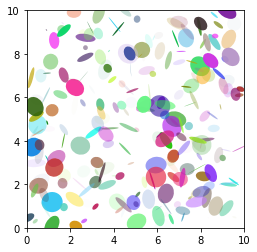

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

25.0 50.0 43.30127018922193 0.5235987755982988


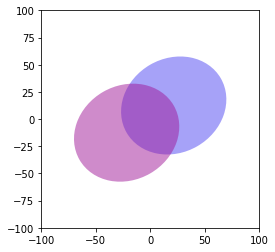

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

focus=getfocus(rad0,ecc0)
b=getsemiminor(rad0,ecc0)
theta0deg=theta0*180/math.pi
signs=[1,-1]
ells = [Ellipse(xy=[focus*signi*np.cos(theta0),focus*signi*np.sin(theta0)],
                width=2*rad0, height=2*b,
                angle=theta0deg)
                for signi in signs]
                    

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(0.5)
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(-2*rad0,2*rad0)
ax.set_ylim(-2*rad0, 2*rad0)

print(focus, rad0,b,theta0)
plt.show()